In [96]:
import sys
import os
import numpy as np
from matplotlib import pyplot as plt
sys.path.append(os.path.abspath(".."))  #TODO: MAKE THE SRC PACKAGE WORK
from src.evaluation.evaluate import Evaluation
from src.training.loss_functions import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from keras.layers import Lambda, Input, GaussianNoise,concatenate, Dense, Dropout, Conv2D, Add, UpSampling2D, Dot, Conv2DTranspose, Activation, Reshape, InputSpec, LeakyReLU, Flatten, BatchNormalization, SpectralNormalization, GlobalAveragePooling2D
from keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
import keras.backend as K
from keras import activations, initializers, regularizers, constraints
from tensorflow.python.keras.utils import conv_utils
from keras.layers import Dense, Conv1D, Conv2D, Conv3D, Conv2DTranspose, Embedding
import tensorflow as tf
from keras.models import load_model
from keras.applications import VGG19, VGG16
from keras.activations import swish
from keras.initializers import glorot_uniform, glorot_normal, GlorotUniform
from keras.constraints import max_norm, UnitNorm
from ipywidgets import interact, IntSlider
import tifffile as tiff
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from src.models import Encoder, Decoder, Discriminator, mlp_classifier

In [97]:
x_train = np.load('../data/images/time_norm_train_images.npy')[:,0,:,:]
y_train = np.load('../data/labels/train_labels_augmented4.npy')
x_test = np.load('../data/images/time_norm_test_images.npy')[:,0,:,:]
y_test = np.load('../data/labels/test_labels.npy')

# Figure 1C, Engineered LS

/Users/inescunha/anaconda3/envs/interpret/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/inescunha/anaconda3/envs/interpret/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_10 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6313 - loss: 0.6932 - val_accuracy: 0.4493 - val_loss: 0.8018
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - accuracy: 0.6565 - loss: 0.6527 - val_accuracy: 0.4928 - val_loss: 0.7505
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.6697 - loss: 0.6269 - val_accuracy: 0.5145 - val_loss: 0.7113
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - accuracy: 0.6913 - loss: 0.6024 - val_accuracy: 0.5580 - val_loss: 0.6818
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - accuracy: 0.6909 - loss: 0.5925 - val_accuracy: 0.5942 - val_loss: 0.6628
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - accuracy: 0.7064 - loss: 0.5846 - val_accuracy: 0.6159 - val_loss: 0.6452
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - accuracy: 0.6865 - loss: 0.5959 - val_accuracy: 0.6232 - val_loss: 0.6339
Epoch 8/50
73/73 ━━━━━━━━━━━━

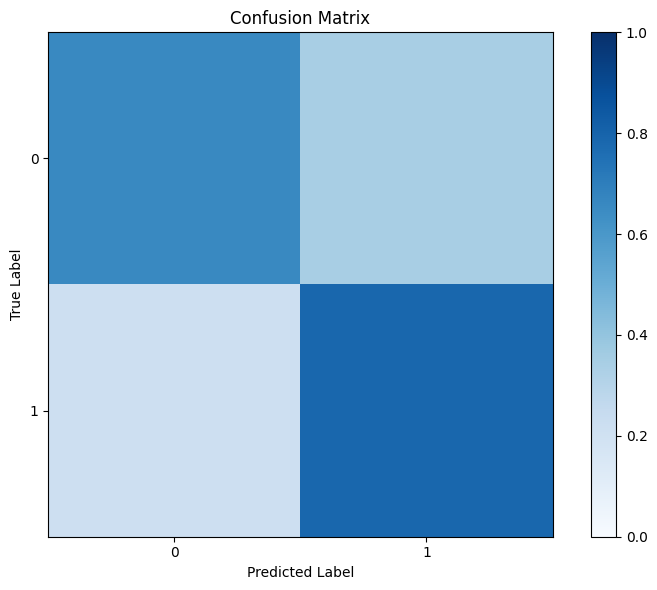

/Users/inescunha/anaconda3/envs/interpret/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/inescunha/anaconda3/envs/interpret/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_16 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6698 - loss: 0.5591 - val_accuracy: 0.6159 - val_loss: 0.7133
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - accuracy: 0.6973 - loss: 0.5496 - val_accuracy: 0.6232 - val_loss: 0.6999
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - accuracy: 0.7367 - loss: 0.5313 - val_accuracy: 0.6304 - val_loss: 0.6840
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - accuracy: 0.7233 - loss: 0.5458 - val_accuracy: 0.6304 - val_loss: 0.6690
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - accuracy: 0.7098 - loss: 0.5264 - val_accuracy: 0.6304 - val_loss: 0.6611
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - accuracy: 0.7334 - loss: 0.5297 - val_accuracy: 0.6377 - val_loss: 0.6539
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - accuracy: 0.7320 - loss: 0.5210 - val_accuracy: 0.6449 - val_loss: 0.6499
Epoch 8/50
73/73 ━━━━━━━━━━━━

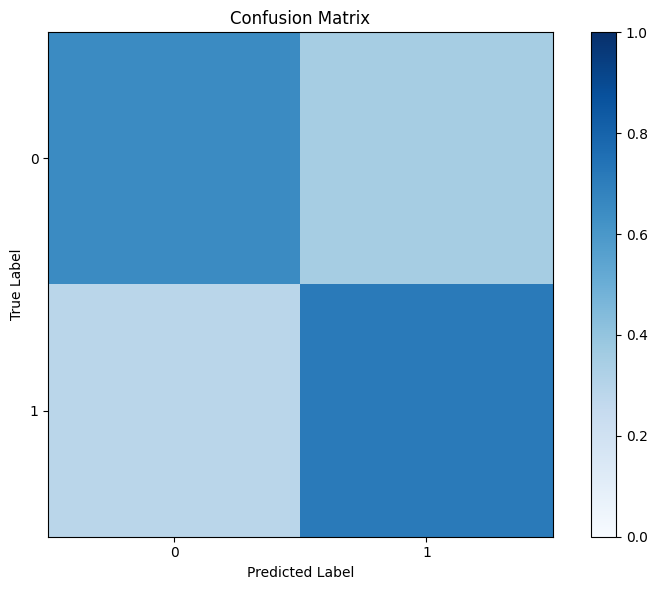

/Users/inescunha/anaconda3/envs/interpret/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/inescunha/anaconda3/envs/interpret/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_22 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3716 - loss: 1.2451 - val_accuracy: 0.3188 - val_loss: 1.2438
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - accuracy: 0.4413 - loss: 1.1028 - val_accuracy: 0.3551 - val_loss: 1.1083
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - accuracy: 0.4556 - loss: 1.0040 - val_accuracy: 0.3913 - val_loss: 0.9933
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - accuracy: 0.4709 - loss: 0.9361 - val_accuracy: 0.4348 - val_loss: 0.8995
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - accuracy: 0.4851 - loss: 0.8731 - val_accuracy: 0.4348 - val_loss: 0.8211
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - accuracy: 0.5120 - loss: 0.8212 - val_accuracy: 0.4783 - val_loss: 0.7576
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - accuracy: 0.5247 - loss: 0.7607 - val_accuracy: 0.5217 - val_loss: 0.7113
Epoch 8/50
73/73 ━━━━━━━━━━━━

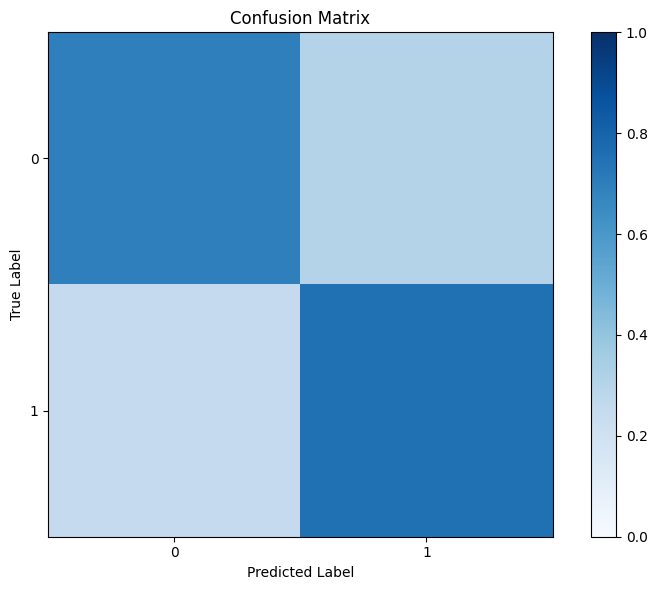

In [6]:
config = {
    'batch_size': 30,
    'epochs': 50,
    'learning_rate': 0.001,
    'seed': 42,
    'latent_dim': 2,
    'GaussianNoise_std': 0.003,
    'lambda_recon': 5, 
    'lambda_adv': 0.05,
    'lambda_clf': 0.05,
    'lambda_cov': 0.1,
}

img_shape = (x_train.shape[1], x_train.shape[2], 1)
confusion_matrices = np.zeros((3,2,2))
for model in range(3):

    encoder = Encoder(img_shape=img_shape, latent_dim=config['latent_dim'], num_classes=2, gaussian_noise_std=config['GaussianNoise_std']).model
    decoder = Decoder(latent_dim=config['latent_dim'], img_shape=img_shape, gaussian_noise_std=config['GaussianNoise_std']).model
    discriminator = Discriminator(latent_dim=config['latent_dim']).model

    if model == 0:
        encoder.load_weights("/Users/inescunha/Downloads/encoder60.weights.h5")
        decoder.load_weights("/Users/inescunha/Downloads/decoder60.weights.h5")
    if model == 1:
        encoder.load_weights("/Users/inescunha/Documents/GitHub/CellFate/results/data_labelling_study/cumulative_split_seed43_1.0/encoder.weights.h5")
        decoder.load_weights("/Users/inescunha/Documents/GitHub/CellFate/results/data_labelling_study/cumulative_split_seed43_1.0/decoder.weights.h5")
    if model == 2:
        encoder.load_weights("/Users/inescunha/Documents/GitHub/CellFate/results/data_labelling_study/cumulative_split_seed44_1.0/encoder.weights.h5")
        decoder.load_weights("/Users/inescunha/Documents/GitHub/CellFate/results/data_labelling_study/cumulative_split_seed44_1.0/decoder.weights.h5")

    tf.keras.utils.set_random_seed(config['seed'])

    classifier = mlp_classifier(latent_dim=config['latent_dim']) #[:, [3, 8]] 

    # Train the classifier
    classifier.compile(loss='sparse_categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(learning_rate=config['learning_rate']), metrics=['accuracy'])
    classifier.summary()

    x_val, x_test_, y_val, y_test_ = train_test_split(encoder.predict(x_test), y_test, test_size=0.5, random_state=42) # 42 random state

    history = classifier.fit(encoder.predict(x_train), y_train, batch_size=config['batch_size'], epochs=config['epochs'], validation_data=(x_val, y_val)) # 

    #### LAMBDA CONTRASTIVE LOSS = 4

    num_classes = len(np.unique(y_train))
    y_pred = classifier.predict(x_test_)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test_, y_pred_classes)

    class_sums = cm.sum(axis=1, keepdims=True)
    conf_matrix_normalized = cm / class_sums

    print(conf_matrix_normalized)
    confusion_matrices[model] = conf_matrix_normalized

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    plt.imshow(conf_matrix_normalized, interpolation='nearest', cmap=plt.cm.Blues, vmin=0, vmax=1)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

In [10]:
np.mean(confusion_matrices, axis=0)

array([[0.66666667, 0.33333333],
       [0.25      , 0.75      ]])

In [14]:
np.std(confusion_matrices, axis=0)

array([[0.01946168, 0.01946168],
       [0.02916059, 0.02916059]])

In [15]:
precision = np.mean(confusion_matrices, axis=0)[0,0] / (np.mean(confusion_matrices, axis=0)[0,0] + np.mean(confusion_matrices, axis=0)[1,0])
print("Model precision", precision)

Model precision 0.7272727272727273


In [31]:
precision = confusion_matrices[0][0,0] / (confusion_matrices[0][0,0] + confusion_matrices[0][1,0])
print("Model precision", precision)

precision = confusion_matrices[1][0,0] / (confusion_matrices[1][0,0] + confusion_matrices[1][1,0])
print("Model precision", precision)

precision = confusion_matrices[2][0,0] / (confusion_matrices[2][0,0] + confusion_matrices[2][1,0])
print("Model precision", precision)

Model precision 0.7542435424354244
Model precision 0.6942148760330579
Model precision 0.7350835322195705


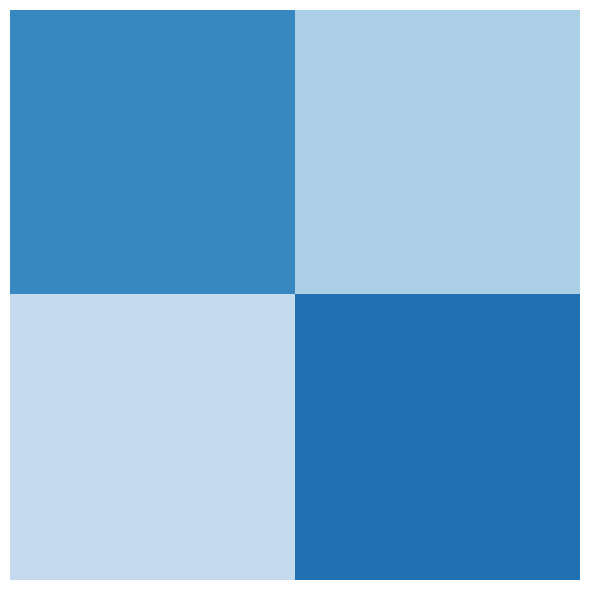

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(np.mean(confusion_matrices, axis=0), interpolation='nearest', cmap=plt.cm.Blues, vmin=0, vmax=1)
plt.axis('off')
plt.tight_layout()
#plt.savefig("mean_confmatrix_cellfate.pdf", format="pdf", dpi=300, pad_inches=0)
plt.show()

69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


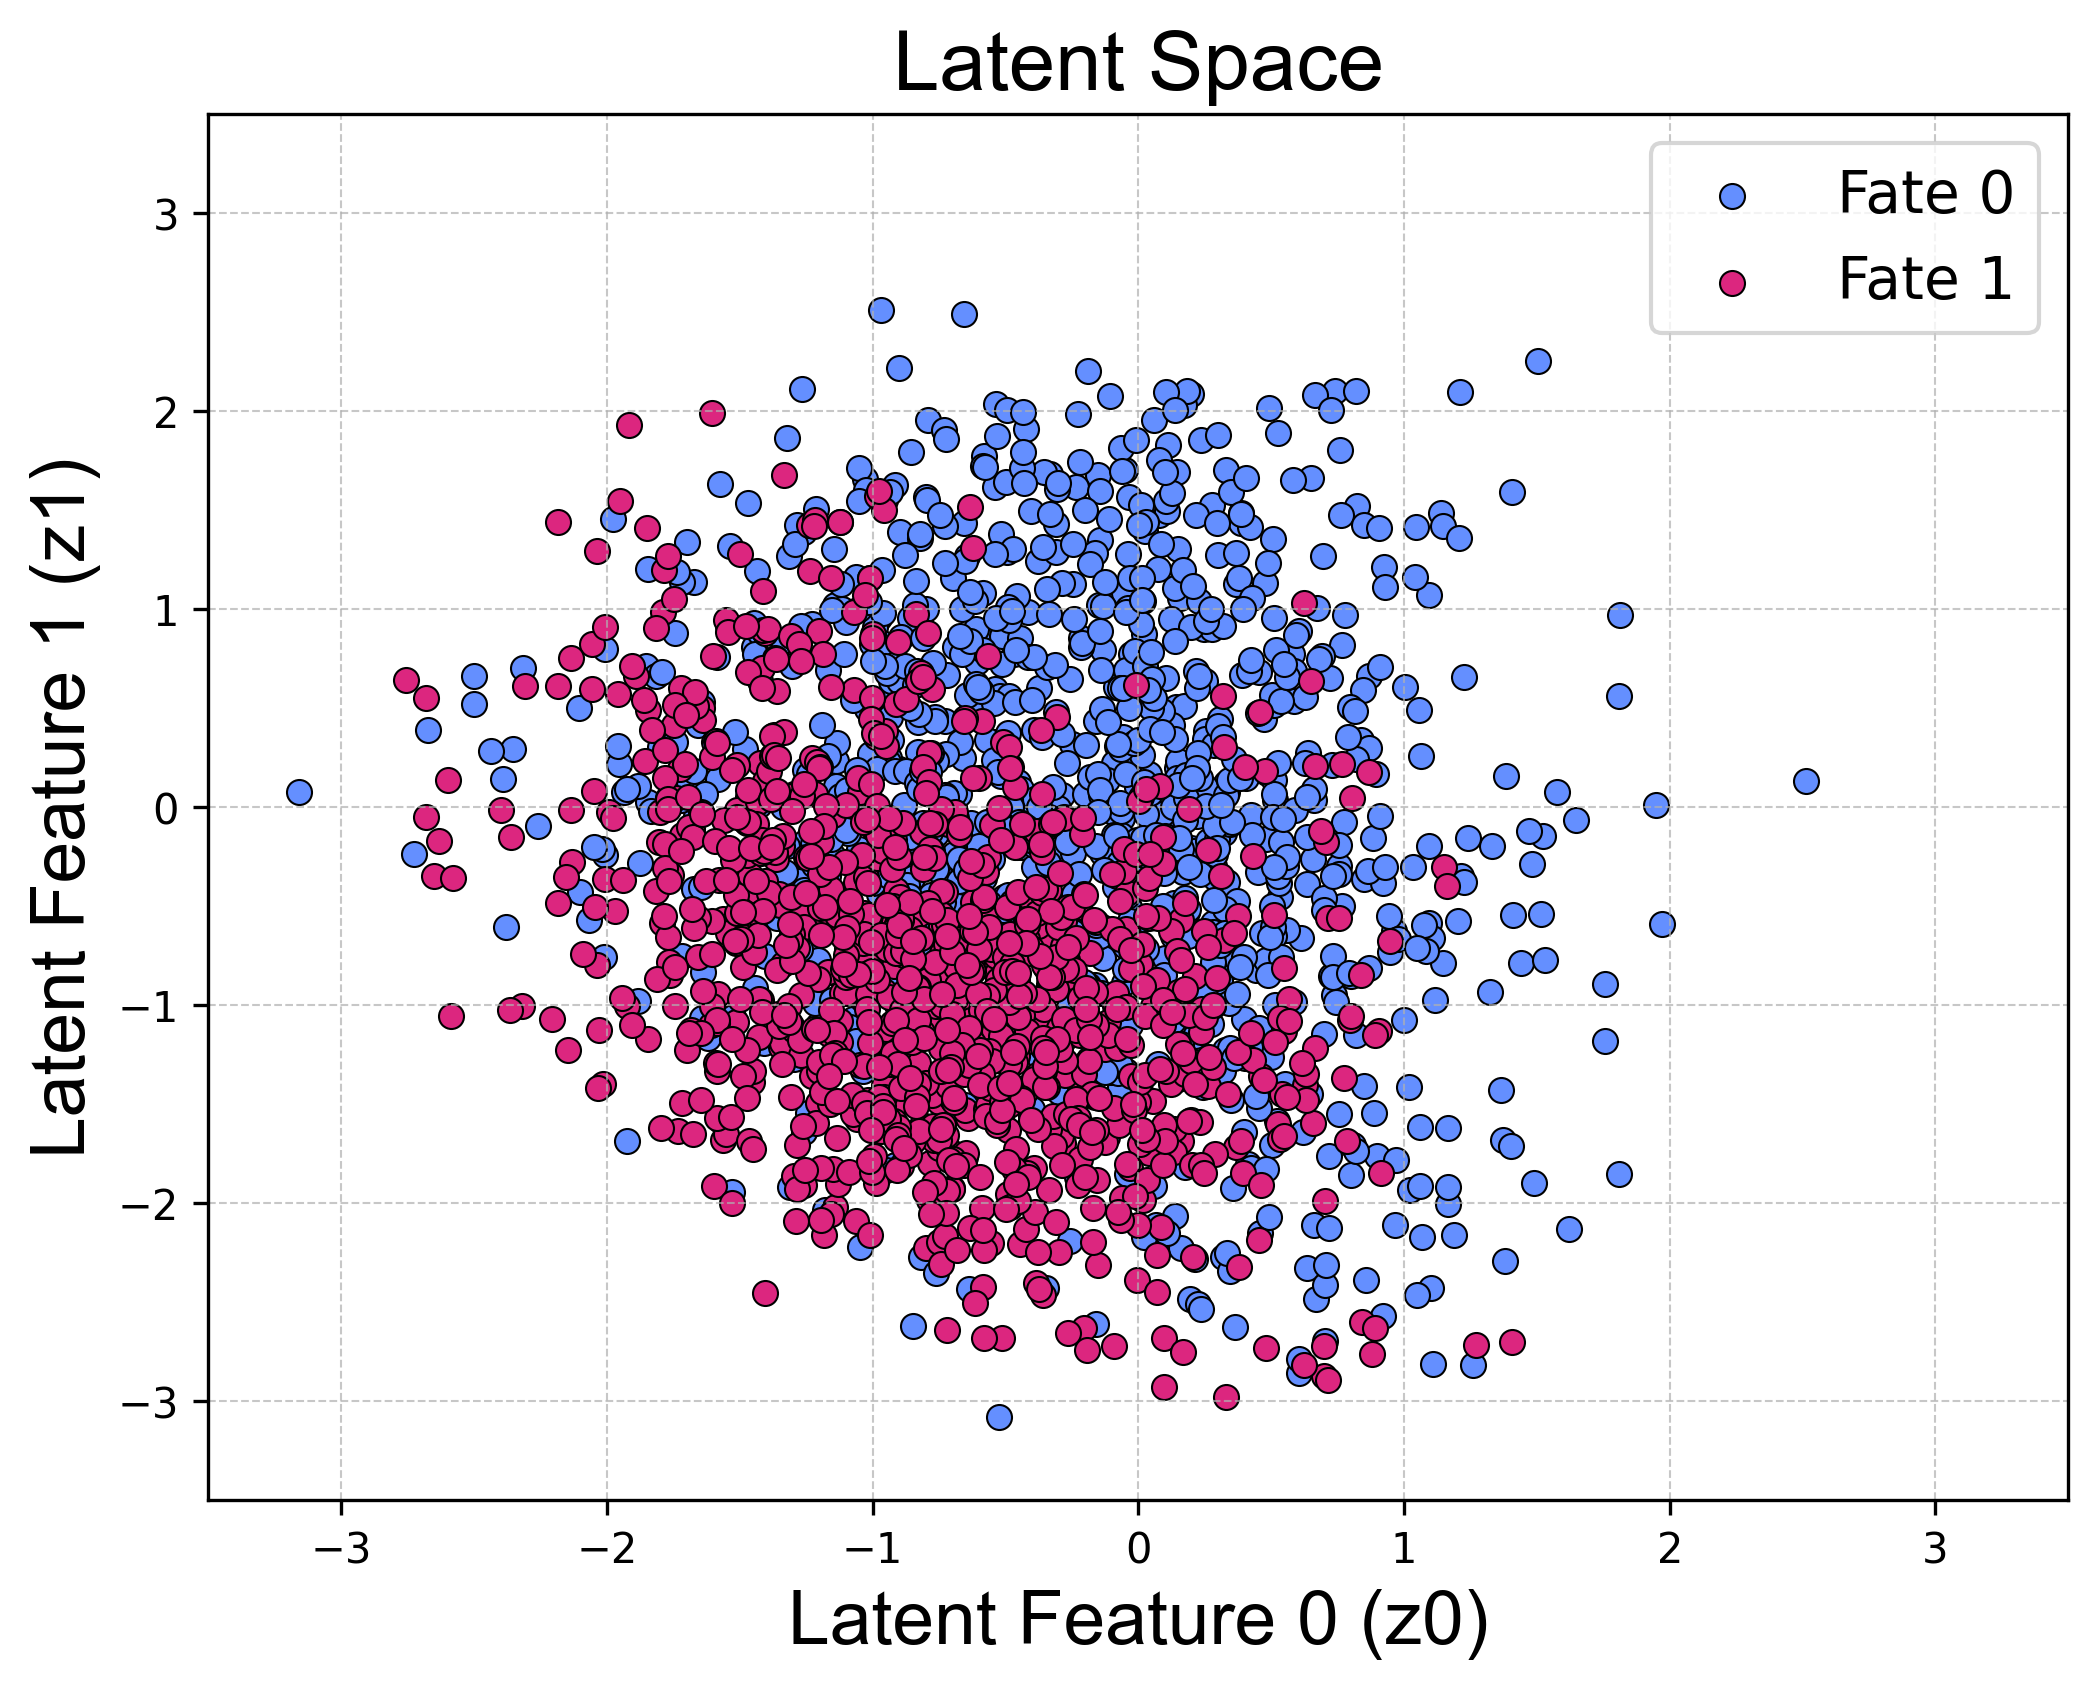

In [18]:
#### latent space correctly saved

encoder = Encoder(img_shape=img_shape, latent_dim=config['latent_dim'], num_classes=2, gaussian_noise_std=config['GaussianNoise_std']).model
decoder = Decoder(latent_dim=config['latent_dim'], img_shape=img_shape, gaussian_noise_std=config['GaussianNoise_std']).model
discriminator = Discriminator(latent_dim=config['latent_dim']).model

encoder.load_weights("/Users/inescunha/Downloads/encoder60.weights.h5")
decoder.load_weights("/Users/inescunha/Downloads/decoder60.weights.h5")

# Predict the latent representations
latent_2d = encoder.predict(x_train)  # Shape (1380, 2)

# Find extreme points for axis limits
x_min, x_max = latent_2d[:, 0].min() - 0.5, latent_2d[:, 0].max() + 0.5
y_min, y_max = latent_2d[:, 1].min() - 0.5, latent_2d[:, 1].max() + 0.5

# Create the plot
plt.figure(figsize=(8, 6), dpi=300)

# Scatter plot for each class separately with thin gray edges
plt.scatter(latent_2d[y_train == 0][:, 0], latent_2d[y_train == 0][:, 1], 
            color='#648fff', label="Fate 0", alpha=1, edgecolors='k', linewidth=0.5, rasterized=True)  
plt.scatter(latent_2d[y_train == 1][:, 0], latent_2d[y_train == 1][:, 1], 
            color='#dc267f', label="Fate 1", alpha=1, edgecolors='k', linewidth=0.5, rasterized=True)  

# Set axis limits
plt.xlim(-3.5, 3.5)
plt.ylim(-3.5, 3.5)

# Increase font size and set Arial font
plt.xlabel("Latent Feature 0 (z0)", fontsize=18, fontname="Arial")
plt.ylabel("Latent Feature 1 (z1)", fontsize=18, fontname="Arial")
plt.title("Latent Space", fontsize=20, fontname="Arial")

# Legend and grid
plt.legend(fontsize=14)
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)

plt.savefig("rasterised_ls_cellfate.eps", dpi=600, bbox_inches="tight")
plt.show()


## Test Latent Space

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


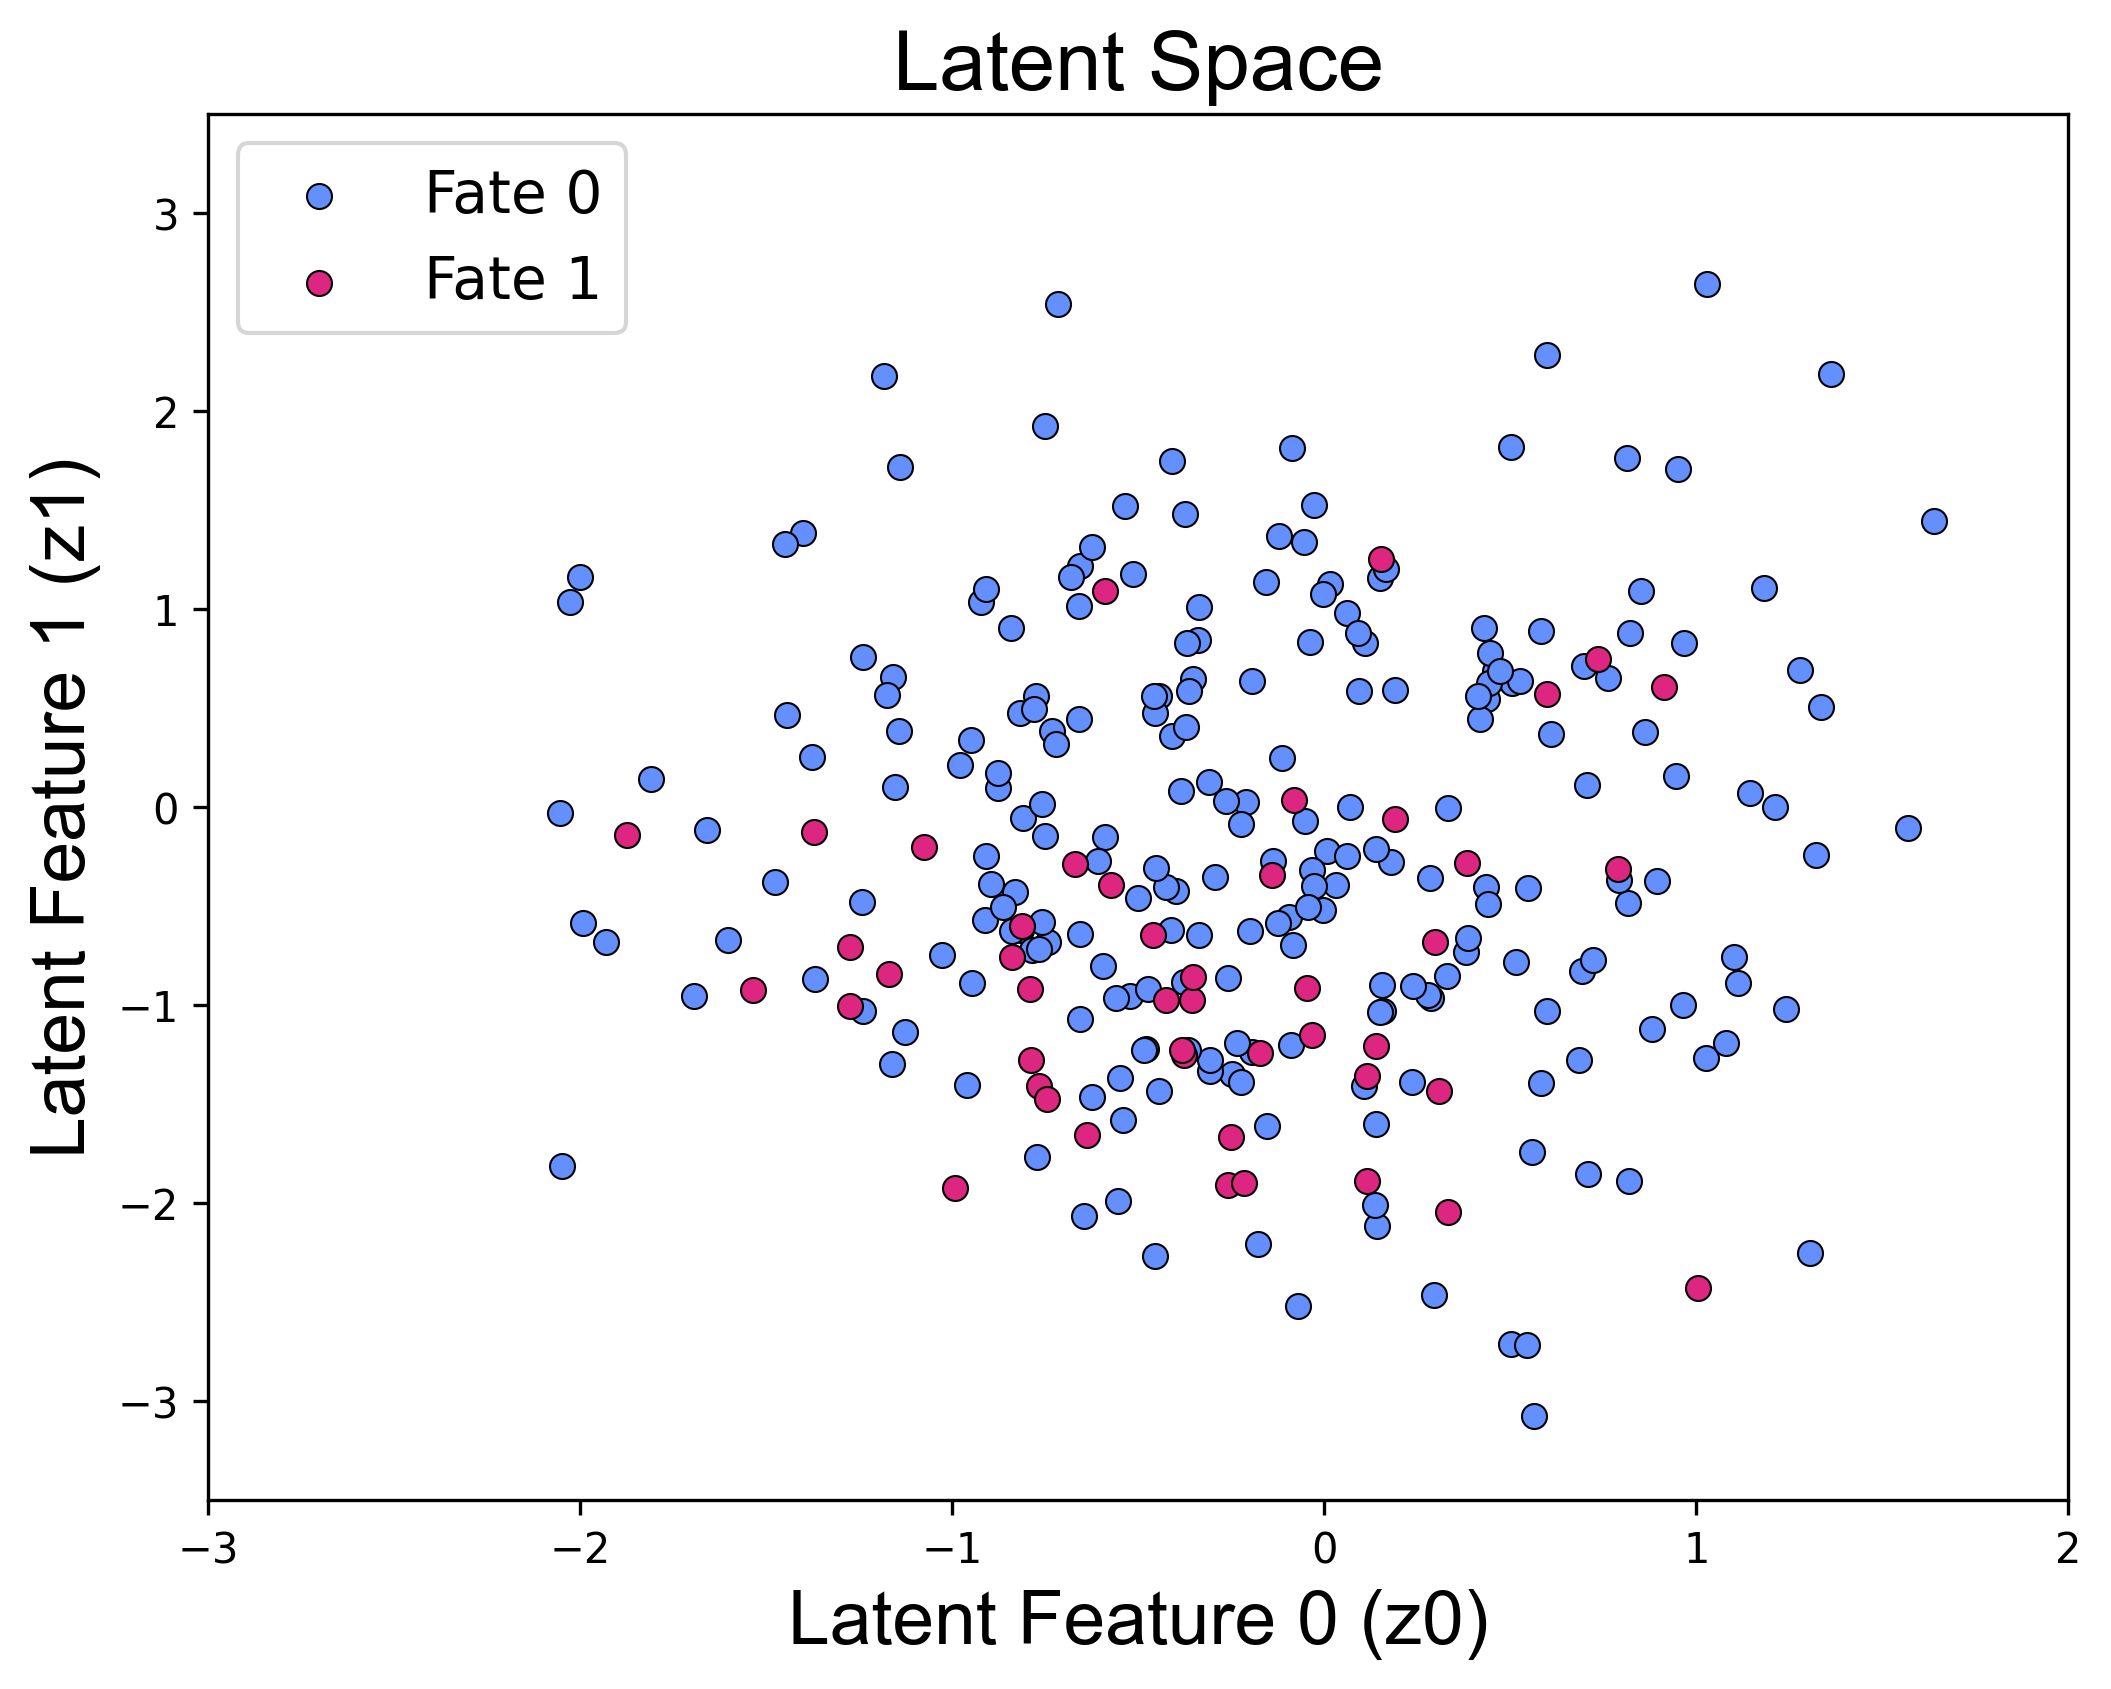

In [ ]:
#### latent space correctly saved

encoder = Encoder(img_shape=img_shape, latent_dim=config['latent_dim'], num_classes=2, gaussian_noise_std=config['GaussianNoise_std']).model
decoder = Decoder(latent_dim=config['latent_dim'], img_shape=img_shape, gaussian_noise_std=config['GaussianNoise_std']).model
discriminator = Discriminator(latent_dim=config['latent_dim']).model

encoder.load_weights("/Users/inescunha/Downloads/encoder60.weights.h5")
decoder.load_weights("/Users/inescunha/Downloads/decoder60.weights.h5")

# Predict the latent representations
latent_2d = encoder.predict(x_test)  # Shape (1380, 2)

# Find extreme points for axis limits
x_min, x_max = latent_2d[:, 0].min() - 0.5, latent_2d[:, 0].max() + 0.5
y_min, y_max = latent_2d[:, 1].min() - 0.5, latent_2d[:, 1].max() + 0.5

# Create the plot
plt.figure(figsize=(8, 6), dpi=300)

# Scatter plot for each class separately with thin gray edges
plt.scatter(latent_2d[y_test == 0][:, 0], latent_2d[y_test == 0][:, 1], 
            color='#648fff', label="Fate 0", alpha=1, edgecolors='k', linewidth=0.5, rasterized=True)  
plt.scatter(latent_2d[y_test == 1][:, 0], latent_2d[y_test == 1][:, 1], 
            color='#dc267f', label="Fate 1", alpha=1, edgecolors='k', linewidth=0.5, rasterized=True)  

# Set axis limits
plt.xlim(-3, 2)
plt.ylim(-3.5, 3.5)

# Increase font size and set Arial font
plt.xlabel("Latent Feature 0 (z0)", fontsize=18, fontname="Arial")
plt.ylabel("Latent Feature 1 (z1)", fontsize=18, fontname="Arial")
plt.title("Latent Space", fontsize=20, fontname="Arial")

# Legend and grid
plt.legend(fontsize=14)
#plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)

#plt.savefig("test_cellfate_noaug_rasterised.eps", dpi=600, bbox_inches="tight")
plt.show()


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


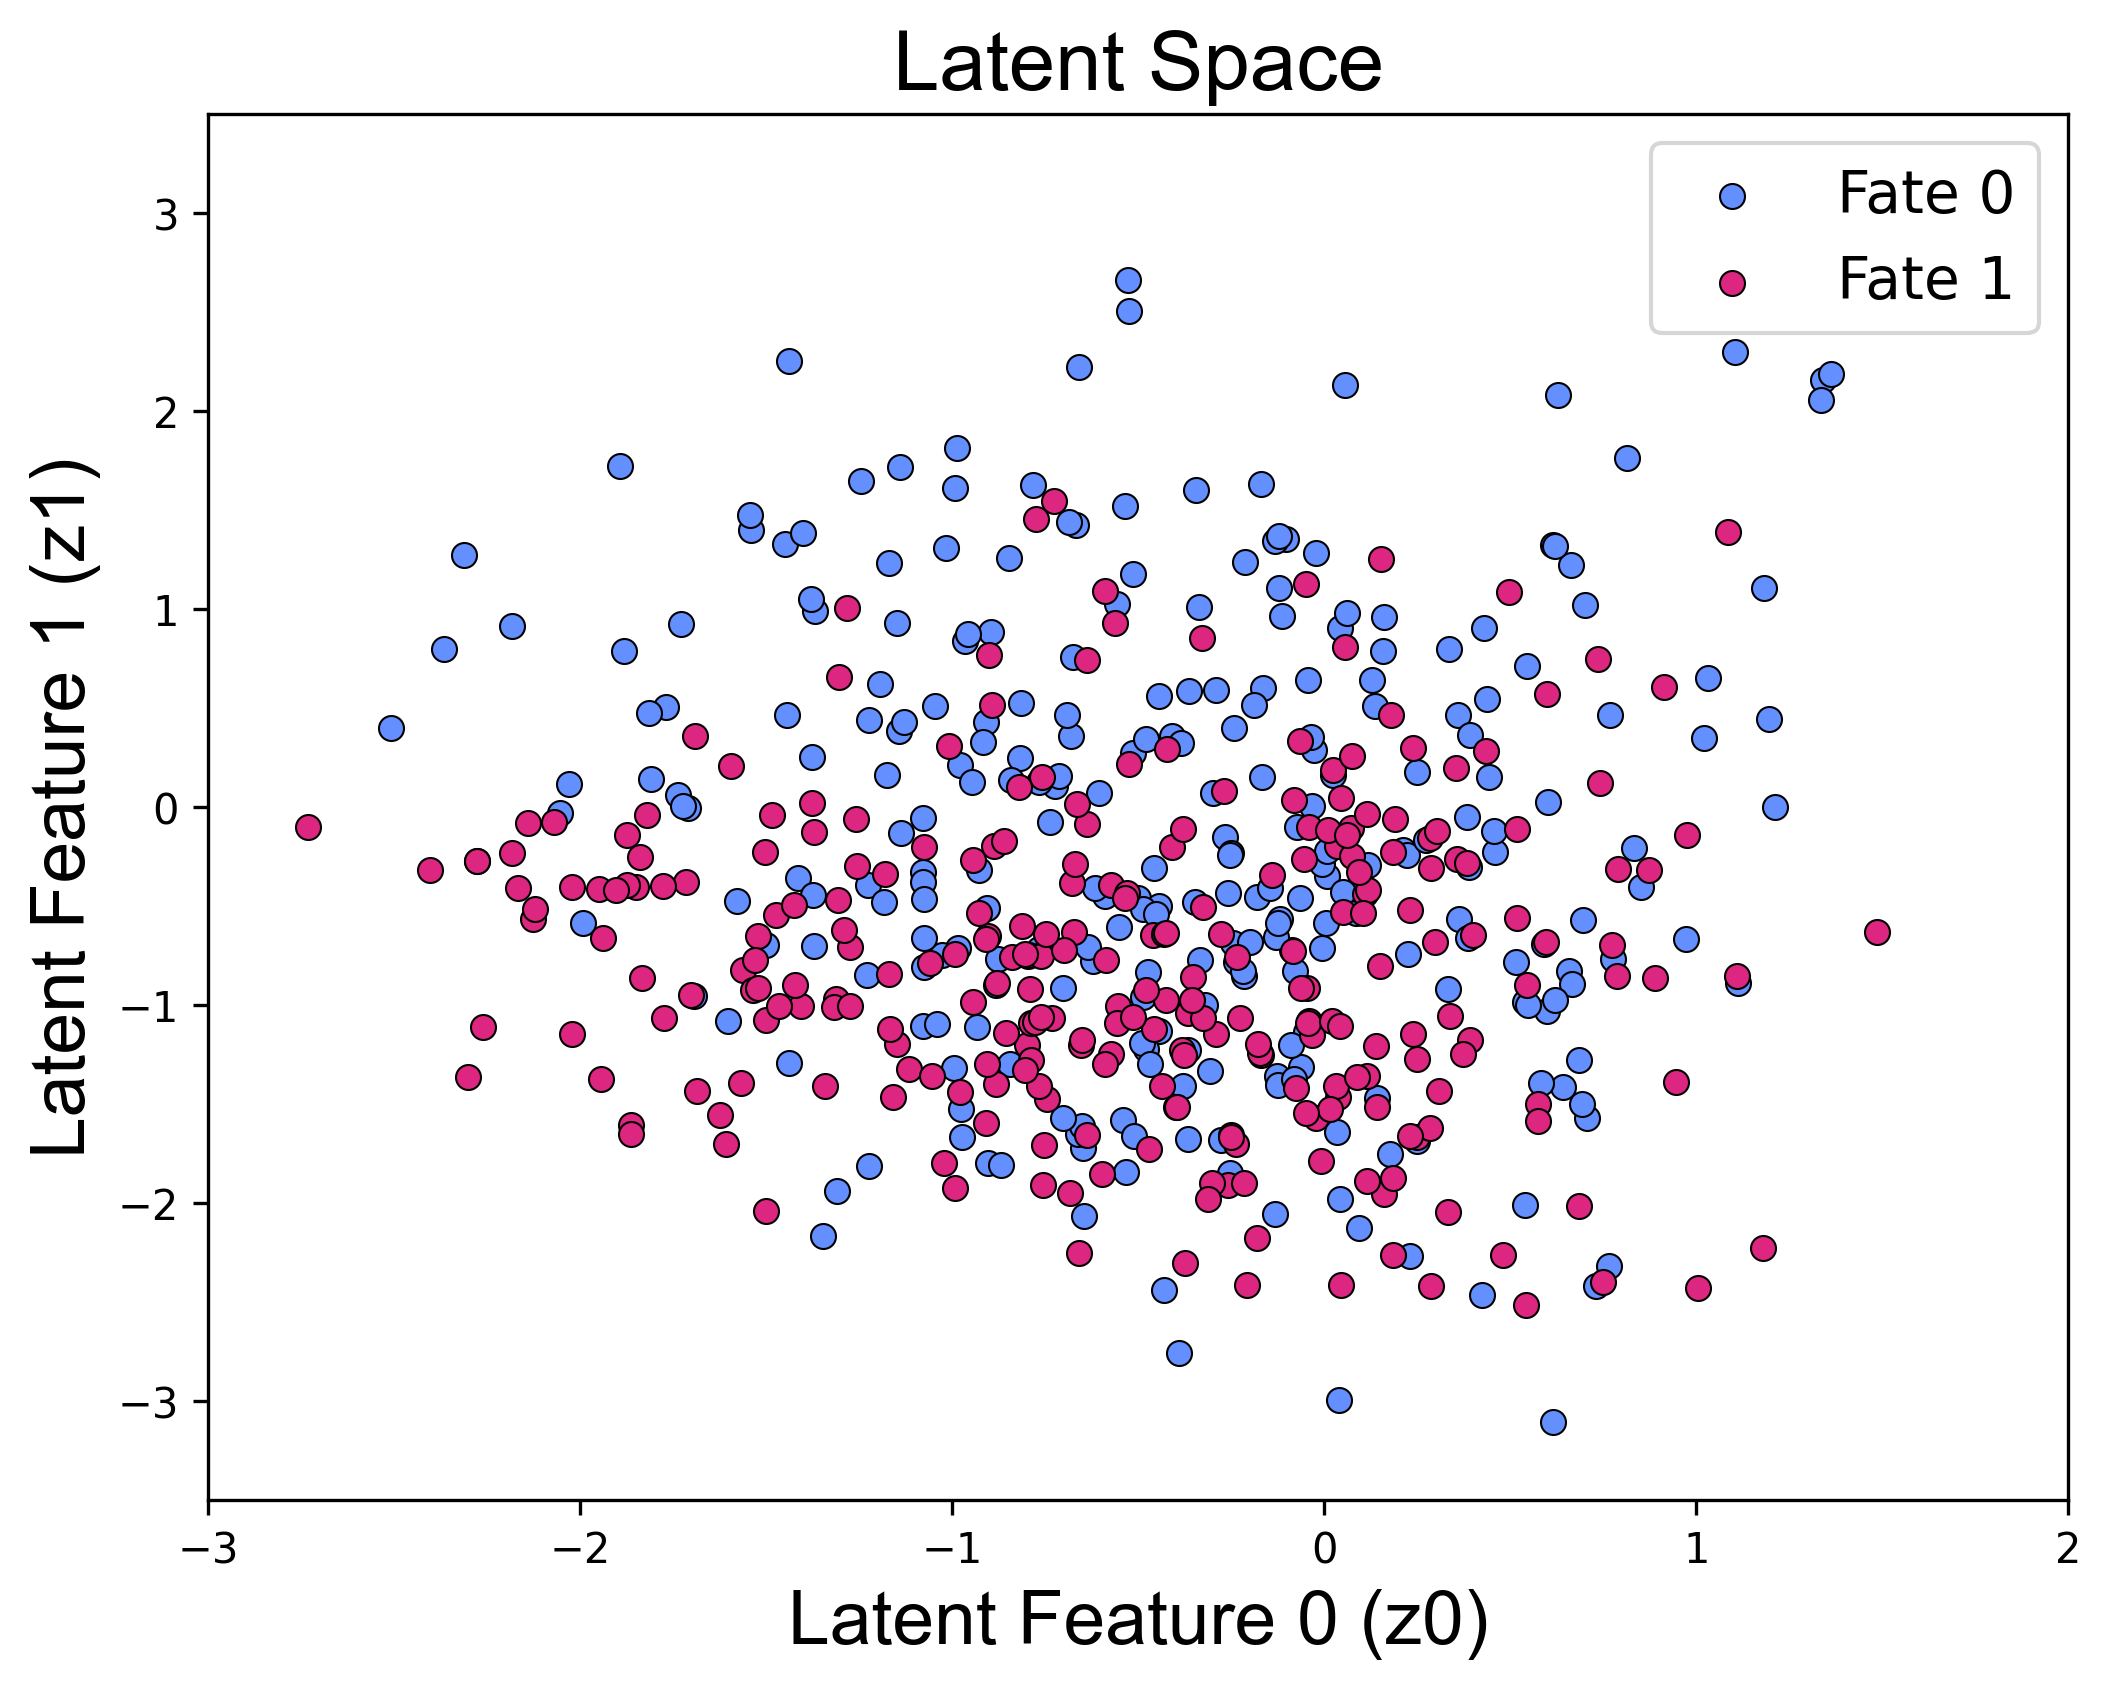

In [ ]:
#### latent space correctly saved
from src.preprocessing.preprocessing_functions import *

encoder = Encoder(img_shape=img_shape, latent_dim=config['latent_dim'], num_classes=2, gaussian_noise_std=config['GaussianNoise_std']).model
decoder = Decoder(latent_dim=config['latent_dim'], img_shape=img_shape, gaussian_noise_std=config['GaussianNoise_std']).model
discriminator = Discriminator(latent_dim=config['latent_dim']).model

encoder.load_weights("/Users/inescunha/Downloads/encoder60.weights.h5")
decoder.load_weights("/Users/inescunha/Downloads/decoder60.weights.h5")

augmented_x_test_for_visuals, augmented_y_test_for_visuals = augment_dataset(x_test, y_test, augmentations)

# Predict the latent representations
latent_2d = encoder.predict(augmented_x_test_for_visuals)  # Shape (1380, 2)

# Find extreme points for axis limits
x_min, x_max = latent_2d[:, 0].min() - 0.5, latent_2d[:, 0].max() + 0.5
y_min, y_max = latent_2d[:, 1].min() - 0.5, latent_2d[:, 1].max() + 0.5

# Create the plot
plt.figure(figsize=(8, 6), dpi=300)

# Scatter plot for each class separately with thin gray edges
plt.scatter(latent_2d[augmented_y_test_for_visuals == 0][:, 0], latent_2d[augmented_y_test_for_visuals == 0][:, 1], 
            color='#648fff', label="Fate 0", alpha=1, edgecolors='k', linewidth=0.5, rasterized=True)  
plt.scatter(latent_2d[augmented_y_test_for_visuals == 1][:, 0], latent_2d[augmented_y_test_for_visuals == 1][:, 1], 
            color='#dc267f', label="Fate 1", alpha=1, edgecolors='k', linewidth=0.5, rasterized=True)  

# Set axis limits
plt.xlim(-3, 2)
plt.ylim(-3.5, 3.5)

# Increase font size and set Arial font
plt.xlabel("Latent Feature 0 (z0)", fontsize=18, fontname="Arial")
plt.ylabel("Latent Feature 1 (z1)", fontsize=18, fontname="Arial")
plt.title("Latent Space", fontsize=20, fontname="Arial")

# Legend and grid
plt.legend(fontsize=14)
#plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)

#plt.savefig("test_cellfate_aug_rasterised.eps", dpi=600, bbox_inches="tight")
plt.show()


# Figure 1C, non-engineered LS

In [22]:
#### Getting seed 44 model

from src.training.new_optimised_train import train_autoencoder, train_cellfate
from src.utils import *

seed = 44
output_dir = f"../results/data_labelling_study/aae_only_seed44"
config_ae = {
            'batch_size': 30,
            'epochs': 15,
            'learning_rate': 0.001,
            'seed': seed,
            'latent_dim': 2,
            'GaussianNoise_std': 0.003,
            'lambda_recon': 5,
            'lambda_adv': 1,
        }

config_cellfate = {
    'batch_size': 30,
    'epochs': 100,
    'learning_rate': 0.001,
    'seed': seed,
    'latent_dim': 2,
    'GaussianNoise_std': 0.003,
    'lambda_recon': 6,
    'lambda_adv': 4,
    'lambda_cov': 0,#0.0001,
    'lambda_contra': 0,#8,
}

results_autoencoder = train_autoencoder(config_ae, x_train)
encoder = results_autoencoder['encoder']
decoder = results_autoencoder['decoder']
discriminator = results_autoencoder['discriminator']


results_cellfate = train_cellfate(config_cellfate, encoder, decoder, discriminator, x_train, y_train, x_test, y_test) #lambda_recon=scaled_autoencoder_results['lambda_recon'], lambda_adv=scaled_autoencoder_results['lambda_adv']
encoder = results_cellfate['encoder']
decoder = results_cellfate['decoder']
discriminator = results_cellfate['discriminator']

save_model_weights_to_disk(encoder, decoder, discriminator, output_dir=output_dir)

Training with batch size: 30, epochs: 15, learning rate: 0.001, seed: 44, latent dim: 2


/Users/inescunha/anaconda3/envs/interpret/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/inescunha/anaconda3/envs/interpret/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/15: Reconstruction loss: 1.3784, Adversarial loss: 0.7635, lambda recon: 5.0000, lambda adv: 1.0000
Epoch 2/15: Reconstruction loss: 0.8037, Adversarial loss: 0.7309, lambda recon: 5.0000, lambda adv: 1.0000
Epoch 3/15: Reconstruction loss: 0.7664, Adversarial loss: 0.7170, lambda recon: 5.0000, lambda adv: 1.0000
Epoch 4/15: Reconstruction loss: 0.7403, Adversarial loss: 0.7058, lambda recon: 5.0000, lambda adv: 1.0000
Epoch 5/15: Reconstruction loss: 0.7372, Adversarial loss: 0.7007, lambda recon: 5.0000, lambda adv: 1.0000
Epoch 6/15: Reconstruction loss: 0.7407, Adversarial loss: 0.7095, lambda recon: 5.0000, lambda adv: 1.0000
Epoch 7/15: Reconstruction loss: 0.7188, Adversarial loss: 0.7045, lambda recon: 5.0000, lambda adv: 1.0000
Epoch 8/15: Reconstruction loss: 0.7354, Adversarial loss: 0.7028, lambda recon: 5.0000, lambda adv: 1.0000
Epoch 9/15: Reconstruction loss: 0.7330, Adversarial loss: 0.6967, lambda recon: 5.0000, lambda adv: 1.0000
Epoch 10/15: Reconstruction 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Training with batch size: 30, epochs: 100, learning rate: 0.001, seed: 44, latent dim: 2
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
kl_divergence[0]: 0.05024463999948392 kl_divergence[1]: 0.07242828667883103
Latent Space is Gaussian-distributed!
Eucledian distance: 0.6056265234947205


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_48 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4448 - loss: 0.8250 - val_accuracy: 0.4420 - val_loss: 0.7982
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - accuracy: 0.4380 - loss: 0.7748 - val_accuracy: 0.4783 - val_loss: 0.7390
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - accuracy: 0.4228 - loss: 0.7367 - val_accuracy: 0.5217 - val_loss: 0.7037
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - accuracy: 0.4593 - loss: 0.7086 - val_accuracy: 0.5797 - val_loss: 0.6819
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - accuracy: 0.4930 - loss: 0.6956 - val_accuracy: 0.6812 - val_loss: 0.6681
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - accuracy: 0.5328 - loss: 0.6868 - val_accuracy: 0.6812 - val_loss: 0.6622
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - accuracy: 0.5805 - loss: 0.6767 - val_accuracy: 0.6957 - val_loss: 0.6580
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - accuracy: 0.6012 - loss: 0.6700 - val_accuracy: 0.65

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_49 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5744 - loss: 0.8386 - val_accuracy: 0.5942 - val_loss: 0.7691
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - accuracy: 0.5720 - loss: 0.7997 - val_accuracy: 0.6014 - val_loss: 0.7348
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - accuracy: 0.5767 - loss: 0.7604 - val_accuracy: 0.6014 - val_loss: 0.7050
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - accuracy: 0.5797 - loss: 0.7239 - val_accuracy: 0.6087 - val_loss: 0.6841
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - accuracy: 0.5744 - loss: 0.7187 - val_accuracy: 0.6014 - val_loss: 0.6734
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - accuracy: 0.5923 - loss: 0.6986 - val_accuracy: 0.6087 - val_loss: 0.6646
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - accuracy: 0.5799 - loss: 0.6887 - val_accuracy: 0.6087 - val_loss: 0.6578
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - accuracy: 0.5965 - loss: 0.6752 - val_accuracy: 0.61

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_50 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5218 - loss: 1.2782 - val_accuracy: 0.4565 - val_loss: 1.2598
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - accuracy: 0.5071 - loss: 1.2052 - val_accuracy: 0.4638 - val_loss: 1.1889
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - accuracy: 0.5366 - loss: 1.1054 - val_accuracy: 0.4710 - val_loss: 1.1263
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - accuracy: 0.5313 - loss: 1.0961 - val_accuracy: 0.4710 - val_loss: 1.0661
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - accuracy: 0.5201 - loss: 1.0242 - val_accuracy: 0.4710 - val_loss: 1.0125
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - accuracy: 0.5489 - loss: 0.9697 - val_accuracy: 0.4855 - val_loss: 0.9642
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - accuracy: 0.5215 - loss: 0.9339 - val_accuracy: 0.4928 - val_loss: 0.9164
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - accuracy: 0.5401 - loss: 0.9061 - val_accuracy: 0.50

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_51 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4270 - loss: 1.5084 - val_accuracy: 0.3551 - val_loss: 1.3941
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - accuracy: 0.4196 - loss: 1.4569 - val_accuracy: 0.3623 - val_loss: 1.2995
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - accuracy: 0.3978 - loss: 1.3354 - val_accuracy: 0.3551 - val_loss: 1.2137
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - accuracy: 0.4256 - loss: 1.2499 - val_accuracy: 0.3623 - val_loss: 1.1347
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - accuracy: 0.3961 - loss: 1.1924 - val_accuracy: 0.3696 - val_loss: 1.0623
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - accuracy: 0.4195 - loss: 1.0922 - val_accuracy: 0.3841 - val_loss: 0.9992
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - accuracy: 0.4062 - loss: 1.0604 - val_accuracy: 0.3841 - val_loss: 0.9394
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - accuracy: 0.4164 - loss: 0.9955 - val_accuracy: 0.38

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_52 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4168 - loss: 1.5809 - val_accuracy: 0.4565 - val_loss: 1.2802
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.4215 - loss: 1.4255 - val_accuracy: 0.4565 - val_loss: 1.2128
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - accuracy: 0.4118 - loss: 1.3290 - val_accuracy: 0.4493 - val_loss: 1.1398
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - accuracy: 0.4183 - loss: 1.2738 - val_accuracy: 0.4420 - val_loss: 1.0689
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - accuracy: 0.4251 - loss: 1.1599 - val_accuracy: 0.4420 - val_loss: 1.0027
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - accuracy: 0.4125 - loss: 1.1079 - val_accuracy: 0.4348 - val_loss: 0.9459
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - accuracy: 0.4260 - loss: 1.0076 - val_accuracy: 0.4348 - val_loss: 0.8899
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - accuracy: 0.4073 - loss: 0.9454 - val_accuracy: 0.42

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_53 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5798 - loss: 0.6755 - val_accuracy: 0.6449 - val_loss: 0.6670
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - accuracy: 0.5951 - loss: 0.6689 - val_accuracy: 0.6449 - val_loss: 0.6668
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - accuracy: 0.6048 - loss: 0.6688 - val_accuracy: 0.6232 - val_loss: 0.6691
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - accuracy: 0.5930 - loss: 0.6707 - val_accuracy: 0.6159 - val_loss: 0.6704
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - accuracy: 0.5940 - loss: 0.6739 - val_accuracy: 0.6087 - val_loss: 0.6714
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - accuracy: 0.6003 - loss: 0.6720 - val_accuracy: 0.6087 - val_loss: 0.6721
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - accuracy: 0.5940 - loss: 0.6706 - val_accuracy: 0.6014 - val_loss: 0.6726
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - accuracy: 0.5942 - loss: 0.6724 - val_accuracy: 0.60

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_54 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5800 - loss: 0.9359 - val_accuracy: 0.6667 - val_loss: 0.8297
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - accuracy: 0.5886 - loss: 0.9100 - val_accuracy: 0.6594 - val_loss: 0.8036
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - accuracy: 0.5882 - loss: 0.8593 - val_accuracy: 0.6522 - val_loss: 0.7784
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - accuracy: 0.6108 - loss: 0.7954 - val_accuracy: 0.6232 - val_loss: 0.7588
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - accuracy: 0.5946 - loss: 0.7740 - val_accuracy: 0.6014 - val_loss: 0.7434
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - accuracy: 0.6047 - loss: 0.7594 - val_accuracy: 0.6014 - val_loss: 0.7273
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - accuracy: 0.5985 - loss: 0.7407 - val_accuracy: 0.5797 - val_loss: 0.7170
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - accuracy: 0.6002 - loss: 0.7249 - val_accuracy: 0.57

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_55 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4385 - loss: 0.8675 - val_accuracy: 0.3986 - val_loss: 0.7942
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - accuracy: 0.4183 - loss: 0.8159 - val_accuracy: 0.3986 - val_loss: 0.7611
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - accuracy: 0.4486 - loss: 0.7682 - val_accuracy: 0.4058 - val_loss: 0.7376
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - accuracy: 0.4357 - loss: 0.7469 - val_accuracy: 0.4275 - val_loss: 0.7197
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - accuracy: 0.4442 - loss: 0.7233 - val_accuracy: 0.4710 - val_loss: 0.7069
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - accuracy: 0.4560 - loss: 0.7030 - val_accuracy: 0.4783 - val_loss: 0.6979
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - accuracy: 0.5167 - loss: 0.6931 - val_accuracy: 0.5435 - val_loss: 0.6915
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5553 - loss: 0.6867 - val_accuracy: 0.6014

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_56 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4863 - loss: 1.1135 - val_accuracy: 0.4420 - val_loss: 1.1438
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - accuracy: 0.4837 - loss: 1.0193 - val_accuracy: 0.4493 - val_loss: 1.0524
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.5210 - loss: 0.9486 - val_accuracy: 0.4783 - val_loss: 0.9790
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - accuracy: 0.5196 - loss: 0.9199 - val_accuracy: 0.4928 - val_loss: 0.9141
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - accuracy: 0.5222 - loss: 0.8624 - val_accuracy: 0.4855 - val_loss: 0.8595
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - accuracy: 0.5366 - loss: 0.8423 - val_accuracy: 0.5072 - val_loss: 0.8152
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - accuracy: 0.5427 - loss: 0.8075 - val_accuracy: 0.5145 - val_loss: 0.7749
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - accuracy: 0.5597 - loss: 0.7619 - val_accuracy: 0.52

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_57 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4430 - loss: 1.4151 - val_accuracy: 0.4493 - val_loss: 1.2473
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - accuracy: 0.4543 - loss: 1.2983 - val_accuracy: 0.4638 - val_loss: 1.1698
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - accuracy: 0.4629 - loss: 1.2325 - val_accuracy: 0.4638 - val_loss: 1.0986
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.4522 - loss: 1.1270 - val_accuracy: 0.4710 - val_loss: 1.0315
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - accuracy: 0.4487 - loss: 1.0536 - val_accuracy: 0.4710 - val_loss: 0.9698
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - accuracy: 0.4571 - loss: 1.0038 - val_accuracy: 0.4565 - val_loss: 0.9169
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - accuracy: 0.4756 - loss: 0.9229 - val_accuracy: 0.4638 - val_loss: 0.8710
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - accuracy: 0.5003 - loss: 0.8713 - val_accuracy: 0.47

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_58 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5196 - loss: 1.1426 - val_accuracy: 0.5362 - val_loss: 1.1316
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - accuracy: 0.5442 - loss: 1.0456 - val_accuracy: 0.5435 - val_loss: 1.0604
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - accuracy: 0.5231 - loss: 1.0622 - val_accuracy: 0.5507 - val_loss: 0.9922
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - accuracy: 0.5350 - loss: 0.9762 - val_accuracy: 0.5580 - val_loss: 0.9330
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - accuracy: 0.5349 - loss: 0.9228 - val_accuracy: 0.5652 - val_loss: 0.8883
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step - accuracy: 0.5343 - loss: 0.8853 - val_accuracy: 0.5942 - val_loss: 0.8415
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - accuracy: 0.5431 - loss: 0.8622 - val_accuracy: 0.5870 - val_loss: 0.8043
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - accuracy: 0.5437 - loss: 0.8190 - val_accuracy: 0.57

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_59 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4731 - loss: 0.8731 - val_accuracy: 0.4348 - val_loss: 0.8628
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - accuracy: 0.4471 - loss: 0.8541 - val_accuracy: 0.4420 - val_loss: 0.8109
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - accuracy: 0.4883 - loss: 0.7896 - val_accuracy: 0.4783 - val_loss: 0.7719
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - accuracy: 0.5359 - loss: 0.7601 - val_accuracy: 0.5000 - val_loss: 0.7423
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - accuracy: 0.5453 - loss: 0.7372 - val_accuracy: 0.5000 - val_loss: 0.7207
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - accuracy: 0.5592 - loss: 0.7136 - val_accuracy: 0.5145 - val_loss: 0.7062
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - accuracy: 0.5730 - loss: 0.6966 - val_accuracy: 0.5362 - val_loss: 0.6924
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - accuracy: 0.5719 - loss: 0.6846 - val_accuracy: 0.59

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_60 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4342 - loss: 1.5434 - val_accuracy: 0.3406 - val_loss: 1.5417
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - accuracy: 0.4356 - loss: 1.4799 - val_accuracy: 0.3406 - val_loss: 1.4161
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - accuracy: 0.4463 - loss: 1.3496 - val_accuracy: 0.3478 - val_loss: 1.2979
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - accuracy: 0.4444 - loss: 1.2543 - val_accuracy: 0.3551 - val_loss: 1.1888
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.4314 - loss: 1.1846 - val_accuracy: 0.3623 - val_loss: 1.0943
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - accuracy: 0.4456 - loss: 1.0871 - val_accuracy: 0.3623 - val_loss: 1.0078
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - accuracy: 0.4334 - loss: 1.0030 - val_accuracy: 0.3768 - val_loss: 0.9306
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - accuracy: 0.4548 - loss: 0.9184 - val_accuracy: 0.39

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_61 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5875 - loss: 0.8866 - val_accuracy: 0.5580 - val_loss: 0.9018
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 0.5798 - loss: 0.8603 - val_accuracy: 0.5797 - val_loss: 0.8485
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - accuracy: 0.5701 - loss: 0.8241 - val_accuracy: 0.6014 - val_loss: 0.8055
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 0.5745 - loss: 0.7953 - val_accuracy: 0.6087 - val_loss: 0.7635
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - accuracy: 0.5786 - loss: 0.7463 - val_accuracy: 0.6087 - val_loss: 0.7327
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - accuracy: 0.5765 - loss: 0.7386 - val_accuracy: 0.6232 - val_loss: 0.7067
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - accuracy: 0.5932 - loss: 0.7007 - val_accuracy: 0.6377 - val_loss: 0.6917
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - accuracy: 0.5852 - loss: 0.6955 - val_accuracy: 0.63

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_62 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5635 - loss: 0.8172 - val_accuracy: 0.6232 - val_loss: 0.7236
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - accuracy: 0.5735 - loss: 0.8041 - val_accuracy: 0.6304 - val_loss: 0.7054
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - accuracy: 0.5937 - loss: 0.7447 - val_accuracy: 0.6377 - val_loss: 0.6917
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - accuracy: 0.5578 - loss: 0.7326 - val_accuracy: 0.6159 - val_loss: 0.6820
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - accuracy: 0.5648 - loss: 0.7205 - val_accuracy: 0.6232 - val_loss: 0.6742
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - accuracy: 0.5690 - loss: 0.6983 - val_accuracy: 0.6159 - val_loss: 0.6714
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - accuracy: 0.5721 - loss: 0.6827 - val_accuracy: 0.6159 - val_loss: 0.6694
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - accuracy: 0.5809 - loss: 0.6745 - val_accuracy: 0.61

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_63 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5816 - loss: 0.7479 - val_accuracy: 0.6159 - val_loss: 0.6907
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - accuracy: 0.5837 - loss: 0.7087 - val_accuracy: 0.6159 - val_loss: 0.6812
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - accuracy: 0.5748 - loss: 0.7080 - val_accuracy: 0.6232 - val_loss: 0.6748
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - accuracy: 0.6058 - loss: 0.6720 - val_accuracy: 0.6159 - val_loss: 0.6712
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - accuracy: 0.5677 - loss: 0.6835 - val_accuracy: 0.6014 - val_loss: 0.6707
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - accuracy: 0.6069 - loss: 0.6707 - val_accuracy: 0.5942 - val_loss: 0.6702
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - accuracy: 0.5920 - loss: 0.6678 - val_accuracy: 0.5725 - val_loss: 0.6690
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - accuracy: 0.5951 - loss: 0.6738 - val_accuracy: 0.57

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_64 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4959 - loss: 1.1170 - val_accuracy: 0.5000 - val_loss: 1.0230
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - accuracy: 0.4981 - loss: 1.0158 - val_accuracy: 0.5072 - val_loss: 0.9505
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - accuracy: 0.5339 - loss: 0.9490 - val_accuracy: 0.5362 - val_loss: 0.8872
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - accuracy: 0.5299 - loss: 0.8798 - val_accuracy: 0.5580 - val_loss: 0.8328
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - accuracy: 0.5095 - loss: 0.8686 - val_accuracy: 0.5652 - val_loss: 0.7873
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - accuracy: 0.5313 - loss: 0.8149 - val_accuracy: 0.5652 - val_loss: 0.7526
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - accuracy: 0.5290 - loss: 0.7879 - val_accuracy: 0.5870 - val_loss: 0.7239
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - accuracy: 0.5615 - loss: 0.7427 - val_accuracy: 0.58

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_65 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5645 - loss: 0.8906 - val_accuracy: 0.6377 - val_loss: 0.7821
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - accuracy: 0.5678 - loss: 0.8167 - val_accuracy: 0.6159 - val_loss: 0.7605
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - accuracy: 0.5661 - loss: 0.7977 - val_accuracy: 0.6014 - val_loss: 0.7370
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - accuracy: 0.5634 - loss: 0.7610 - val_accuracy: 0.6087 - val_loss: 0.7195
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.5721 - loss: 0.7329 - val_accuracy: 0.6087 - val_loss: 0.7057
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - accuracy: 0.5479 - loss: 0.7305 - val_accuracy: 0.6304 - val_loss: 0.6939
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step - accuracy: 0.5630 - loss: 0.7028 - val_accuracy: 0.6449 - val_loss: 0.6856
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.5496 - loss: 0.6917 - val_accuracy: 0.63

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_66 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5600 - loss: 0.7580 - val_accuracy: 0.6377 - val_loss: 0.6882
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.5729 - loss: 0.7267 - val_accuracy: 0.6449 - val_loss: 0.6749
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - accuracy: 0.5361 - loss: 0.7208 - val_accuracy: 0.6377 - val_loss: 0.6690
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - accuracy: 0.5444 - loss: 0.7044 - val_accuracy: 0.6377 - val_loss: 0.6633
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - accuracy: 0.5611 - loss: 0.6823 - val_accuracy: 0.6304 - val_loss: 0.6605
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - accuracy: 0.5771 - loss: 0.6741 - val_accuracy: 0.6377 - val_loss: 0.6565
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - accuracy: 0.5640 - loss: 0.6840 - val_accuracy: 0.6304 - val_loss: 0.6566
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - accuracy: 0.5772 - loss: 0.6713 - val_accuracy: 0.62

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_67 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4194 - loss: 0.9216 - val_accuracy: 0.4420 - val_loss: 0.7612
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - accuracy: 0.4007 - loss: 0.8593 - val_accuracy: 0.4058 - val_loss: 0.7535
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - accuracy: 0.4075 - loss: 0.8144 - val_accuracy: 0.3986 - val_loss: 0.7484
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - accuracy: 0.4060 - loss: 0.7890 - val_accuracy: 0.3768 - val_loss: 0.7437
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - accuracy: 0.3937 - loss: 0.7584 - val_accuracy: 0.3478 - val_loss: 0.7385
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - accuracy: 0.4093 - loss: 0.7282 - val_accuracy: 0.2609 - val_loss: 0.7334
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - accuracy: 0.4197 - loss: 0.7134 - val_accuracy: 0.2391 - val_loss: 0.7263
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - accuracy: 0.4746 - loss: 0.6994 - val_accuracy: 0.15

Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_68 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5170 - loss: 1.0752 - val_accuracy: 0.5942 - val_loss: 0.9230
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.5221 - loss: 0.9894 - val_accuracy: 0.6087 - val_loss: 0.8912
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - accuracy: 0.5342 - loss: 0.9445 - val_accuracy: 0.5797 - val_loss: 0.8641
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - accuracy: 0.5368 - loss: 0.9176 - val_accuracy: 0.5797 - val_loss: 0.8346
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.5458 - loss: 0.8736 - val_accuracy: 0.5942 - val_loss: 0.8076
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - accuracy: 0.5340 - loss: 0.8403 - val_accuracy: 0.5797 - val_loss: 0.7856
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - accuracy: 0.5474 - loss: 0.7926 - val_accuracy: 0.5870 - val_loss: 0.7650
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - accuracy: 0.5315 - loss: 0.7861 - val_accuracy: 0.60

Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_69 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_78 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5451 - loss: 1.2373 - val_accuracy: 0.5217 - val_loss: 1.1574
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - accuracy: 0.5268 - loss: 1.2336 - val_accuracy: 0.5145 - val_loss: 1.1154
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - accuracy: 0.5408 - loss: 1.1220 - val_accuracy: 0.5435 - val_loss: 1.0725
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - accuracy: 0.5279 - loss: 1.1407 - val_accuracy: 0.5435 - val_loss: 1.0288
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - accuracy: 0.5424 - loss: 1.0523 - val_accuracy: 0.5435 - val_loss: 0.9879
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - accuracy: 0.5523 - loss: 0.9788 - val_accuracy: 0.5580 - val_loss: 0.9499
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - accuracy: 0.5416 - loss: 0.9865 - val_accuracy: 0.5580 - val_loss: 0.9093
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - accuracy: 0.5257 - loss: 0.9470 - val_accuracy: 0.57

Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_70 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4391 - loss: 0.7887 - val_accuracy: 0.4493 - val_loss: 0.7378
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - accuracy: 0.4369 - loss: 0.7548 - val_accuracy: 0.4275 - val_loss: 0.7248
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - accuracy: 0.4520 - loss: 0.7222 - val_accuracy: 0.4203 - val_loss: 0.7144
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - accuracy: 0.4840 - loss: 0.7017 - val_accuracy: 0.4493 - val_loss: 0.7057
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - accuracy: 0.5461 - loss: 0.6898 - val_accuracy: 0.5290 - val_loss: 0.6983
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - accuracy: 0.5851 - loss: 0.6818 - val_accuracy: 0.5217 - val_loss: 0.6925
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - accuracy: 0.5848 - loss: 0.6773 - val_accuracy: 0.5290 - val_loss: 0.6882
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - accuracy: 0.6015 - loss: 0.6689 - val_accuracy: 0.52

Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_71 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_80 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4317 - loss: 0.7679 - val_accuracy: 0.4928 - val_loss: 0.7095
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - accuracy: 0.4630 - loss: 0.7303 - val_accuracy: 0.5362 - val_loss: 0.6946
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - accuracy: 0.5351 - loss: 0.6989 - val_accuracy: 0.5797 - val_loss: 0.6872
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step - accuracy: 0.5631 - loss: 0.6838 - val_accuracy: 0.6159 - val_loss: 0.6828
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - accuracy: 0.5660 - loss: 0.6772 - val_accuracy: 0.6014 - val_loss: 0.6799
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - accuracy: 0.5716 - loss: 0.6742 - val_accuracy: 0.6014 - val_loss: 0.6790
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - accuracy: 0.5634 - loss: 0.6755 - val_accuracy: 0.6014 - val_loss: 0.6769
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - accuracy: 0.6072 - loss: 0.6668 - val_accuracy: 0.60

Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_72 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5643 - loss: 0.6906 - val_accuracy: 0.6159 - val_loss: 0.6670
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - accuracy: 0.6093 - loss: 0.6707 - val_accuracy: 0.6087 - val_loss: 0.6682
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - accuracy: 0.5839 - loss: 0.6657 - val_accuracy: 0.6014 - val_loss: 0.6716
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - accuracy: 0.5926 - loss: 0.6752 - val_accuracy: 0.5942 - val_loss: 0.6718
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - accuracy: 0.6112 - loss: 0.6673 - val_accuracy: 0.5942 - val_loss: 0.6701
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - accuracy: 0.6295 - loss: 0.6599 - val_accuracy: 0.5942 - val_loss: 0.6714
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - accuracy: 0.5941 - loss: 0.6674 - val_accuracy: 0.5942 - val_loss: 0.6715
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - accuracy: 0.5923 - loss: 0.6750 - val_accuracy: 0.59

Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_73 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4248 - loss: 0.8171 - val_accuracy: 0.3768 - val_loss: 0.7707
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - accuracy: 0.4216 - loss: 0.7708 - val_accuracy: 0.3478 - val_loss: 0.7374
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 0.4325 - loss: 0.7327 - val_accuracy: 0.3768 - val_loss: 0.7152
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - accuracy: 0.4294 - loss: 0.7099 - val_accuracy: 0.4565 - val_loss: 0.6990
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - accuracy: 0.5630 - loss: 0.6908 - val_accuracy: 0.5290 - val_loss: 0.6900
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - accuracy: 0.5952 - loss: 0.6812 - val_accuracy: 0.5652 - val_loss: 0.6838
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - accuracy: 0.6099 - loss: 0.6743 - val_accuracy: 0.5797 - val_loss: 0.6808
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - accuracy: 0.6000 - loss: 0.6710 - val_accuracy: 0.59

Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_74 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4703 - loss: 1.1470 - val_accuracy: 0.5362 - val_loss: 1.0162
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - accuracy: 0.5312 - loss: 1.0966 - val_accuracy: 0.5435 - val_loss: 0.9586
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - accuracy: 0.5169 - loss: 1.0225 - val_accuracy: 0.5580 - val_loss: 0.9096
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - accuracy: 0.5454 - loss: 0.9846 - val_accuracy: 0.5580 - val_loss: 0.8649
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - accuracy: 0.5218 - loss: 0.9309 - val_accuracy: 0.5652 - val_loss: 0.8289
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - accuracy: 0.5419 - loss: 0.8650 - val_accuracy: 0.5797 - val_loss: 0.7954
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - accuracy: 0.5426 - loss: 0.8439 - val_accuracy: 0.6014 - val_loss: 0.7685
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - accuracy: 0.5410 - loss: 0.8247 - val_accuracy: 0.60

Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_75 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_84 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4414 - loss: 0.7244 - val_accuracy: 0.5000 - val_loss: 0.7013
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - accuracy: 0.4943 - loss: 0.6974 - val_accuracy: 0.6739 - val_loss: 0.6752
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - accuracy: 0.5578 - loss: 0.6856 - val_accuracy: 0.6957 - val_loss: 0.6628
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - accuracy: 0.5653 - loss: 0.6796 - val_accuracy: 0.6812 - val_loss: 0.6580
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - accuracy: 0.5780 - loss: 0.6730 - val_accuracy: 0.6739 - val_loss: 0.6562
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - accuracy: 0.5736 - loss: 0.6725 - val_accuracy: 0.6739 - val_loss: 0.6576
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - accuracy: 0.5865 - loss: 0.6720 - val_accuracy: 0.6594 - val_loss: 0.6594
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - accuracy: 0.5830 - loss: 0.6705 - val_accuracy: 0.63

Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_76 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_85 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5752 - loss: 1.0574 - val_accuracy: 0.6667 - val_loss: 0.8050
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - accuracy: 0.5769 - loss: 1.0250 - val_accuracy: 0.6594 - val_loss: 0.7880
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.5488 - loss: 0.9962 - val_accuracy: 0.6522 - val_loss: 0.7724
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.5681 - loss: 0.9153 - val_accuracy: 0.6377 - val_loss: 0.7578
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - accuracy: 0.5672 - loss: 0.8676 - val_accuracy: 0.6232 - val_loss: 0.7456
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - accuracy: 0.5893 - loss: 0.8120 - val_accuracy: 0.6159 - val_loss: 0.7351
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - accuracy: 0.5933 - loss: 0.7770 - val_accuracy: 0.5942 - val_loss: 0.7246
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - accuracy: 0.5720 - loss: 0.7375 - val_accuracy: 0.59

Model: "sequential_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_77 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_86 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4941 - loss: 0.8481 - val_accuracy: 0.5362 - val_loss: 0.7619
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5309 - loss: 0.8075 - val_accuracy: 0.5652 - val_loss: 0.7330
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - accuracy: 0.5477 - loss: 0.7516 - val_accuracy: 0.5870 - val_loss: 0.7121
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - accuracy: 0.5521 - loss: 0.7263 - val_accuracy: 0.5870 - val_loss: 0.6998
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - accuracy: 0.5427 - loss: 0.7213 - val_accuracy: 0.5797 - val_loss: 0.6915
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - accuracy: 0.5657 - loss: 0.6925 - val_accuracy: 0.6014 - val_loss: 0.6841
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - accuracy: 0.5509 - loss: 0.6864 - val_accuracy: 0.6087 - val_loss: 0.6811
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - accuracy: 0.5646 - loss: 0.6799 - val_accuracy: 0.6014

Model: "sequential_42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_78 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_87 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4431 - loss: 1.0760 - val_accuracy: 0.4203 - val_loss: 1.0451
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - accuracy: 0.4430 - loss: 1.0158 - val_accuracy: 0.4203 - val_loss: 0.9799
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - accuracy: 0.4442 - loss: 0.9562 - val_accuracy: 0.4275 - val_loss: 0.9248
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - accuracy: 0.4293 - loss: 0.9090 - val_accuracy: 0.4493 - val_loss: 0.8714
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - accuracy: 0.4622 - loss: 0.8408 - val_accuracy: 0.4638 - val_loss: 0.8265
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - accuracy: 0.4617 - loss: 0.8106 - val_accuracy: 0.4783 - val_loss: 0.7885
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - accuracy: 0.4681 - loss: 0.7696 - val_accuracy: 0.4783 - val_loss: 0.7592
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5328 - loss: 0.7373 - val_accuracy: 0.5072

Model: "sequential_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_79 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5405 - loss: 0.7823 - val_accuracy: 0.6739 - val_loss: 0.6645
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step - accuracy: 0.5206 - loss: 0.7564 - val_accuracy: 0.6594 - val_loss: 0.6703
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - accuracy: 0.5305 - loss: 0.7367 - val_accuracy: 0.6522 - val_loss: 0.6735
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - accuracy: 0.5588 - loss: 0.7007 - val_accuracy: 0.6304 - val_loss: 0.6750
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - accuracy: 0.5694 - loss: 0.6878 - val_accuracy: 0.6377 - val_loss: 0.6758
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - accuracy: 0.5699 - loss: 0.6846 - val_accuracy: 0.6232 - val_loss: 0.6774
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - accuracy: 0.5551 - loss: 0.6803 - val_accuracy: 0.6014 - val_loss: 0.6749
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.5815 - loss: 0.6696 - val_accuracy: 0.61

Model: "sequential_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_80 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5531 - loss: 1.0057 - val_accuracy: 0.5435 - val_loss: 0.8879
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - accuracy: 0.5569 - loss: 0.9280 - val_accuracy: 0.5435 - val_loss: 0.8585
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 0.5634 - loss: 0.8864 - val_accuracy: 0.5362 - val_loss: 0.8307
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - accuracy: 0.5704 - loss: 0.8425 - val_accuracy: 0.5435 - val_loss: 0.8039
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - accuracy: 0.5733 - loss: 0.8097 - val_accuracy: 0.5507 - val_loss: 0.7791
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - accuracy: 0.5779 - loss: 0.7807 - val_accuracy: 0.5507 - val_loss: 0.7586
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - accuracy: 0.5710 - loss: 0.7680 - val_accuracy: 0.5580 - val_loss: 0.7389
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - accuracy: 0.5753 - loss: 0.7449 - val_accuracy: 0.58

Model: "sequential_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_81 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_90 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5734 - loss: 0.8681 - val_accuracy: 0.6087 - val_loss: 0.8586
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.5642 - loss: 0.8649 - val_accuracy: 0.6014 - val_loss: 0.8313
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - accuracy: 0.5801 - loss: 0.8028 - val_accuracy: 0.6014 - val_loss: 0.8044
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5760 - loss: 0.7775 - val_accuracy: 0.6087 - val_loss: 0.7830
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - accuracy: 0.5691 - loss: 0.7961 - val_accuracy: 0.6159 - val_loss: 0.7565
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - accuracy: 0.5907 - loss: 0.7441 - val_accuracy: 0.6159 - val_loss: 0.7375
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.5886 - loss: 0.7331 - val_accuracy: 0.6159 - val_loss: 0.7224
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - accuracy: 0.5838 - loss: 0.7181 - val_accuracy: 0.6087

Model: "sequential_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_82 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_91 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4241 - loss: 0.8191 - val_accuracy: 0.3261 - val_loss: 0.7783
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - accuracy: 0.4133 - loss: 0.7797 - val_accuracy: 0.3406 - val_loss: 0.7403
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - accuracy: 0.4239 - loss: 0.7350 - val_accuracy: 0.3551 - val_loss: 0.7156
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - accuracy: 0.4117 - loss: 0.7138 - val_accuracy: 0.4058 - val_loss: 0.6967
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.4618 - loss: 0.6956 - val_accuracy: 0.6522 - val_loss: 0.6862
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - accuracy: 0.5870 - loss: 0.6855 - val_accuracy: 0.6377 - val_loss: 0.6788
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - accuracy: 0.5848 - loss: 0.6765 - val_accuracy: 0.6159 - val_loss: 0.6765
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - accuracy: 0.5923 - loss: 0.6736 - val_accuracy: 0.63

Model: "sequential_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_83 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_92 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4065 - loss: 0.8124 - val_accuracy: 0.3986 - val_loss: 0.7594
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - accuracy: 0.4184 - loss: 0.7683 - val_accuracy: 0.4275 - val_loss: 0.7322
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - accuracy: 0.4317 - loss: 0.7414 - val_accuracy: 0.4855 - val_loss: 0.7105
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - accuracy: 0.4540 - loss: 0.7173 - val_accuracy: 0.5290 - val_loss: 0.6960
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - accuracy: 0.4633 - loss: 0.7009 - val_accuracy: 0.6304 - val_loss: 0.6854
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - accuracy: 0.5327 - loss: 0.6897 - val_accuracy: 0.6522 - val_loss: 0.6789
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - accuracy: 0.5809 - loss: 0.6780 - val_accuracy: 0.6304 - val_loss: 0.6750
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - accuracy: 0.5834 - loss: 0.6756 - val_accuracy: 0.62

Model: "sequential_48"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_84 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_93 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4194 - loss: 0.9754 - val_accuracy: 0.3406 - val_loss: 0.9286
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - accuracy: 0.4299 - loss: 0.9227 - val_accuracy: 0.3696 - val_loss: 0.8722
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - accuracy: 0.4170 - loss: 0.8791 - val_accuracy: 0.3913 - val_loss: 0.8250
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - accuracy: 0.4285 - loss: 0.8393 - val_accuracy: 0.3986 - val_loss: 0.7883
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4465 - loss: 0.7970 - val_accuracy: 0.3986 - val_loss: 0.7614
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - accuracy: 0.4174 - loss: 0.7797 - val_accuracy: 0.3986 - val_loss: 0.7384
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - accuracy: 0.4269 - loss: 0.7488 - val_accuracy: 0.3986 - val_loss: 0.7206
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - accuracy: 0.4223 - loss: 0.7308 - val_accuracy: 0.3986

Model: "sequential_49"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_85 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_94 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4036 - loss: 1.4542 - val_accuracy: 0.4058 - val_loss: 1.2260
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - accuracy: 0.3984 - loss: 1.3962 - val_accuracy: 0.3841 - val_loss: 1.1576
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step - accuracy: 0.4104 - loss: 1.2875 - val_accuracy: 0.3841 - val_loss: 1.0923
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - accuracy: 0.4029 - loss: 1.1976 - val_accuracy: 0.3913 - val_loss: 1.0321
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - accuracy: 0.4034 - loss: 1.1384 - val_accuracy: 0.3913 - val_loss: 0.9764
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - accuracy: 0.4114 - loss: 1.0355 - val_accuracy: 0.3986 - val_loss: 0.9250
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - accuracy: 0.3982 - loss: 0.9935 - val_accuracy: 0.3841 - val_loss: 0.8787
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 0.4037 - loss: 0.9201 - val_accuracy: 0.39

Model: "sequential_50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_86 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_95 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4402 - loss: 0.8311 - val_accuracy: 0.3551 - val_loss: 0.8142
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - accuracy: 0.4483 - loss: 0.7756 - val_accuracy: 0.3696 - val_loss: 0.7587
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - accuracy: 0.4279 - loss: 0.7478 - val_accuracy: 0.4203 - val_loss: 0.7190
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step - accuracy: 0.4511 - loss: 0.7110 - val_accuracy: 0.5072 - val_loss: 0.6952
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - accuracy: 0.5000 - loss: 0.6946 - val_accuracy: 0.6087 - val_loss: 0.6827
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - accuracy: 0.5658 - loss: 0.6845 - val_accuracy: 0.6377 - val_loss: 0.6741
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - accuracy: 0.5936 - loss: 0.6771 - val_accuracy: 0.6449 - val_loss: 0.6690
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.5817 - loss: 0.6760 - val_accuracy: 0.63

Model: "sequential_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_87 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_96 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5457 - loss: 0.6922 - val_accuracy: 0.6087 - val_loss: 0.6695
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - accuracy: 0.5501 - loss: 0.6830 - val_accuracy: 0.6304 - val_loss: 0.6604
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - accuracy: 0.5613 - loss: 0.6742 - val_accuracy: 0.6304 - val_loss: 0.6581
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - accuracy: 0.5770 - loss: 0.6709 - val_accuracy: 0.6232 - val_loss: 0.6592
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - accuracy: 0.5944 - loss: 0.6677 - val_accuracy: 0.6087 - val_loss: 0.6606
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - accuracy: 0.5751 - loss: 0.6758 - val_accuracy: 0.5942 - val_loss: 0.6629
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6179 - loss: 0.6650 - val_accuracy: 0.5870 - val_loss: 0.6642
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - accuracy: 0.6009 - loss: 0.6669 - val_accuracy: 0.5870

Model: "sequential_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_88 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_97 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4040 - loss: 1.2244 - val_accuracy: 0.3551 - val_loss: 0.9913
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - accuracy: 0.4247 - loss: 1.1021 - val_accuracy: 0.3551 - val_loss: 0.9362
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 0.4028 - loss: 1.0632 - val_accuracy: 0.3551 - val_loss: 0.8868
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - accuracy: 0.4090 - loss: 0.9543 - val_accuracy: 0.3551 - val_loss: 0.8478
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - accuracy: 0.3889 - loss: 0.9165 - val_accuracy: 0.3551 - val_loss: 0.8126
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - accuracy: 0.4024 - loss: 0.8492 - val_accuracy: 0.3551 - val_loss: 0.7839
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 0.4057 - loss: 0.8068 - val_accuracy: 0.3478 - val_loss: 0.7596
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - accuracy: 0.4027 - loss: 0.7726 - val_accuracy: 0.34

Model: "sequential_53"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_89 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_98 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4174 - loss: 1.4238 - val_accuracy: 0.4058 - val_loss: 1.2093
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - accuracy: 0.4329 - loss: 1.3056 - val_accuracy: 0.4130 - val_loss: 1.1273
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - accuracy: 0.4082 - loss: 1.2889 - val_accuracy: 0.4058 - val_loss: 1.0494
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - accuracy: 0.4268 - loss: 1.1466 - val_accuracy: 0.3986 - val_loss: 0.9806
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - accuracy: 0.4349 - loss: 1.0616 - val_accuracy: 0.4058 - val_loss: 0.9150
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - accuracy: 0.4346 - loss: 0.9821 - val_accuracy: 0.3986 - val_loss: 0.8614
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - accuracy: 0.3970 - loss: 0.9085 - val_accuracy: 0.3986 - val_loss: 0.8128
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - accuracy: 0.4161 - loss: 0.8473 - val_accuracy: 0.39

Model: "sequential_54"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_90 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_99 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5416 - loss: 1.2560 - val_accuracy: 0.6812 - val_loss: 0.8870
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - accuracy: 0.5456 - loss: 1.2073 - val_accuracy: 0.6812 - val_loss: 0.8661
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - accuracy: 0.5543 - loss: 1.0984 - val_accuracy: 0.6667 - val_loss: 0.8462
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - accuracy: 0.5420 - loss: 1.0798 - val_accuracy: 0.6594 - val_loss: 0.8271
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - accuracy: 0.5566 - loss: 0.9923 - val_accuracy: 0.6449 - val_loss: 0.8094
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - accuracy: 0.5472 - loss: 0.9749 - val_accuracy: 0.6449 - val_loss: 0.7942
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.5503 - loss: 0.9376 - val_accuracy: 0.6304 - val_loss: 0.7774
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - accuracy: 0.5513 - loss: 0.8681 - val_accuracy: 0.63

Model: "sequential_55"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_91 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_100 (Dense)               │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4210 - loss: 1.2231 - val_accuracy: 0.4565 - val_loss: 0.9298
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - accuracy: 0.4208 - loss: 1.1072 - val_accuracy: 0.4565 - val_loss: 0.8881
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - accuracy: 0.4554 - loss: 1.0297 - val_accuracy: 0.4420 - val_loss: 0.8525
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - accuracy: 0.4268 - loss: 0.9610 - val_accuracy: 0.4493 - val_loss: 0.8188
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - accuracy: 0.4501 - loss: 0.8863 - val_accuracy: 0.4638 - val_loss: 0.7902
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - accuracy: 0.4489 - loss: 0.8283 - val_accuracy: 0.4565 - val_loss: 0.7627
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4455 - loss: 0.7790 - val_accuracy: 0.4638 - val_loss: 0.7431
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - accuracy: 0.4787 - loss: 0.7445 - val_accuracy: 0.4783

Model: "sequential_56"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_92 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_101 (Dense)               │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5560 - loss: 1.1621 - val_accuracy: 0.5217 - val_loss: 1.0341
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - accuracy: 0.5538 - loss: 1.1148 - val_accuracy: 0.5217 - val_loss: 0.9942
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.5306 - loss: 1.0856 - val_accuracy: 0.5217 - val_loss: 0.9589
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - accuracy: 0.5693 - loss: 0.9955 - val_accuracy: 0.5217 - val_loss: 0.9262
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - accuracy: 0.5447 - loss: 0.9562 - val_accuracy: 0.5217 - val_loss: 0.8956
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - accuracy: 0.5648 - loss: 0.9454 - val_accuracy: 0.5217 - val_loss: 0.8629
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - accuracy: 0.5734 - loss: 0.8978 - val_accuracy: 0.5217 - val_loss: 0.8348
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - accuracy: 0.5607 - loss: 0.8732 - val_accuracy: 0.52

Model: "sequential_57"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_93 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_102 (Dense)               │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4792 - loss: 0.7130 - val_accuracy: 0.5797 - val_loss: 0.6842
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - accuracy: 0.5386 - loss: 0.6890 - val_accuracy: 0.6667 - val_loss: 0.6606
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - accuracy: 0.5523 - loss: 0.6785 - val_accuracy: 0.6522 - val_loss: 0.6513
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - accuracy: 0.5802 - loss: 0.6729 - val_accuracy: 0.6377 - val_loss: 0.6528
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - accuracy: 0.5927 - loss: 0.6700 - val_accuracy: 0.6304 - val_loss: 0.6539
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - accuracy: 0.5851 - loss: 0.6727 - val_accuracy: 0.6232 - val_loss: 0.6557
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - accuracy: 0.6077 - loss: 0.6635 - val_accuracy: 0.6159 - val_loss: 0.6578
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - accuracy: 0.6112 - loss: 0.6629 - val_accuracy: 0.60

Model: "sequential_58"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_94 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_103 (Dense)               │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5391 - loss: 1.0431 - val_accuracy: 0.5507 - val_loss: 0.8248
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - accuracy: 0.5450 - loss: 0.9322 - val_accuracy: 0.5580 - val_loss: 0.8075
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - accuracy: 0.5520 - loss: 0.9292 - val_accuracy: 0.5652 - val_loss: 0.7866
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - accuracy: 0.5780 - loss: 0.8471 - val_accuracy: 0.5652 - val_loss: 0.7687
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - accuracy: 0.5639 - loss: 0.8156 - val_accuracy: 0.5580 - val_loss: 0.7550
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - accuracy: 0.5548 - loss: 0.8087 - val_accuracy: 0.5507 - val_loss: 0.7391
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - accuracy: 0.5560 - loss: 0.7663 - val_accuracy: 0.5725 - val_loss: 0.7253
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - accuracy: 0.5789 - loss: 0.7307 - val_accuracy: 0.57

Model: "sequential_59"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_95 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_104 (Dense)               │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5997 - loss: 0.7263 - val_accuracy: 0.5652 - val_loss: 0.7451
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - accuracy: 0.5761 - loss: 0.7414 - val_accuracy: 0.5652 - val_loss: 0.7271
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - accuracy: 0.6042 - loss: 0.7124 - val_accuracy: 0.5507 - val_loss: 0.7151
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - accuracy: 0.5926 - loss: 0.7065 - val_accuracy: 0.5797 - val_loss: 0.7042
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - accuracy: 0.6008 - loss: 0.7011 - val_accuracy: 0.5797 - val_loss: 0.6941
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - accuracy: 0.5962 - loss: 0.6915 - val_accuracy: 0.5870 - val_loss: 0.6875
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - accuracy: 0.5983 - loss: 0.6894 - val_accuracy: 0.5870 - val_loss: 0.6840
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - accuracy: 0.5976 - loss: 0.6741 - val_accuracy: 0.58

Model: "sequential_60"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_96 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_105 (Dense)               │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5718 - loss: 1.0019 - val_accuracy: 0.5217 - val_loss: 1.0383
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - accuracy: 0.5793 - loss: 0.9393 - val_accuracy: 0.5217 - val_loss: 0.9781
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - accuracy: 0.5812 - loss: 0.9047 - val_accuracy: 0.5145 - val_loss: 0.9254
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - accuracy: 0.5833 - loss: 0.8637 - val_accuracy: 0.5145 - val_loss: 0.8765
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - accuracy: 0.5929 - loss: 0.8007 - val_accuracy: 0.5217 - val_loss: 0.8342
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - accuracy: 0.5724 - loss: 0.7951 - val_accuracy: 0.5362 - val_loss: 0.7964
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - accuracy: 0.5648 - loss: 0.7732 - val_accuracy: 0.5435 - val_loss: 0.7646
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - accuracy: 0.5721 - loss: 0.7224 - val_accuracy: 0.57

Model: "sequential_61"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_97 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_106 (Dense)               │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5289 - loss: 1.2794 - val_accuracy: 0.5580 - val_loss: 1.0006
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - accuracy: 0.5463 - loss: 1.1815 - val_accuracy: 0.5507 - val_loss: 0.9741
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.5293 - loss: 1.1926 - val_accuracy: 0.5580 - val_loss: 0.9442
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - accuracy: 0.5231 - loss: 1.1533 - val_accuracy: 0.5725 - val_loss: 0.9159
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - accuracy: 0.5341 - loss: 1.1378 - val_accuracy: 0.5725 - val_loss: 0.8875
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - accuracy: 0.5232 - loss: 1.0352 - val_accuracy: 0.5725 - val_loss: 0.8605
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - accuracy: 0.5284 - loss: 1.0012 - val_accuracy: 0.6014 - val_loss: 0.8352
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - accuracy: 0.5381 - loss: 0.9540 - val_accuracy: 0.60

Model: "sequential_62"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_98 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_107 (Dense)               │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4018 - loss: 0.7884 - val_accuracy: 0.4058 - val_loss: 0.7336
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - accuracy: 0.3974 - loss: 0.7403 - val_accuracy: 0.3696 - val_loss: 0.7187
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - accuracy: 0.4539 - loss: 0.7111 - val_accuracy: 0.3261 - val_loss: 0.7073
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.5113 - loss: 0.6939 - val_accuracy: 0.4710 - val_loss: 0.6989
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step - accuracy: 0.5926 - loss: 0.6835 - val_accuracy: 0.5362 - val_loss: 0.6909
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - accuracy: 0.5806 - loss: 0.6785 - val_accuracy: 0.5580 - val_loss: 0.6840
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - accuracy: 0.5999 - loss: 0.6730 - val_accuracy: 0.5435 - val_loss: 0.6816
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - accuracy: 0.5842 - loss: 0.6719 - val_accuracy: 0.52

Model: "sequential_63"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_99 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_108 (Dense)               │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4120 - loss: 1.0117 - val_accuracy: 0.3768 - val_loss: 0.9321
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - accuracy: 0.4137 - loss: 0.9246 - val_accuracy: 0.3841 - val_loss: 0.8564
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - accuracy: 0.4187 - loss: 0.8525 - val_accuracy: 0.4058 - val_loss: 0.7977
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - accuracy: 0.4113 - loss: 0.8131 - val_accuracy: 0.3986 - val_loss: 0.7520
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - accuracy: 0.4163 - loss: 0.7633 - val_accuracy: 0.4420 - val_loss: 0.7208
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - accuracy: 0.4177 - loss: 0.7334 - val_accuracy: 0.4928 - val_loss: 0.6972
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - accuracy: 0.4404 - loss: 0.7107 - val_accuracy: 0.6087 - val_loss: 0.6819
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - accuracy: 0.5020 - loss: 0.6950 - val_accuracy: 0.73

Model: "sequential_64"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_100 (Dropout)           │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_109 (Dense)               │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4715 - loss: 0.8017 - val_accuracy: 0.4783 - val_loss: 0.7978
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - accuracy: 0.4770 - loss: 0.7565 - val_accuracy: 0.5507 - val_loss: 0.7310
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5134 - loss: 0.7283 - val_accuracy: 0.6159 - val_loss: 0.6894
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - accuracy: 0.5356 - loss: 0.7025 - val_accuracy: 0.6377 - val_loss: 0.6683
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - accuracy: 0.5409 - loss: 0.6987 - val_accuracy: 0.6957 - val_loss: 0.6578
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - accuracy: 0.5493 - loss: 0.6902 - val_accuracy: 0.6667 - val_loss: 0.6504
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - accuracy: 0.5553 - loss: 0.6732 - val_accuracy: 0.6667 - val_loss: 0.6483
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - accuracy: 0.5528 - loss: 0.6748 - val_accuracy: 0.6667

Model: "sequential_65"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_101 (Dropout)           │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_110 (Dense)               │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5139 - loss: 0.9784 - val_accuracy: 0.5507 - val_loss: 0.9232
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.5397 - loss: 0.9415 - val_accuracy: 0.5652 - val_loss: 0.8780
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - accuracy: 0.5253 - loss: 0.9246 - val_accuracy: 0.5870 - val_loss: 0.8378
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - accuracy: 0.5330 - loss: 0.8694 - val_accuracy: 0.6014 - val_loss: 0.8053
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - accuracy: 0.5469 - loss: 0.8291 - val_accuracy: 0.6014 - val_loss: 0.7751
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - accuracy: 0.5489 - loss: 0.8299 - val_accuracy: 0.6087 - val_loss: 0.7511
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - accuracy: 0.5546 - loss: 0.7667 - val_accuracy: 0.6232 - val_loss: 0.7308
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - accuracy: 0.5559 - loss: 0.7531 - val_accuracy: 0.62

Model: "sequential_66"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_102 (Dropout)           │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_111 (Dense)               │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4362 - loss: 1.3460 - val_accuracy: 0.4058 - val_loss: 1.2894
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - accuracy: 0.4169 - loss: 1.3100 - val_accuracy: 0.4275 - val_loss: 1.1905
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - accuracy: 0.3964 - loss: 1.2543 - val_accuracy: 0.4493 - val_loss: 1.0960
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - accuracy: 0.4317 - loss: 1.1370 - val_accuracy: 0.4565 - val_loss: 1.0105
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - accuracy: 0.4295 - loss: 1.0182 - val_accuracy: 0.4783 - val_loss: 0.9398
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - accuracy: 0.4167 - loss: 0.9779 - val_accuracy: 0.4855 - val_loss: 0.8756
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - accuracy: 0.4268 - loss: 0.9109 - val_accuracy: 0.4928 - val_loss: 0.8197
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - accuracy: 0.4272 - loss: 0.8481 - val_accuracy: 0.49

Model: "sequential_67"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_103 (Dropout)           │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_112 (Dense)               │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4138 - loss: 0.8096 - val_accuracy: 0.3913 - val_loss: 0.7535
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - accuracy: 0.4282 - loss: 0.7681 - val_accuracy: 0.3913 - val_loss: 0.7323
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - accuracy: 0.4213 - loss: 0.7413 - val_accuracy: 0.4130 - val_loss: 0.7152
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - accuracy: 0.4258 - loss: 0.7158 - val_accuracy: 0.3986 - val_loss: 0.7021
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - accuracy: 0.4327 - loss: 0.7001 - val_accuracy: 0.5000 - val_loss: 0.6925
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - accuracy: 0.5773 - loss: 0.6892 - val_accuracy: 0.5435 - val_loss: 0.6858
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - accuracy: 0.5825 - loss: 0.6812 - val_accuracy: 0.5725 - val_loss: 0.6804
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - accuracy: 0.6282 - loss: 0.6747 - val_accuracy: 0.58

Model: "sequential_68"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_104 (Dropout)           │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_113 (Dense)               │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5422 - loss: 0.8388 - val_accuracy: 0.5580 - val_loss: 0.8227
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - accuracy: 0.5419 - loss: 0.8164 - val_accuracy: 0.5797 - val_loss: 0.7848
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - accuracy: 0.5336 - loss: 0.7877 - val_accuracy: 0.5797 - val_loss: 0.7557
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - accuracy: 0.5556 - loss: 0.7400 - val_accuracy: 0.5942 - val_loss: 0.7310
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - accuracy: 0.5436 - loss: 0.7353 - val_accuracy: 0.6014 - val_loss: 0.7114
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - accuracy: 0.5638 - loss: 0.7081 - val_accuracy: 0.6232 - val_loss: 0.6987
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - accuracy: 0.5416 - loss: 0.7051 - val_accuracy: 0.6159 - val_loss: 0.6887
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - accuracy: 0.5563 - loss: 0.6935 - val_accuracy: 0.63

Model: "sequential_69"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_105 (Dropout)           │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_114 (Dense)               │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4477 - loss: 0.7872 - val_accuracy: 0.4710 - val_loss: 0.7329
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - accuracy: 0.4375 - loss: 0.7460 - val_accuracy: 0.4203 - val_loss: 0.7173
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - accuracy: 0.4370 - loss: 0.7190 - val_accuracy: 0.4130 - val_loss: 0.7053
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - accuracy: 0.5060 - loss: 0.6958 - val_accuracy: 0.5000 - val_loss: 0.6961
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - accuracy: 0.5819 - loss: 0.6850 - val_accuracy: 0.5000 - val_loss: 0.6893
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - accuracy: 0.6039 - loss: 0.6776 - val_accuracy: 0.5725 - val_loss: 0.6841
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - accuracy: 0.5984 - loss: 0.6724 - val_accuracy: 0.5725 - val_loss: 0.6802
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.6240 - loss: 0.6666 - val_accuracy: 0.57

Model: "sequential_70"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_106 (Dropout)           │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_115 (Dense)               │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4230 - loss: 0.9889 - val_accuracy: 0.3913 - val_loss: 0.9073
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - accuracy: 0.4136 - loss: 0.9219 - val_accuracy: 0.4203 - val_loss: 0.8388
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - accuracy: 0.4240 - loss: 0.8517 - val_accuracy: 0.4275 - val_loss: 0.7861
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - accuracy: 0.4071 - loss: 0.8001 - val_accuracy: 0.4348 - val_loss: 0.7450
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - accuracy: 0.3999 - loss: 0.7547 - val_accuracy: 0.4565 - val_loss: 0.7159
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.4237 - loss: 0.7248 - val_accuracy: 0.5000 - val_loss: 0.6972
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - accuracy: 0.4605 - loss: 0.7082 - val_accuracy: 0.5942 - val_loss: 0.6841
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - accuracy: 0.5138 - loss: 0.6930 - val_accuracy: 0.68

Model: "sequential_71"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_107 (Dropout)           │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_116 (Dense)               │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5762 - loss: 0.7836 - val_accuracy: 0.5725 - val_loss: 0.7488
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - accuracy: 0.5789 - loss: 0.7505 - val_accuracy: 0.5942 - val_loss: 0.7272
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - accuracy: 0.5770 - loss: 0.7239 - val_accuracy: 0.5870 - val_loss: 0.7094
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - accuracy: 0.5984 - loss: 0.6992 - val_accuracy: 0.5797 - val_loss: 0.6944
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.5765 - loss: 0.7062 - val_accuracy: 0.5942 - val_loss: 0.6858
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - accuracy: 0.5810 - loss: 0.6847 - val_accuracy: 0.5725 - val_loss: 0.6803
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - accuracy: 0.5973 - loss: 0.6752 - val_accuracy: 0.5507 - val_loss: 0.6759
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - accuracy: 0.5858 - loss: 0.6777 - val_accuracy: 0.55

Model: "sequential_72"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_108 (Dropout)           │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_117 (Dense)               │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4133 - loss: 0.9100 - val_accuracy: 0.3333 - val_loss: 0.8468
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - accuracy: 0.4292 - loss: 0.8437 - val_accuracy: 0.3551 - val_loss: 0.7997
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - accuracy: 0.4457 - loss: 0.7897 - val_accuracy: 0.3551 - val_loss: 0.7652
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - accuracy: 0.4367 - loss: 0.7634 - val_accuracy: 0.4058 - val_loss: 0.7379
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - accuracy: 0.4714 - loss: 0.7373 - val_accuracy: 0.4348 - val_loss: 0.7164
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - accuracy: 0.4643 - loss: 0.7106 - val_accuracy: 0.4638 - val_loss: 0.7013
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - accuracy: 0.4947 - loss: 0.6986 - val_accuracy: 0.5290 - val_loss: 0.6899
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - accuracy: 0.5283 - loss: 0.6889 - val_accuracy: 0.58

Model: "sequential_73"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_109 (Dropout)           │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_118 (Dense)               │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6014 - loss: 0.6636 - val_accuracy: 0.6232 - val_loss: 0.6683
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - accuracy: 0.6008 - loss: 0.6646 - val_accuracy: 0.6232 - val_loss: 0.6686
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - accuracy: 0.5992 - loss: 0.6666 - val_accuracy: 0.6232 - val_loss: 0.6677
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - accuracy: 0.6001 - loss: 0.6668 - val_accuracy: 0.6232 - val_loss: 0.6664
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - accuracy: 0.5989 - loss: 0.6639 - val_accuracy: 0.6232 - val_loss: 0.6670
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - accuracy: 0.5929 - loss: 0.6640 - val_accuracy: 0.6232 - val_loss: 0.6659
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - accuracy: 0.6142 - loss: 0.6667 - val_accuracy: 0.6232 - val_loss: 0.6671
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - accuracy: 0.5704 - loss: 0.6721 - val_accuracy: 0.62

Model: "sequential_74"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_110 (Dropout)           │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_119 (Dense)               │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4401 - loss: 1.0663 - val_accuracy: 0.4783 - val_loss: 0.8234
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - accuracy: 0.4265 - loss: 1.0105 - val_accuracy: 0.4493 - val_loss: 0.8177
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.4298 - loss: 0.9492 - val_accuracy: 0.4275 - val_loss: 0.8116
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - accuracy: 0.4285 - loss: 0.9103 - val_accuracy: 0.3913 - val_loss: 0.8047
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - accuracy: 0.4449 - loss: 0.8725 - val_accuracy: 0.3768 - val_loss: 0.7977
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - accuracy: 0.4200 - loss: 0.8326 - val_accuracy: 0.3623 - val_loss: 0.7897
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - accuracy: 0.4416 - loss: 0.7998 - val_accuracy: 0.3333 - val_loss: 0.7805
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - accuracy: 0.4107 - loss: 0.7824 - val_accuracy: 0.29

Model: "sequential_75"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_111 (Dropout)           │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_120 (Dense)               │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5864 - loss: 0.8300 - val_accuracy: 0.6449 - val_loss: 0.7060
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - accuracy: 0.6089 - loss: 0.8164 - val_accuracy: 0.6377 - val_loss: 0.6986
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - accuracy: 0.5958 - loss: 0.7908 - val_accuracy: 0.6159 - val_loss: 0.6926
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - accuracy: 0.6099 - loss: 0.7462 - val_accuracy: 0.6087 - val_loss: 0.6860
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - accuracy: 0.6048 - loss: 0.7386 - val_accuracy: 0.6014 - val_loss: 0.6853
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.5902 - loss: 0.7120 - val_accuracy: 0.6014 - val_loss: 0.6831
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - accuracy: 0.6146 - loss: 0.6989 - val_accuracy: 0.5797 - val_loss: 0.6833
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - accuracy: 0.5948 - loss: 0.6879 - val_accuracy: 0.57

Model: "sequential_76"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_112 (Dropout)           │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_121 (Dense)               │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4385 - loss: 1.3008 - val_accuracy: 0.4275 - val_loss: 1.1762
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - accuracy: 0.4383 - loss: 1.2531 - val_accuracy: 0.4203 - val_loss: 1.1149
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - accuracy: 0.4124 - loss: 1.1761 - val_accuracy: 0.4203 - val_loss: 1.0522
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - accuracy: 0.4149 - loss: 1.0991 - val_accuracy: 0.4130 - val_loss: 0.9924
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - accuracy: 0.4093 - loss: 1.0416 - val_accuracy: 0.4130 - val_loss: 0.9378
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - accuracy: 0.4358 - loss: 0.9842 - val_accuracy: 0.4058 - val_loss: 0.8868
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - accuracy: 0.4400 - loss: 0.9234 - val_accuracy: 0.4130 - val_loss: 0.8399
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - accuracy: 0.4255 - loss: 0.8686 - val_accuracy: 0.42

Model: "sequential_77"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_113 (Dropout)           │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_122 (Dense)               │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4105 - loss: 1.1285 - val_accuracy: 0.4420 - val_loss: 0.9439
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - accuracy: 0.4118 - loss: 1.1025 - val_accuracy: 0.4275 - val_loss: 0.9200
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - accuracy: 0.4087 - loss: 1.0278 - val_accuracy: 0.4275 - val_loss: 0.8948
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - accuracy: 0.4152 - loss: 1.0100 - val_accuracy: 0.4130 - val_loss: 0.8695
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - accuracy: 0.4283 - loss: 0.9328 - val_accuracy: 0.3913 - val_loss: 0.8489
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - accuracy: 0.4164 - loss: 0.8810 - val_accuracy: 0.3913 - val_loss: 0.8284
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - accuracy: 0.4319 - loss: 0.8464 - val_accuracy: 0.3913 - val_loss: 0.8067
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - accuracy: 0.4029 - loss: 0.8204 - val_accuracy: 0.39

Model: "sequential_78"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_114 (Dropout)           │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_123 (Dense)               │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5054 - loss: 1.3713 - val_accuracy: 0.5145 - val_loss: 1.2544
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - accuracy: 0.5100 - loss: 1.2548 - val_accuracy: 0.5145 - val_loss: 1.1878
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - accuracy: 0.5033 - loss: 1.1899 - val_accuracy: 0.5217 - val_loss: 1.1221
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - accuracy: 0.5131 - loss: 1.0922 - val_accuracy: 0.5217 - val_loss: 1.0612
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - accuracy: 0.5083 - loss: 1.1065 - val_accuracy: 0.5362 - val_loss: 1.0068
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - accuracy: 0.5223 - loss: 1.0307 - val_accuracy: 0.5435 - val_loss: 0.9556
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.5101 - loss: 1.0026 - val_accuracy: 0.5507 - val_loss: 0.9070
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - accuracy: 0.5145 - loss: 0.9278 - val_accuracy: 0.55

Model: "sequential_79"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_115 (Dropout)           │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_124 (Dense)               │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4146 - loss: 0.8450 - val_accuracy: 0.4783 - val_loss: 0.7369
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - accuracy: 0.4088 - loss: 0.7998 - val_accuracy: 0.4203 - val_loss: 0.7340
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - accuracy: 0.4094 - loss: 0.7610 - val_accuracy: 0.3841 - val_loss: 0.7307
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - accuracy: 0.4239 - loss: 0.7293 - val_accuracy: 0.3188 - val_loss: 0.7255
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - accuracy: 0.4531 - loss: 0.7086 - val_accuracy: 0.2609 - val_loss: 0.7191
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.5083 - loss: 0.6967 - val_accuracy: 0.3116 - val_loss: 0.7126
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - accuracy: 0.5655 - loss: 0.6881 - val_accuracy: 0.4348 - val_loss: 0.7066
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - accuracy: 0.5972 - loss: 0.6813 - val_accuracy: 0.50

Model: "sequential_80"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_116 (Dropout)           │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_125 (Dense)               │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4265 - loss: 0.8274 - val_accuracy: 0.3333 - val_loss: 0.7992
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - accuracy: 0.4447 - loss: 0.7800 - val_accuracy: 0.3841 - val_loss: 0.7556
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - accuracy: 0.4060 - loss: 0.7653 - val_accuracy: 0.4130 - val_loss: 0.7251
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - accuracy: 0.4268 - loss: 0.7345 - val_accuracy: 0.4565 - val_loss: 0.7051
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - accuracy: 0.4435 - loss: 0.7131 - val_accuracy: 0.5435 - val_loss: 0.6886
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - accuracy: 0.4625 - loss: 0.7001 - val_accuracy: 0.6522 - val_loss: 0.6778
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - accuracy: 0.5272 - loss: 0.6918 - val_accuracy: 0.6884 - val_loss: 0.6718
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - accuracy: 0.5810 - loss: 0.6821 - val_accuracy: 0.68

Model: "sequential_81"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_117 (Dropout)           │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_126 (Dense)               │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5736 - loss: 0.8386 - val_accuracy: 0.5072 - val_loss: 0.8708
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.5646 - loss: 0.8022 - val_accuracy: 0.5072 - val_loss: 0.8189
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - accuracy: 0.5702 - loss: 0.7761 - val_accuracy: 0.5145 - val_loss: 0.7798
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - accuracy: 0.5817 - loss: 0.7612 - val_accuracy: 0.5290 - val_loss: 0.7454
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - accuracy: 0.5590 - loss: 0.7364 - val_accuracy: 0.5652 - val_loss: 0.7215
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - accuracy: 0.5722 - loss: 0.7181 - val_accuracy: 0.5942 - val_loss: 0.7029
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.5879 - loss: 0.6898 - val_accuracy: 0.6014 - val_loss: 0.6902
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - accuracy: 0.5788 - loss: 0.6946 - val_accuracy: 0.60

Model: "sequential_82"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_118 (Dropout)           │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_127 (Dense)               │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4741 - loss: 1.0160 - val_accuracy: 0.4783 - val_loss: 0.9901
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - accuracy: 0.4819 - loss: 0.9721 - val_accuracy: 0.5000 - val_loss: 0.9147
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - accuracy: 0.4757 - loss: 0.9197 - val_accuracy: 0.5217 - val_loss: 0.8526
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - accuracy: 0.5079 - loss: 0.8621 - val_accuracy: 0.5290 - val_loss: 0.8054
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - accuracy: 0.5093 - loss: 0.8388 - val_accuracy: 0.5435 - val_loss: 0.7680
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - accuracy: 0.5071 - loss: 0.7946 - val_accuracy: 0.5652 - val_loss: 0.7386
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - accuracy: 0.5279 - loss: 0.7697 - val_accuracy: 0.5797 - val_loss: 0.7157
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - accuracy: 0.5289 - loss: 0.7438 - val_accuracy: 0.57

Model: "sequential_83"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_119 (Dropout)           │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_128 (Dense)               │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6137 - loss: 0.7436 - val_accuracy: 0.5797 - val_loss: 0.7195
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - accuracy: 0.5873 - loss: 0.7267 - val_accuracy: 0.5870 - val_loss: 0.7042
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - accuracy: 0.5973 - loss: 0.7197 - val_accuracy: 0.5942 - val_loss: 0.6931
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - accuracy: 0.5956 - loss: 0.6953 - val_accuracy: 0.5942 - val_loss: 0.6855
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - accuracy: 0.5850 - loss: 0.6869 - val_accuracy: 0.5942 - val_loss: 0.6792
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - accuracy: 0.6083 - loss: 0.6699 - val_accuracy: 0.5942 - val_loss: 0.6758
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - accuracy: 0.6036 - loss: 0.6822 - val_accuracy: 0.6014 - val_loss: 0.6734
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - accuracy: 0.6172 - loss: 0.6715 - val_accuracy: 0.60

Model: "sequential_84"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_120 (Dropout)           │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_129 (Dense)               │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4672 - loss: 0.8236 - val_accuracy: 0.3841 - val_loss: 0.8087
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - accuracy: 0.4791 - loss: 0.7841 - val_accuracy: 0.4275 - val_loss: 0.7624
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - accuracy: 0.4737 - loss: 0.7458 - val_accuracy: 0.4493 - val_loss: 0.7271
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - accuracy: 0.4877 - loss: 0.7122 - val_accuracy: 0.5000 - val_loss: 0.7036
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - accuracy: 0.5387 - loss: 0.6966 - val_accuracy: 0.5435 - val_loss: 0.6887
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - accuracy: 0.5626 - loss: 0.6905 - val_accuracy: 0.6087 - val_loss: 0.6781
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - accuracy: 0.5846 - loss: 0.6767 - val_accuracy: 0.6232 - val_loss: 0.6724
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - accuracy: 0.5931 - loss: 0.6756 - val_accuracy: 0.63

Model: "sequential_85"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_121 (Dropout)           │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_130 (Dense)               │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4904 - loss: 0.7178 - val_accuracy: 0.5362 - val_loss: 0.7069
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - accuracy: 0.5358 - loss: 0.6987 - val_accuracy: 0.6014 - val_loss: 0.6866
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - accuracy: 0.5553 - loss: 0.6840 - val_accuracy: 0.5942 - val_loss: 0.6766
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - accuracy: 0.5676 - loss: 0.6799 - val_accuracy: 0.6522 - val_loss: 0.6705
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.5783 - loss: 0.6726 - val_accuracy: 0.6377 - val_loss: 0.6684
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - accuracy: 0.5810 - loss: 0.6726 - val_accuracy: 0.6304 - val_loss: 0.6670
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - accuracy: 0.5768 - loss: 0.6708 - val_accuracy: 0.6304 - val_loss: 0.6688
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - accuracy: 0.5819 - loss: 0.6774 - val_accuracy: 0.62

Model: "sequential_86"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_122 (Dropout)           │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_131 (Dense)               │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5781 - loss: 0.9272 - val_accuracy: 0.6377 - val_loss: 0.8016
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - accuracy: 0.5835 - loss: 0.9066 - val_accuracy: 0.6304 - val_loss: 0.7854
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - accuracy: 0.5836 - loss: 0.8601 - val_accuracy: 0.6159 - val_loss: 0.7679
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - accuracy: 0.5973 - loss: 0.8084 - val_accuracy: 0.6159 - val_loss: 0.7545
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - accuracy: 0.5936 - loss: 0.8018 - val_accuracy: 0.6014 - val_loss: 0.7396
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - accuracy: 0.6006 - loss: 0.7578 - val_accuracy: 0.5870 - val_loss: 0.7270
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - accuracy: 0.5889 - loss: 0.7589 - val_accuracy: 0.5725 - val_loss: 0.7153
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - accuracy: 0.5916 - loss: 0.7301 - val_accuracy: 0.55

Model: "sequential_87"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_123 (Dropout)           │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_132 (Dense)               │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5206 - loss: 0.7651 - val_accuracy: 0.5797 - val_loss: 0.7308
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - accuracy: 0.5330 - loss: 0.7436 - val_accuracy: 0.6087 - val_loss: 0.7115
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - accuracy: 0.5589 - loss: 0.7231 - val_accuracy: 0.5725 - val_loss: 0.6980
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - accuracy: 0.5461 - loss: 0.7102 - val_accuracy: 0.6087 - val_loss: 0.6892
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - accuracy: 0.5496 - loss: 0.6927 - val_accuracy: 0.6159 - val_loss: 0.6828
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - accuracy: 0.5765 - loss: 0.6798 - val_accuracy: 0.6087 - val_loss: 0.6779
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - accuracy: 0.5878 - loss: 0.6696 - val_accuracy: 0.6087 - val_loss: 0.6758
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - accuracy: 0.5660 - loss: 0.6737 - val_accuracy: 0.61

Model: "sequential_88"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_124 (Dropout)           │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_133 (Dense)               │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4416 - loss: 0.9204 - val_accuracy: 0.4638 - val_loss: 0.8264
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - accuracy: 0.4078 - loss: 0.8648 - val_accuracy: 0.4710 - val_loss: 0.7894
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - accuracy: 0.4213 - loss: 0.7995 - val_accuracy: 0.4710 - val_loss: 0.7578
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - accuracy: 0.4470 - loss: 0.7621 - val_accuracy: 0.4928 - val_loss: 0.7340
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - accuracy: 0.5094 - loss: 0.7245 - val_accuracy: 0.5072 - val_loss: 0.7170
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - accuracy: 0.5262 - loss: 0.7053 - val_accuracy: 0.5652 - val_loss: 0.7042
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.5516 - loss: 0.6904 - val_accuracy: 0.5435 - val_loss: 0.6950
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - accuracy: 0.5615 - loss: 0.6791 - val_accuracy: 0.54

Model: "sequential_89"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_125 (Dropout)           │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_134 (Dense)               │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5787 - loss: 0.7210 - val_accuracy: 0.5797 - val_loss: 0.7007
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - accuracy: 0.5604 - loss: 0.7289 - val_accuracy: 0.6014 - val_loss: 0.6874
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.6047 - loss: 0.6916 - val_accuracy: 0.5797 - val_loss: 0.6798
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - accuracy: 0.5707 - loss: 0.7064 - val_accuracy: 0.5797 - val_loss: 0.6745
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - accuracy: 0.6008 - loss: 0.6795 - val_accuracy: 0.5942 - val_loss: 0.6695
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - accuracy: 0.6069 - loss: 0.6789 - val_accuracy: 0.5942 - val_loss: 0.6686
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.5837 - loss: 0.6739 - val_accuracy: 0.6087 - val_loss: 0.6670
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - accuracy: 0.6020 - loss: 0.6690 - val_accuracy: 0.61

Model: "sequential_90"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_126 (Dropout)           │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_135 (Dense)               │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5570 - loss: 0.6857 - val_accuracy: 0.6667 - val_loss: 0.6671
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - accuracy: 0.5908 - loss: 0.6787 - val_accuracy: 0.6667 - val_loss: 0.6600
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - accuracy: 0.5783 - loss: 0.6760 - val_accuracy: 0.6449 - val_loss: 0.6585
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - accuracy: 0.5755 - loss: 0.6764 - val_accuracy: 0.6304 - val_loss: 0.6614
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.5940 - loss: 0.6749 - val_accuracy: 0.6087 - val_loss: 0.6606
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - accuracy: 0.5935 - loss: 0.6721 - val_accuracy: 0.6087 - val_loss: 0.6608
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - accuracy: 0.5736 - loss: 0.6741 - val_accuracy: 0.5942 - val_loss: 0.6648
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - accuracy: 0.6030 - loss: 0.6678 - val_accuracy: 0.59

Model: "sequential_91"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_127 (Dropout)           │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_136 (Dense)               │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4250 - loss: 1.2704 - val_accuracy: 0.3478 - val_loss: 1.2044
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - accuracy: 0.4303 - loss: 1.1549 - val_accuracy: 0.3623 - val_loss: 1.1168
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - accuracy: 0.4058 - loss: 1.0876 - val_accuracy: 0.3623 - val_loss: 1.0387
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - accuracy: 0.4167 - loss: 1.0325 - val_accuracy: 0.3768 - val_loss: 0.9705
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - accuracy: 0.4027 - loss: 0.9786 - val_accuracy: 0.3913 - val_loss: 0.9130
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - accuracy: 0.4179 - loss: 0.9312 - val_accuracy: 0.3913 - val_loss: 0.8605
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - accuracy: 0.4253 - loss: 0.8766 - val_accuracy: 0.3913 - val_loss: 0.8185
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - accuracy: 0.4221 - loss: 0.8500 - val_accuracy: 0.39

Model: "sequential_92"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_128 (Dropout)           │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_137 (Dense)               │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3981 - loss: 1.6027 - val_accuracy: 0.4203 - val_loss: 1.3299
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - accuracy: 0.3861 - loss: 1.4971 - val_accuracy: 0.4275 - val_loss: 1.2411
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - accuracy: 0.3804 - loss: 1.3326 - val_accuracy: 0.4348 - val_loss: 1.1596
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - accuracy: 0.3780 - loss: 1.3217 - val_accuracy: 0.4275 - val_loss: 1.0802
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - accuracy: 0.3989 - loss: 1.1931 - val_accuracy: 0.4203 - val_loss: 1.0085
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - accuracy: 0.4014 - loss: 1.0687 - val_accuracy: 0.4058 - val_loss: 0.9473
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - accuracy: 0.3997 - loss: 1.0228 - val_accuracy: 0.3986 - val_loss: 0.8947
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - accuracy: 0.4338 - loss: 0.9480 - val_accuracy: 0.40

Model: "sequential_93"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_129 (Dropout)           │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_138 (Dense)               │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5859 - loss: 1.1061 - val_accuracy: 0.4420 - val_loss: 1.2948
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - accuracy: 0.5973 - loss: 1.0646 - val_accuracy: 0.4928 - val_loss: 1.1913
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - accuracy: 0.5899 - loss: 1.0123 - val_accuracy: 0.5145 - val_loss: 1.0945
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.5999 - loss: 0.9064 - val_accuracy: 0.5217 - val_loss: 1.0116
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - accuracy: 0.6129 - loss: 0.8701 - val_accuracy: 0.5217 - val_loss: 0.9427
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - accuracy: 0.5784 - loss: 0.8702 - val_accuracy: 0.5362 - val_loss: 0.8777
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - accuracy: 0.5930 - loss: 0.7970 - val_accuracy: 0.5652 - val_loss: 0.8266
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - accuracy: 0.5927 - loss: 0.7977 - val_accuracy: 0.56

Model: "sequential_94"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_130 (Dropout)           │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_139 (Dense)               │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5626 - loss: 0.6834 - val_accuracy: 0.6232 - val_loss: 0.6755
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - accuracy: 0.5657 - loss: 0.6760 - val_accuracy: 0.6159 - val_loss: 0.6762
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - accuracy: 0.5880 - loss: 0.6716 - val_accuracy: 0.6159 - val_loss: 0.6752
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - accuracy: 0.5769 - loss: 0.6700 - val_accuracy: 0.6087 - val_loss: 0.6744
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - accuracy: 0.6014 - loss: 0.6645 - val_accuracy: 0.6087 - val_loss: 0.6747
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - accuracy: 0.5945 - loss: 0.6675 - val_accuracy: 0.6087 - val_loss: 0.6743
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - accuracy: 0.5817 - loss: 0.6703 - val_accuracy: 0.6087 - val_loss: 0.6732
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - accuracy: 0.5760 - loss: 0.6696 - val_accuracy: 0.60

Model: "sequential_95"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_131 (Dropout)           │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_140 (Dense)               │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4580 - loss: 0.7425 - val_accuracy: 0.3986 - val_loss: 0.7276
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.4501 - loss: 0.7247 - val_accuracy: 0.3696 - val_loss: 0.7091
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - accuracy: 0.4699 - loss: 0.7056 - val_accuracy: 0.4203 - val_loss: 0.6956
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - accuracy: 0.5282 - loss: 0.6910 - val_accuracy: 0.5290 - val_loss: 0.6869
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - accuracy: 0.5949 - loss: 0.6796 - val_accuracy: 0.5797 - val_loss: 0.6813
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.5955 - loss: 0.6750 - val_accuracy: 0.5870 - val_loss: 0.6769
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - accuracy: 0.6012 - loss: 0.6752 - val_accuracy: 0.5580 - val_loss: 0.6749
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - accuracy: 0.6042 - loss: 0.6700 - val_accuracy: 0.55

Model: "sequential_96"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_132 (Dropout)           │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_141 (Dense)               │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4723 - loss: 0.7206 - val_accuracy: 0.4638 - val_loss: 0.7094
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - accuracy: 0.5096 - loss: 0.7000 - val_accuracy: 0.5290 - val_loss: 0.6901
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - accuracy: 0.5869 - loss: 0.6806 - val_accuracy: 0.6159 - val_loss: 0.6789
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - accuracy: 0.5862 - loss: 0.6759 - val_accuracy: 0.5942 - val_loss: 0.6727
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - accuracy: 0.5845 - loss: 0.6733 - val_accuracy: 0.5942 - val_loss: 0.6691
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - accuracy: 0.5877 - loss: 0.6726 - val_accuracy: 0.5725 - val_loss: 0.6679
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - accuracy: 0.6143 - loss: 0.6697 - val_accuracy: 0.5870 - val_loss: 0.6666
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - accuracy: 0.6035 - loss: 0.6665 - val_accuracy: 0.59

Model: "sequential_97"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_133 (Dropout)           │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_142 (Dense)               │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4046 - loss: 1.3619 - val_accuracy: 0.3551 - val_loss: 1.2826
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - accuracy: 0.4111 - loss: 1.2555 - val_accuracy: 0.3696 - val_loss: 1.1928
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.3991 - loss: 1.1943 - val_accuracy: 0.3696 - val_loss: 1.1080
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - accuracy: 0.4088 - loss: 1.1006 - val_accuracy: 0.3551 - val_loss: 1.0323
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.3969 - loss: 1.0523 - val_accuracy: 0.3551 - val_loss: 0.9637
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - accuracy: 0.4035 - loss: 0.9726 - val_accuracy: 0.3768 - val_loss: 0.9060
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - accuracy: 0.4014 - loss: 0.9161 - val_accuracy: 0.3768 - val_loss: 0.8554
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - accuracy: 0.4206 - loss: 0.8767 - val_accuracy: 0.38

Model: "sequential_98"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_134 (Dropout)           │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_143 (Dense)               │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3973 - loss: 1.2076 - val_accuracy: 0.3551 - val_loss: 1.1091
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.4200 - loss: 1.1163 - val_accuracy: 0.3551 - val_loss: 1.0247
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - accuracy: 0.4101 - loss: 1.0454 - val_accuracy: 0.3768 - val_loss: 0.9475
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - accuracy: 0.4024 - loss: 0.9662 - val_accuracy: 0.3841 - val_loss: 0.8798
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - accuracy: 0.4118 - loss: 0.9110 - val_accuracy: 0.3841 - val_loss: 0.8256
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - accuracy: 0.4220 - loss: 0.8299 - val_accuracy: 0.3986 - val_loss: 0.7810
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - accuracy: 0.4107 - loss: 0.7932 - val_accuracy: 0.4130 - val_loss: 0.7468
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - accuracy: 0.3882 - loss: 0.7685 - val_accuracy: 0.43

Model: "sequential_99"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_135 (Dropout)           │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_144 (Dense)               │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5530 - loss: 0.7640 - val_accuracy: 0.5942 - val_loss: 0.6898
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - accuracy: 0.5836 - loss: 0.7335 - val_accuracy: 0.5652 - val_loss: 0.6848
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - accuracy: 0.5701 - loss: 0.7204 - val_accuracy: 0.5725 - val_loss: 0.6802
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - accuracy: 0.5769 - loss: 0.7065 - val_accuracy: 0.5870 - val_loss: 0.6795
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - accuracy: 0.6043 - loss: 0.6839 - val_accuracy: 0.5942 - val_loss: 0.6769
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - accuracy: 0.5948 - loss: 0.6802 - val_accuracy: 0.5725 - val_loss: 0.6760
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - accuracy: 0.6030 - loss: 0.6819 - val_accuracy: 0.5725 - val_loss: 0.6753
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.6000 - loss: 0.6738 - val_accuracy: 0.58

Model: "sequential_100"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_136 (Dropout)           │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_145 (Dense)               │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5449 - loss: 0.7126 - val_accuracy: 0.6449 - val_loss: 0.6527
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.5557 - loss: 0.6942 - val_accuracy: 0.6304 - val_loss: 0.6635
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - accuracy: 0.5535 - loss: 0.6876 - val_accuracy: 0.6087 - val_loss: 0.6715
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - accuracy: 0.5685 - loss: 0.6804 - val_accuracy: 0.6014 - val_loss: 0.6753
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - accuracy: 0.5703 - loss: 0.6805 - val_accuracy: 0.6159 - val_loss: 0.6777
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - accuracy: 0.5843 - loss: 0.6774 - val_accuracy: 0.6159 - val_loss: 0.6782
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - accuracy: 0.5956 - loss: 0.6665 - val_accuracy: 0.6014 - val_loss: 0.6776
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - accuracy: 0.5863 - loss: 0.6750 - val_accuracy: 0.60

Model: "sequential_101"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_137 (Dropout)           │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_146 (Dense)               │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4464 - loss: 1.6502 - val_accuracy: 0.4565 - val_loss: 1.3704
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - accuracy: 0.4560 - loss: 1.5329 - val_accuracy: 0.4565 - val_loss: 1.3093
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - accuracy: 0.4489 - loss: 1.4825 - val_accuracy: 0.4493 - val_loss: 1.2437
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - accuracy: 0.4445 - loss: 1.3510 - val_accuracy: 0.4348 - val_loss: 1.1769
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.4490 - loss: 1.2529 - val_accuracy: 0.4348 - val_loss: 1.1134
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - accuracy: 0.4652 - loss: 1.1641 - val_accuracy: 0.4203 - val_loss: 1.0516
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step - accuracy: 0.4626 - loss: 1.0894 - val_accuracy: 0.4203 - val_loss: 0.9921
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - accuracy: 0.4792 - loss: 0.9924 - val_accuracy: 0.42

Model: "sequential_102"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_138 (Dropout)           │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_147 (Dense)               │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5088 - loss: 0.7448 - val_accuracy: 0.5580 - val_loss: 0.7317
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - accuracy: 0.5685 - loss: 0.7150 - val_accuracy: 0.5580 - val_loss: 0.7187
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - accuracy: 0.5671 - loss: 0.7029 - val_accuracy: 0.5725 - val_loss: 0.7071
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - accuracy: 0.5851 - loss: 0.6816 - val_accuracy: 0.5870 - val_loss: 0.6981
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.5661 - loss: 0.6886 - val_accuracy: 0.6087 - val_loss: 0.6923
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - accuracy: 0.5972 - loss: 0.6724 - val_accuracy: 0.5797 - val_loss: 0.6865
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - accuracy: 0.5829 - loss: 0.6835 - val_accuracy: 0.5942 - val_loss: 0.6815
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - accuracy: 0.5933 - loss: 0.6754 - val_accuracy: 0.58

Model: "sequential_103"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_139 (Dropout)           │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_148 (Dense)               │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5895 - loss: 0.9126 - val_accuracy: 0.6159 - val_loss: 0.8280
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - accuracy: 0.5896 - loss: 0.8824 - val_accuracy: 0.6159 - val_loss: 0.8077
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - accuracy: 0.5873 - loss: 0.8789 - val_accuracy: 0.6159 - val_loss: 0.7874
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - accuracy: 0.5987 - loss: 0.8463 - val_accuracy: 0.6159 - val_loss: 0.7695
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - accuracy: 0.5665 - loss: 0.8416 - val_accuracy: 0.6159 - val_loss: 0.7502
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - accuracy: 0.5841 - loss: 0.8229 - val_accuracy: 0.6087 - val_loss: 0.7322
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - accuracy: 0.6072 - loss: 0.7671 - val_accuracy: 0.6087 - val_loss: 0.7182
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - accuracy: 0.5920 - loss: 0.7774 - val_accuracy: 0.60

Model: "sequential_104"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_140 (Dropout)           │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_149 (Dense)               │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5903 - loss: 0.6992 - val_accuracy: 0.5942 - val_loss: 0.6991
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.5927 - loss: 0.6889 - val_accuracy: 0.6014 - val_loss: 0.6858
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - accuracy: 0.6000 - loss: 0.6840 - val_accuracy: 0.6014 - val_loss: 0.6773
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - accuracy: 0.6129 - loss: 0.6644 - val_accuracy: 0.6159 - val_loss: 0.6729
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - accuracy: 0.6148 - loss: 0.6687 - val_accuracy: 0.5942 - val_loss: 0.6698
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - accuracy: 0.5975 - loss: 0.6706 - val_accuracy: 0.5725 - val_loss: 0.6672
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - accuracy: 0.5892 - loss: 0.6693 - val_accuracy: 0.5797 - val_loss: 0.6658
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - accuracy: 0.5824 - loss: 0.6755 - val_accuracy: 0.57

Model: "sequential_105"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_141 (Dropout)           │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_150 (Dense)               │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4379 - loss: 1.1737 - val_accuracy: 0.3841 - val_loss: 1.1774
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - accuracy: 0.4385 - loss: 1.1190 - val_accuracy: 0.3913 - val_loss: 1.0766
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - accuracy: 0.4653 - loss: 1.0104 - val_accuracy: 0.3913 - val_loss: 0.9883
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - accuracy: 0.4589 - loss: 0.9471 - val_accuracy: 0.4058 - val_loss: 0.9110
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.4542 - loss: 0.8998 - val_accuracy: 0.4275 - val_loss: 0.8452
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - accuracy: 0.4384 - loss: 0.8401 - val_accuracy: 0.4348 - val_loss: 0.7913
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - accuracy: 0.4434 - loss: 0.7926 - val_accuracy: 0.4348 - val_loss: 0.7533
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - accuracy: 0.4382 - loss: 0.7590 - val_accuracy: 0.42

Model: "sequential_106"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_142 (Dropout)           │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_151 (Dense)               │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5906 - loss: 0.8346 - val_accuracy: 0.5652 - val_loss: 0.8289
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - accuracy: 0.5861 - loss: 0.7822 - val_accuracy: 0.5652 - val_loss: 0.7876
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - accuracy: 0.5930 - loss: 0.7669 - val_accuracy: 0.5870 - val_loss: 0.7487
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.5943 - loss: 0.7342 - val_accuracy: 0.5870 - val_loss: 0.7224
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.5877 - loss: 0.7119 - val_accuracy: 0.6159 - val_loss: 0.7010
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - accuracy: 0.5903 - loss: 0.7016 - val_accuracy: 0.6232 - val_loss: 0.6854
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - accuracy: 0.5863 - loss: 0.6901 - val_accuracy: 0.6449 - val_loss: 0.6760
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - accuracy: 0.5868 - loss: 0.6830 - val_accuracy: 0.63

Model: "sequential_107"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_143 (Dropout)           │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_152 (Dense)               │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5170 - loss: 1.1297 - val_accuracy: 0.5507 - val_loss: 1.0337
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - accuracy: 0.5230 - loss: 1.0837 - val_accuracy: 0.5652 - val_loss: 0.9847
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - accuracy: 0.5281 - loss: 0.9926 - val_accuracy: 0.5580 - val_loss: 0.9385
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - accuracy: 0.5295 - loss: 0.9462 - val_accuracy: 0.5580 - val_loss: 0.8969
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - accuracy: 0.5191 - loss: 0.9468 - val_accuracy: 0.5580 - val_loss: 0.8585
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - accuracy: 0.5327 - loss: 0.8881 - val_accuracy: 0.5652 - val_loss: 0.8265
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.5351 - loss: 0.8461 - val_accuracy: 0.5580 - val_loss: 0.7959
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.5458 - loss: 0.8296 - val_accuracy: 0.57

Model: "sequential_108"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_144 (Dropout)           │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_153 (Dense)               │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5642 - loss: 0.7503 - val_accuracy: 0.5870 - val_loss: 0.7367
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - accuracy: 0.5675 - loss: 0.7327 - val_accuracy: 0.6087 - val_loss: 0.7110
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - accuracy: 0.5746 - loss: 0.7034 - val_accuracy: 0.6232 - val_loss: 0.6950
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - accuracy: 0.5551 - loss: 0.6873 - val_accuracy: 0.6304 - val_loss: 0.6844
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - accuracy: 0.5926 - loss: 0.6796 - val_accuracy: 0.6304 - val_loss: 0.6784
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - accuracy: 0.5828 - loss: 0.6698 - val_accuracy: 0.6232 - val_loss: 0.6746
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - accuracy: 0.5921 - loss: 0.6764 - val_accuracy: 0.6304 - val_loss: 0.6707
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - accuracy: 0.5711 - loss: 0.6750 - val_accuracy: 0.63

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


/Users/inescunha/anaconda3/envs/interpret/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/inescunha/anaconda3/envs/interpret/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_110"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_150 (Dropout)           │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_160 (Dense)               │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5801 - loss: 0.7588 - val_accuracy: 0.6739 - val_loss: 0.6698
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - accuracy: 0.5864 - loss: 0.7267 - val_accuracy: 0.6377 - val_loss: 0.6722
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - accuracy: 0.5821 - loss: 0.7121 - val_accuracy: 0.6377 - val_loss: 0.6740
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.5653 - loss: 0.7209 - val_accuracy: 0.6304 - val_loss: 0.6728
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - accuracy: 0.5865 - loss: 0.6880 - val_accuracy: 0.6087 - val_loss: 0.6720
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - accuracy: 0.5525 - loss: 0.6998 - val_accuracy: 0.6014 - val_loss: 0.6705
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - accuracy: 0.5863 - loss: 0.6757 - val_accuracy: 0.6014 - val_loss: 0.6715
Epoch 8/50
73/73 ━━━━━━━━━━━━

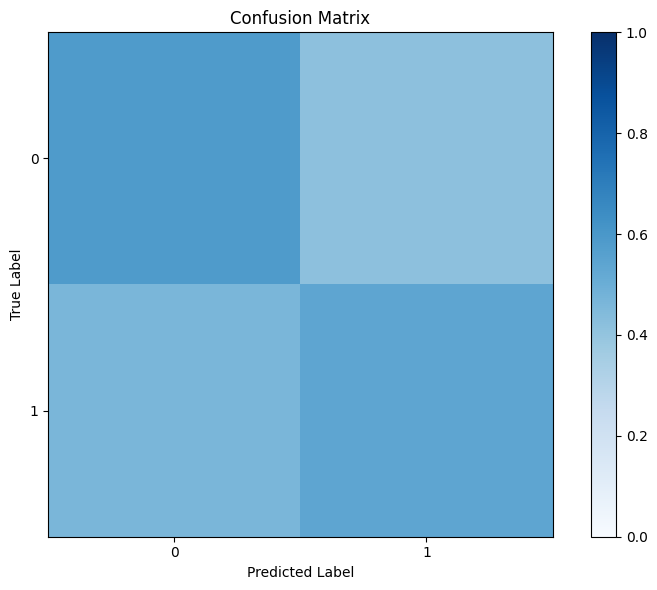

/Users/inescunha/anaconda3/envs/interpret/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/inescunha/anaconda3/envs/interpret/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_112"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_156 (Dropout)           │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_167 (Dense)               │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5729 - loss: 0.7243 - val_accuracy: 0.5797 - val_loss: 0.6977
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.5891 - loss: 0.7034 - val_accuracy: 0.5725 - val_loss: 0.6920
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - accuracy: 0.5851 - loss: 0.6911 - val_accuracy: 0.5797 - val_loss: 0.6874
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - accuracy: 0.5791 - loss: 0.7009 - val_accuracy: 0.5797 - val_loss: 0.6816
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - accuracy: 0.5914 - loss: 0.6797 - val_accuracy: 0.5870 - val_loss: 0.6773
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - accuracy: 0.5695 - loss: 0.6917 - val_accuracy: 0.5942 - val_loss: 0.6738
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - accuracy: 0.6074 - loss: 0.6700 - val_accuracy: 0.6014 - val_loss: 0.6735
Epoch 8/50
73/73 ━━━━━━━━━━━━

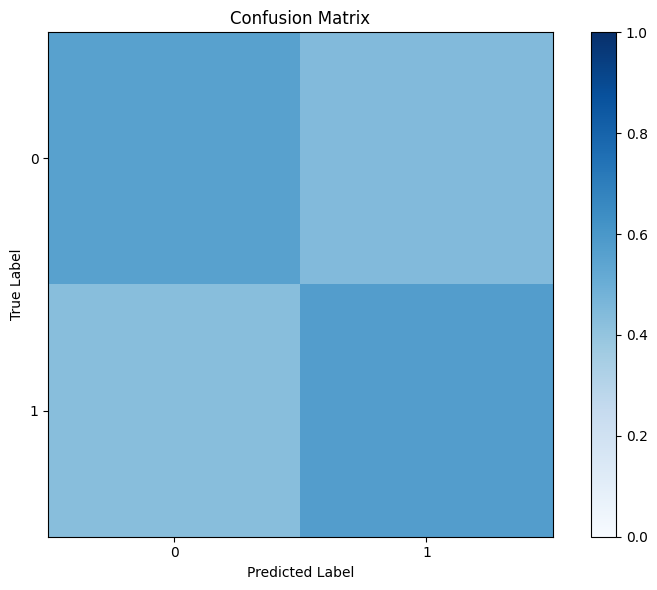

/Users/inescunha/anaconda3/envs/interpret/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/inescunha/anaconda3/envs/interpret/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_114"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_162 (Dropout)           │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_174 (Dense)               │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4709 - loss: 0.9224 - val_accuracy: 0.4638 - val_loss: 0.8834
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.5237 - loss: 0.8561 - val_accuracy: 0.4783 - val_loss: 0.8349
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.5228 - loss: 0.8130 - val_accuracy: 0.5000 - val_loss: 0.7939
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - accuracy: 0.5473 - loss: 0.7717 - val_accuracy: 0.5145 - val_loss: 0.7647
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - accuracy: 0.5522 - loss: 0.7459 - val_accuracy: 0.5435 - val_loss: 0.7388
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - accuracy: 0.5689 - loss: 0.7316 - val_accuracy: 0.5652 - val_loss: 0.7188
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - accuracy: 0.5791 - loss: 0.6968 - val_accuracy: 0.5870 - val_loss: 0.7050
Epoch 8/50
73/73 ━━━━━━━━━━━━

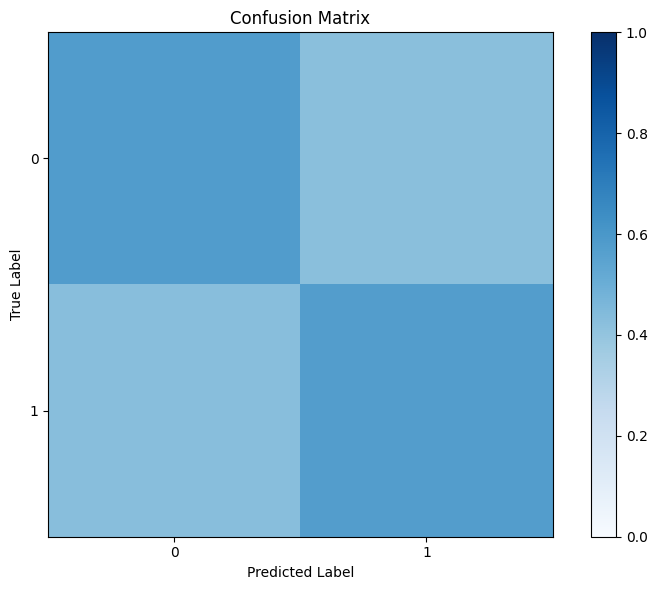

In [23]:
config = {
    'batch_size': 30,
    'epochs': 50,
    'learning_rate': 0.001,
    'seed': 42,
    'latent_dim': 2,
    'GaussianNoise_std': 0.003,
    'lambda_recon': 5, 
    'lambda_adv': 0.05,
    'lambda_clf': 0.05,
    'lambda_cov': 0.1,
}

img_shape = (x_train.shape[1], x_train.shape[2], 1)
confusion_matrices_aae = np.zeros((3,2,2))
for model in range(3):

    encoder = Encoder(img_shape=img_shape, latent_dim=config['latent_dim'], num_classes=2, gaussian_noise_std=config['GaussianNoise_std']).model
    decoder = Decoder(latent_dim=config['latent_dim'], img_shape=img_shape, gaussian_noise_std=config['GaussianNoise_std']).model
    discriminator = Discriminator(latent_dim=config['latent_dim']).model

    if model == 0:
        encoder.load_weights("/Users/inescunha/Downloads/encoderAAE.weights.h5")
        decoder.load_weights("/Users/inescunha/Downloads/decoderAAE.weights.h5")
    if model == 1:
        encoder.load_weights("/Users/inescunha/Documents/GitHub/CellFate/results/models/autoencoder_cov/encoder.weights.h5")
        decoder.load_weights("/Users/inescunha/Documents/GitHub/CellFate/results/models/autoencoder_cov/decoder.weights.h5")
    if model == 2:
        encoder.load_weights("/Users/inescunha/Documents/GitHub/CellFate/results/data_labelling_study/aae_only_seed44/encoder.weights.h5")
        decoder.load_weights("/Users/inescunha/Documents/GitHub/CellFate/results/data_labelling_study/aae_only_seed44/decoder.weights.h5")

    tf.keras.utils.set_random_seed(config['seed'])

    classifier = mlp_classifier(latent_dim=config['latent_dim']) #[:, [3, 8]] 

    # Train the classifier
    classifier.compile(loss='sparse_categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(learning_rate=config['learning_rate']), metrics=['accuracy'])
    classifier.summary()

    x_val, x_test_, y_val, y_test_ = train_test_split(encoder.predict(x_test), y_test, test_size=0.5, random_state=42) # 42 random state

    history = classifier.fit(encoder.predict(x_train), y_train, batch_size=config['batch_size'], epochs=config['epochs'], validation_data=(x_val, y_val)) # 

    #### LAMBDA CONTRASTIVE LOSS = 4

    num_classes = len(np.unique(y_train))
    y_pred = classifier.predict(x_test_)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test_, y_pred_classes)

    class_sums = cm.sum(axis=1, keepdims=True)
    conf_matrix_normalized = cm / class_sums

    print(conf_matrix_normalized)
    confusion_matrices_aae[model] = conf_matrix_normalized

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    plt.imshow(conf_matrix_normalized, interpolation='nearest', cmap=plt.cm.Blues, vmin=0, vmax=1)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

In [24]:
confusion_matrices_aae

array([[[0.58558559, 0.41441441],
        [0.46428571, 0.53571429]],

       [[0.55855856, 0.44144144],
        [0.42857143, 0.57142857]],

       [[0.57657658, 0.42342342],
        [0.42857143, 0.57142857]]])

In [25]:
np.mean(confusion_matrices_aae, axis=0)

array([[0.57357357, 0.42642643],
       [0.44047619, 0.55952381]])

In [26]:
np.std(confusion_matrices_aae, axis=0)

array([[0.01123621, 0.01123621],
       [0.01683588, 0.01683588]])

In [27]:
precision = np.mean(confusion_matrices_aae, axis=0)[0,0] / (np.mean(confusion_matrices_aae, axis=0)[0,0] + np.mean(confusion_matrices_aae, axis=0)[1,0])
print("Model precision", precision)

Model precision 0.5656266525647806


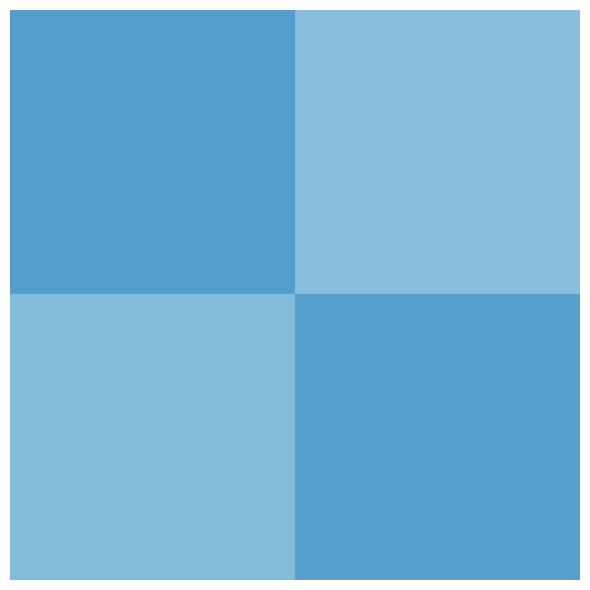

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(np.mean(confusion_matrices_aae, axis=0), interpolation='nearest', cmap=plt.cm.Blues, vmin=0, vmax=1)
plt.axis('off')
plt.tight_layout()
#plt.savefig("mean_confmatrix_aae.pdf", format="pdf", dpi=300, pad_inches=0)
plt.show()

69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


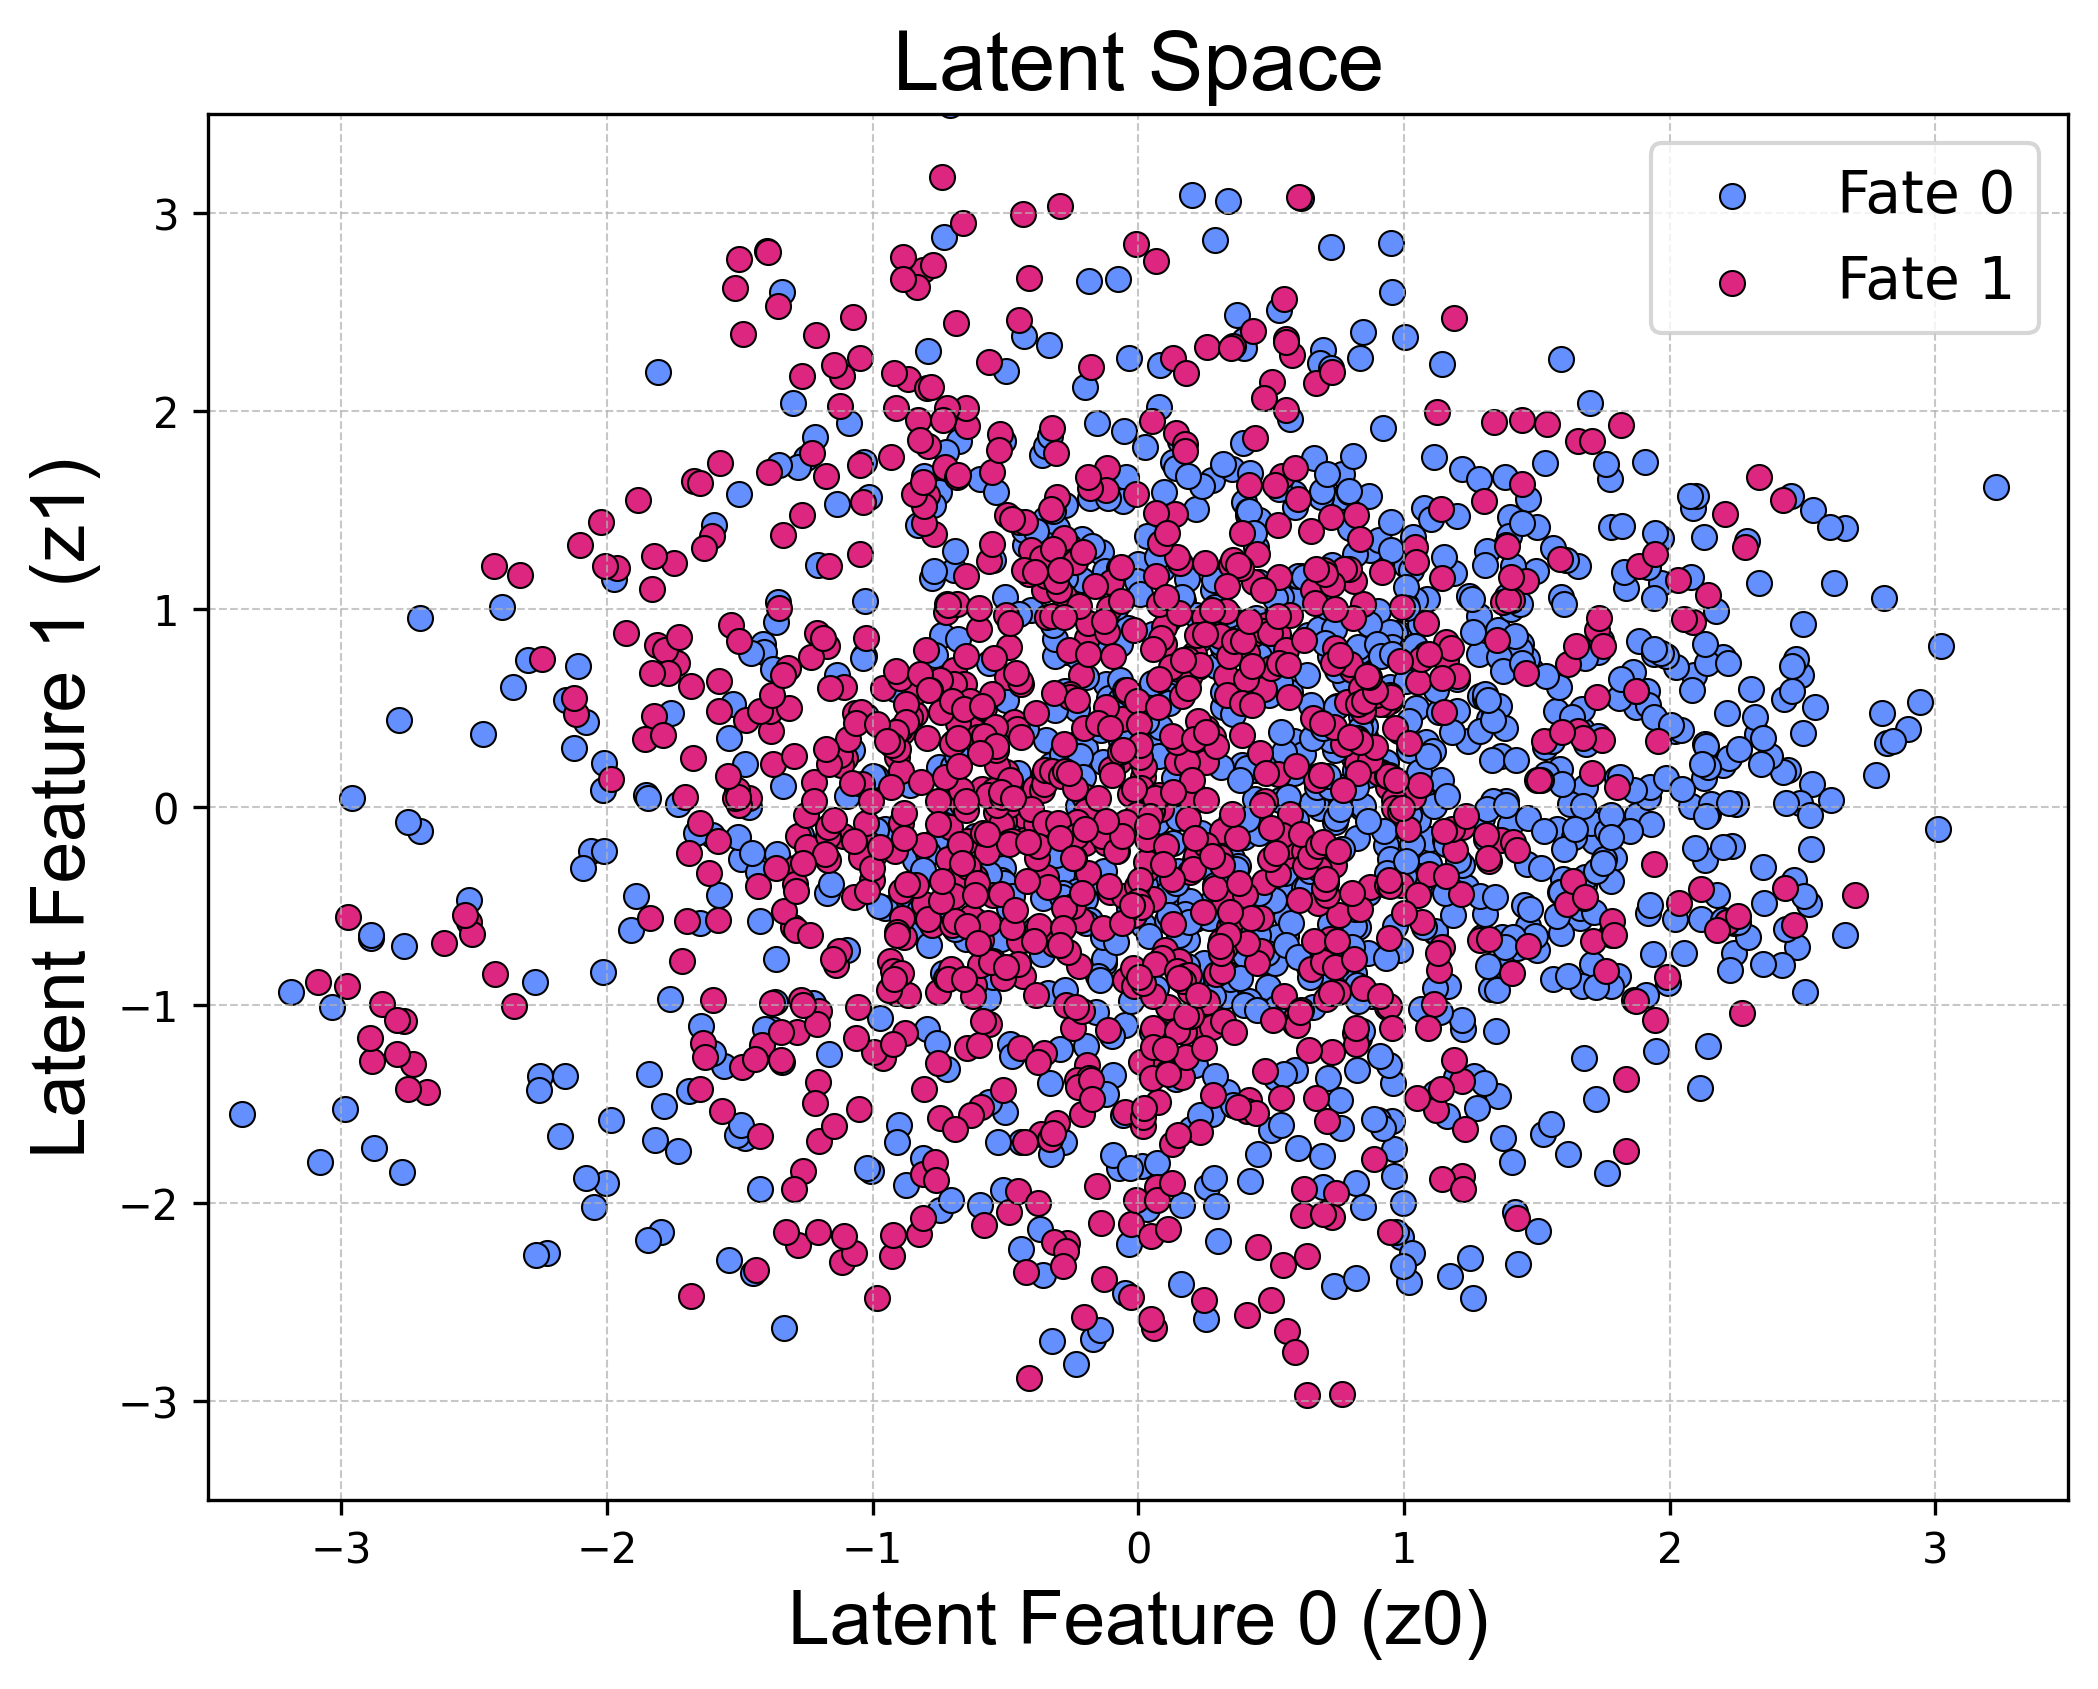

In [ ]:
#### latent space correctly saved

encoder = Encoder(img_shape=img_shape, latent_dim=config['latent_dim'], num_classes=2, gaussian_noise_std=config['GaussianNoise_std']).model
decoder = Decoder(latent_dim=config['latent_dim'], img_shape=img_shape, gaussian_noise_std=config['GaussianNoise_std']).model
discriminator = Discriminator(latent_dim=config['latent_dim']).model

encoder.load_weights("/Users/inescunha/Downloads/encoderAAE.weights.h5")
decoder.load_weights("/Users/inescunha/Downloads/decoderAAE.weights.h5")

# Predict the latent representations
latent_2d = encoder.predict(x_train)  # Shape (1380, 2)

# Find extreme points for axis limits
x_min, x_max = latent_2d[:, 0].min() - 0.5, latent_2d[:, 0].max() + 0.5
y_min, y_max = latent_2d[:, 1].min() - 0.5, latent_2d[:, 1].max() + 0.5

# Create the plot
plt.figure(figsize=(8, 6), dpi=300)

# Scatter plot for each class separately with thin gray edges
plt.scatter(latent_2d[y_train == 0][:, 0], latent_2d[y_train == 0][:, 1], 
            color='#648fff', label="Fate 0", alpha=1, edgecolors='k', linewidth=0.5, rasterized=True)  
plt.scatter(latent_2d[y_train == 1][:, 0], latent_2d[y_train == 1][:, 1], 
            color='#dc267f', label="Fate 1", alpha=1, edgecolors='k', linewidth=0.5, rasterized=True)  

# Set axis limits
plt.xlim(-3.5, 3.5)
plt.ylim(-3.5, 3.5)

# Increase font size and set Arial font
plt.xlabel("Latent Feature 0 (z0)", fontsize=18, fontname="Arial")
plt.ylabel("Latent Feature 1 (z1)", fontsize=18, fontname="Arial")
plt.title("Latent Space", fontsize=20, fontname="Arial")

# Legend and grid
plt.legend(fontsize=14)
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)

#plt.savefig("rasterised_ls_aae.eps", dpi=600, bbox_inches="tight")
plt.show()


## Test LS

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


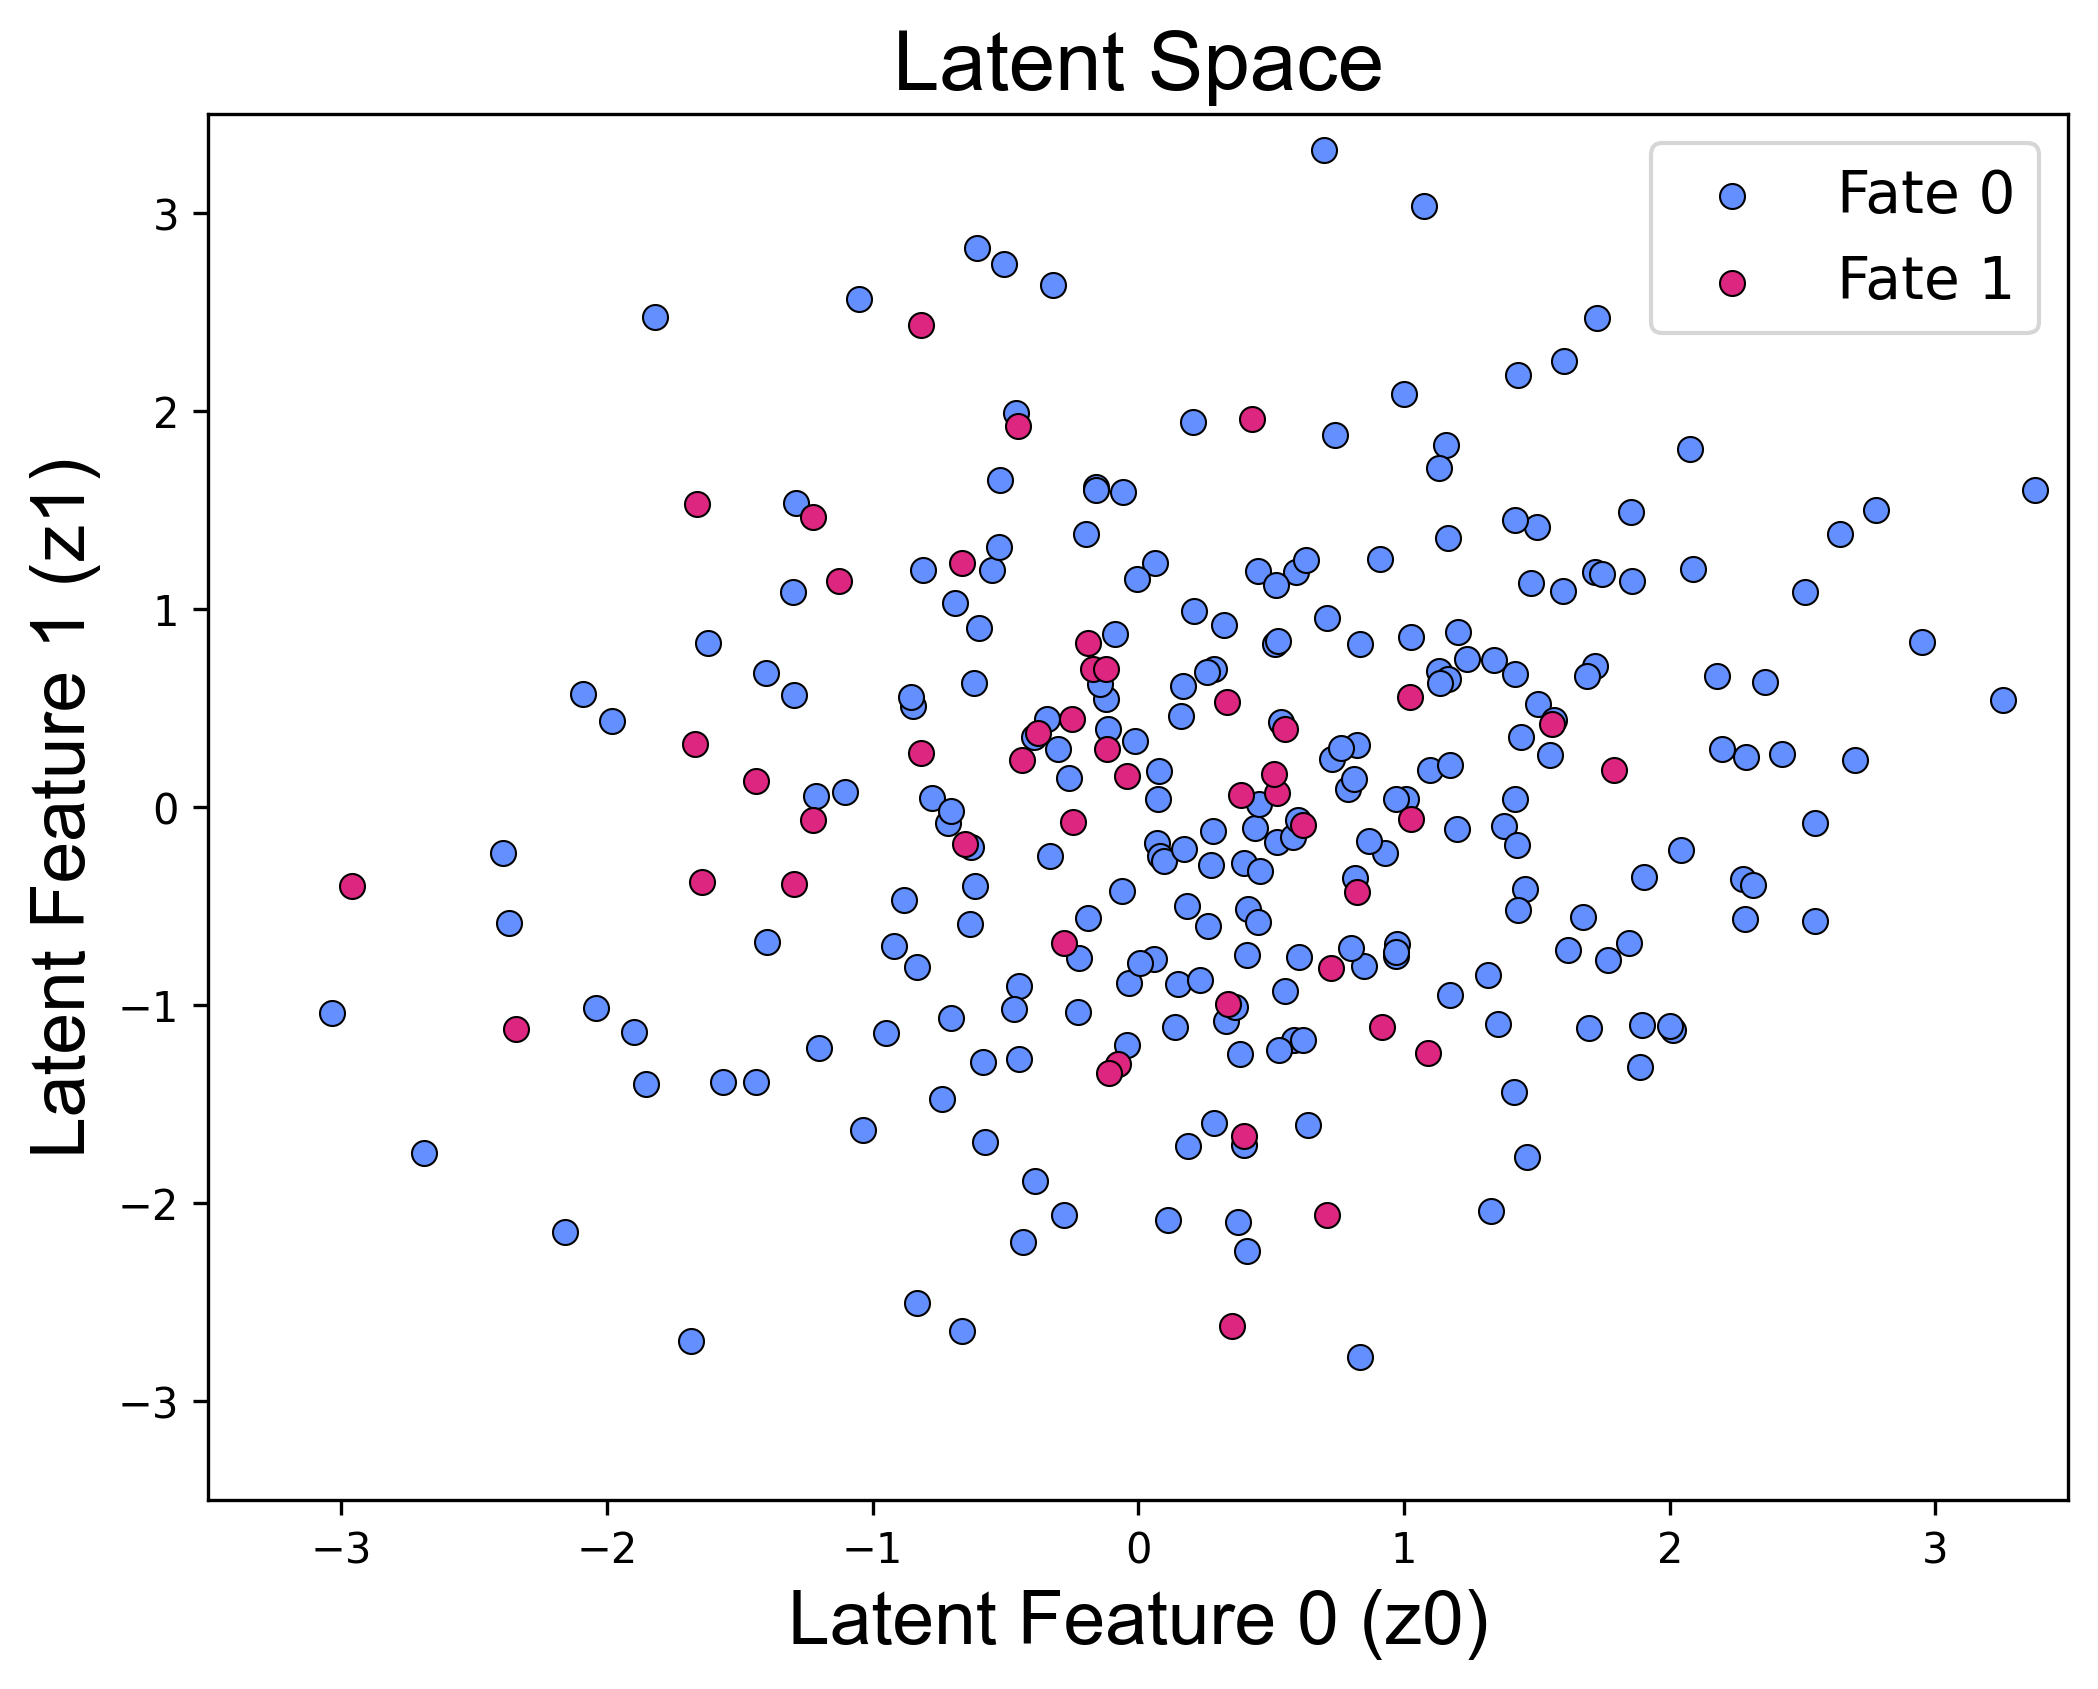

In [ ]:
#### latent space correctly saved

encoder = Encoder(img_shape=img_shape, latent_dim=config['latent_dim'], num_classes=2, gaussian_noise_std=config['GaussianNoise_std']).model
decoder = Decoder(latent_dim=config['latent_dim'], img_shape=img_shape, gaussian_noise_std=config['GaussianNoise_std']).model
discriminator = Discriminator(latent_dim=config['latent_dim']).model

encoder.load_weights("/Users/inescunha/Downloads/encoderAAE.weights.h5")
decoder.load_weights("/Users/inescunha/Downloads/decoderAAE.weights.h5")

# Predict the latent representations
latent_2d = encoder.predict(x_test)  # Shape (1380, 2)

# Find extreme points for axis limits
x_min, x_max = latent_2d[:, 0].min() - 0.5, latent_2d[:, 0].max() + 0.5
y_min, y_max = latent_2d[:, 1].min() - 0.5, latent_2d[:, 1].max() + 0.5

# Create the plot
plt.figure(figsize=(8, 6), dpi=300)

# Scatter plot for each class separately with thin gray edges
plt.scatter(latent_2d[y_test == 0][:, 0], latent_2d[y_test == 0][:, 1], 
            color='#648fff', label="Fate 0", alpha=1, edgecolors='k', linewidth=0.5, rasterized=True)  
plt.scatter(latent_2d[y_test == 1][:, 0], latent_2d[y_test == 1][:, 1], 
            color='#dc267f', label="Fate 1", alpha=1, edgecolors='k', linewidth=0.5, rasterized=True)  

# Set axis limits
plt.xlim(-3.5, 3.5)
plt.ylim(-3.5, 3.5)

# Increase font size and set Arial font
plt.xlabel("Latent Feature 0 (z0)", fontsize=18, fontname="Arial")
plt.ylabel("Latent Feature 1 (z1)", fontsize=18, fontname="Arial")
plt.title("Latent Space", fontsize=20, fontname="Arial")

# Legend and grid
plt.legend(fontsize=14)
#plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)

#plt.savefig("test_aae_noaug_rasterised.eps", dpi=600, bbox_inches="tight")
plt.show()


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


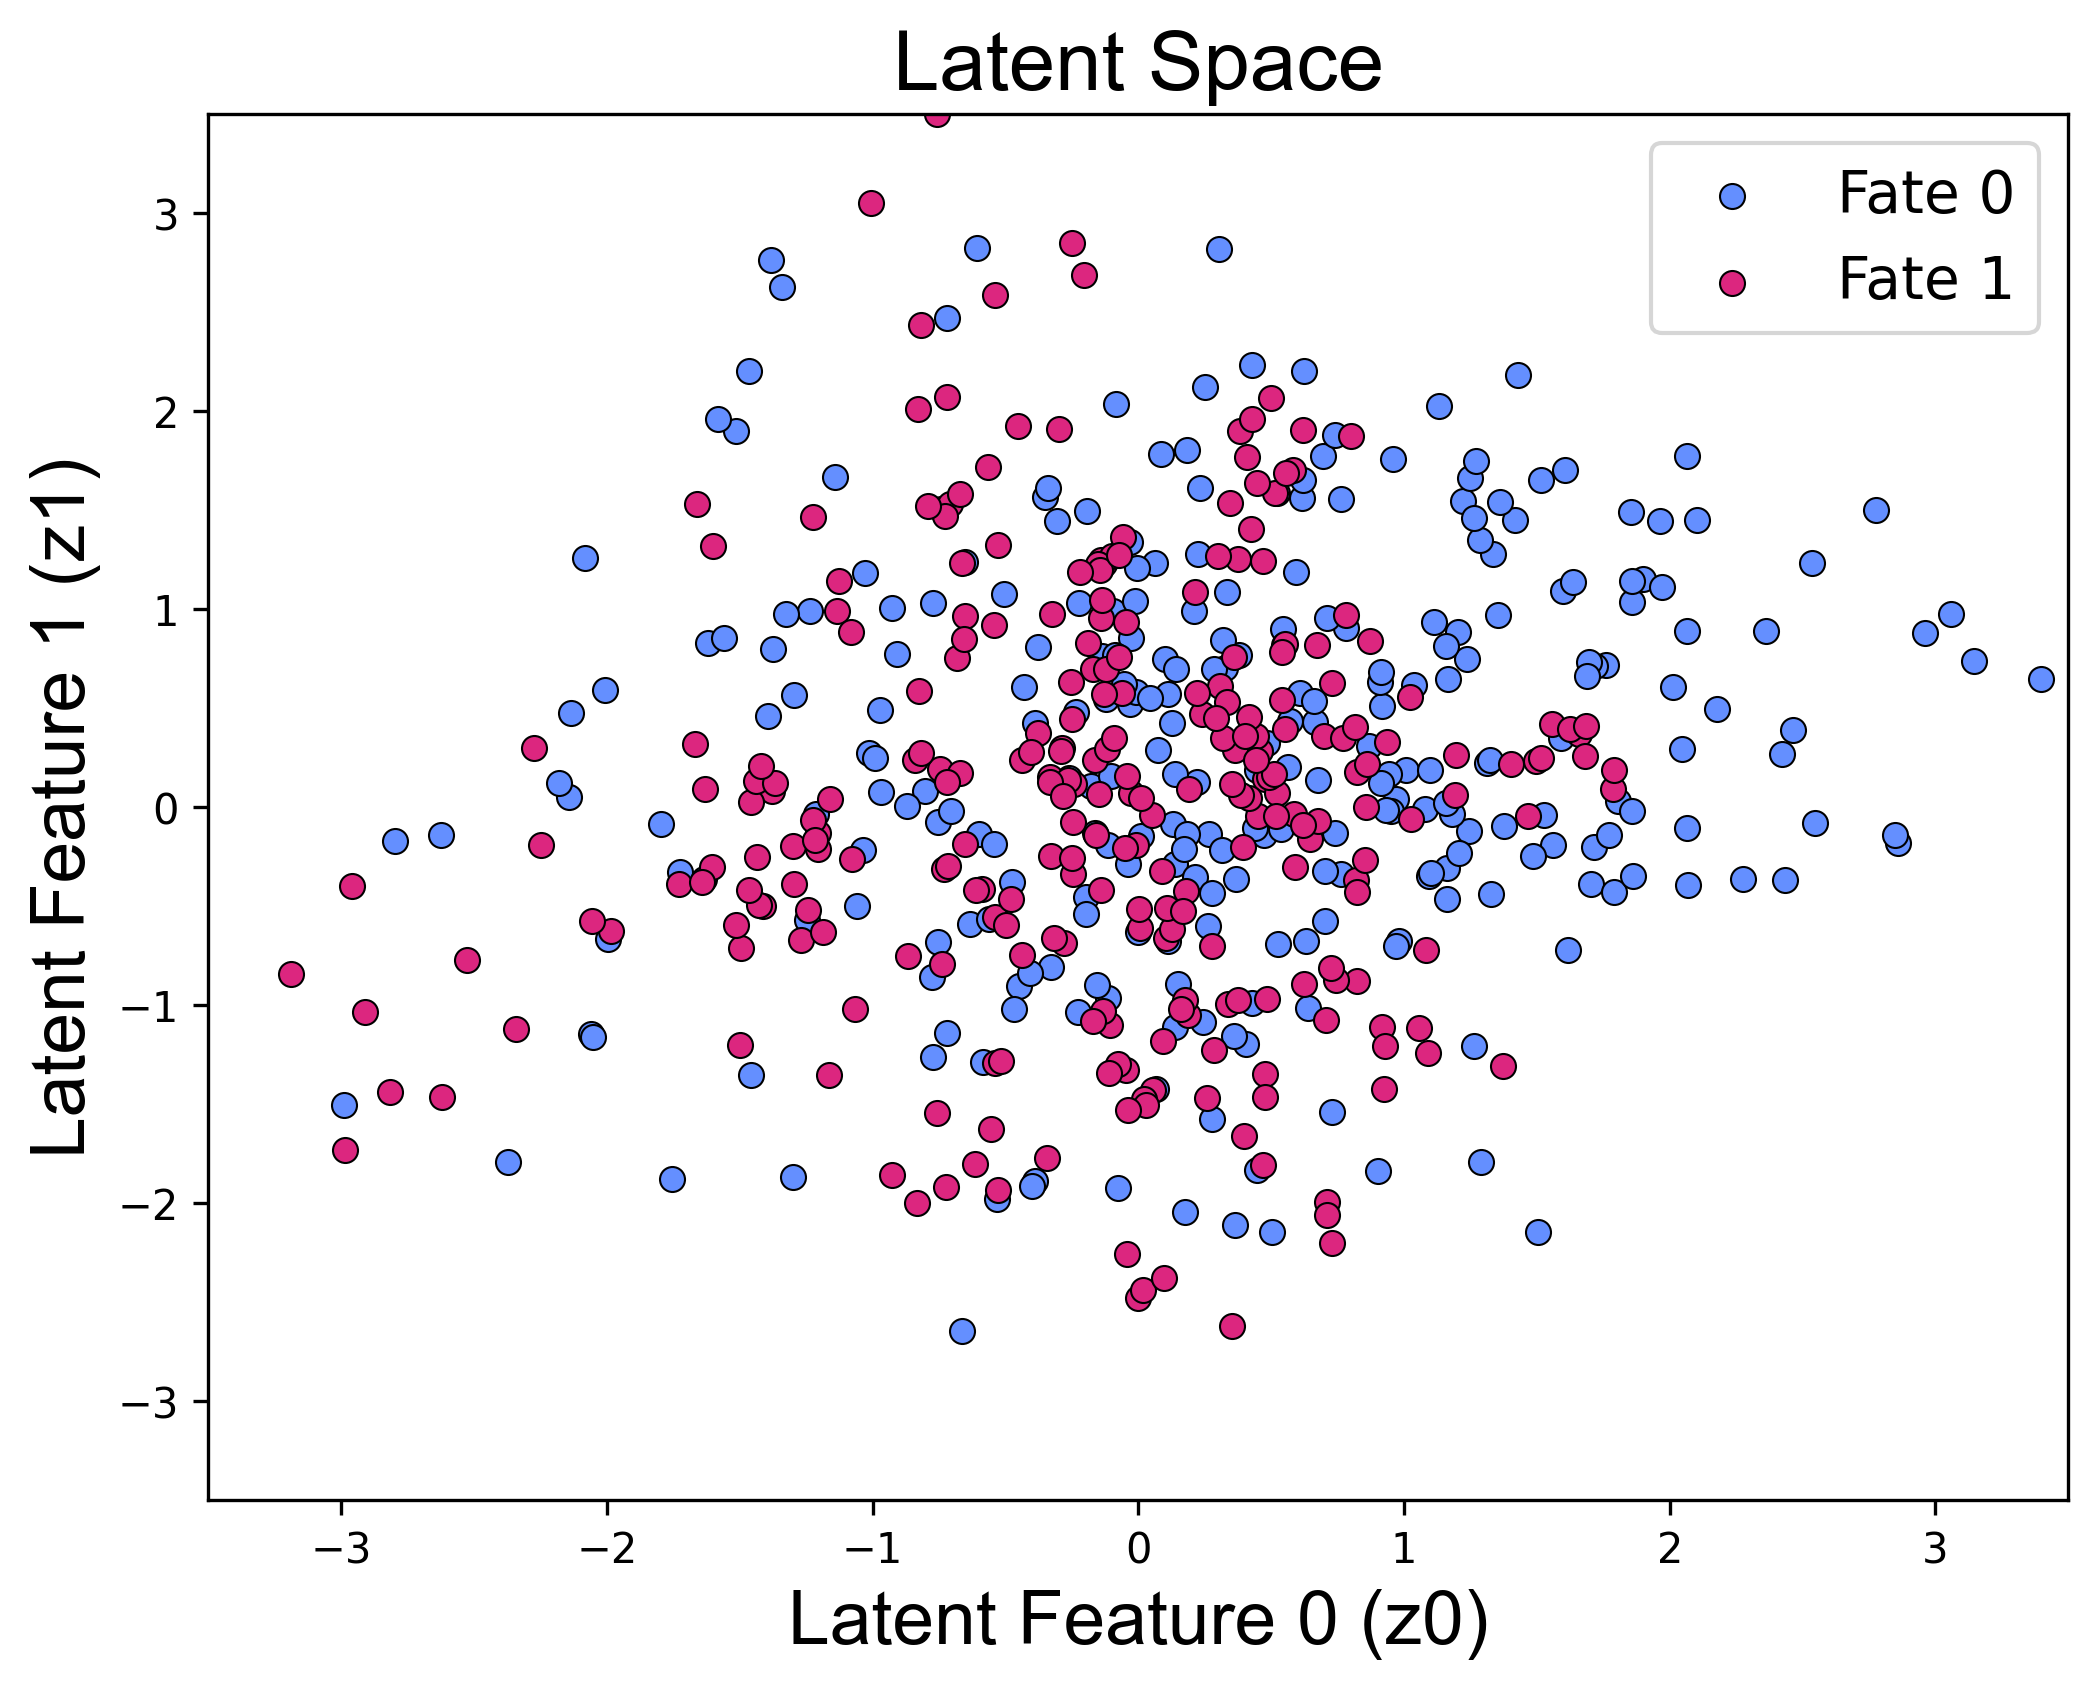

In [ ]:
#### latent space correctly saved

encoder = Encoder(img_shape=img_shape, latent_dim=config['latent_dim'], num_classes=2, gaussian_noise_std=config['GaussianNoise_std']).model
decoder = Decoder(latent_dim=config['latent_dim'], img_shape=img_shape, gaussian_noise_std=config['GaussianNoise_std']).model
discriminator = Discriminator(latent_dim=config['latent_dim']).model

encoder.load_weights("/Users/inescunha/Downloads/encoderAAE.weights.h5")
decoder.load_weights("/Users/inescunha/Downloads/decoderAAE.weights.h5")

augmented_x_test_for_visuals, augmented_y_test_for_visuals = augment_dataset(x_test, y_test, augmentations)

# Predict the latent representations
latent_2d = encoder.predict(augmented_x_test_for_visuals)  # Shape (1380, 2)

# Find extreme points for axis limits
x_min, x_max = latent_2d[:, 0].min() - 0.5, latent_2d[:, 0].max() + 0.5
y_min, y_max = latent_2d[:, 1].min() - 0.5, latent_2d[:, 1].max() + 0.5

# Create the plot
plt.figure(figsize=(8, 6), dpi=300)

# Scatter plot for each class separately with thin gray edges
plt.scatter(latent_2d[augmented_y_test_for_visuals == 0][:, 0], latent_2d[augmented_y_test_for_visuals == 0][:, 1], 
            color='#648fff', label="Fate 0", alpha=1, edgecolors='k', linewidth=0.5, rasterized=True)  
plt.scatter(latent_2d[augmented_y_test_for_visuals == 1][:, 0], latent_2d[augmented_y_test_for_visuals == 1][:, 1], 
            color='#dc267f', label="Fate 1", alpha=1, edgecolors='k', linewidth=0.5, rasterized=True)  

# Set axis limits
plt.xlim(-3.5, 3.5)
plt.ylim(-3.5, 3.5)

# Increase font size and set Arial font
plt.xlabel("Latent Feature 0 (z0)", fontsize=18, fontname="Arial")
plt.ylabel("Latent Feature 1 (z1)", fontsize=18, fontname="Arial")
plt.title("Latent Space", fontsize=20, fontname="Arial")

# Legend and grid
plt.legend(fontsize=14)
#plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)

#plt.savefig("test_aae_aug_rasterised.eps", dpi=600, bbox_inches="tight")
plt.show()


# Figure 2A - LS over time 

## 10% of cell time

In [122]:
x_train = np.load('../data/images/time_norm_train_images.npy')[:,4,:,:]
y_train = np.load('../data/labels/train_labels_augmented4.npy')
x_test = np.load('../data/images/time_norm_test_images.npy')[:,0,:,:]
y_test = np.load('../data/labels/test_labels.npy')

0


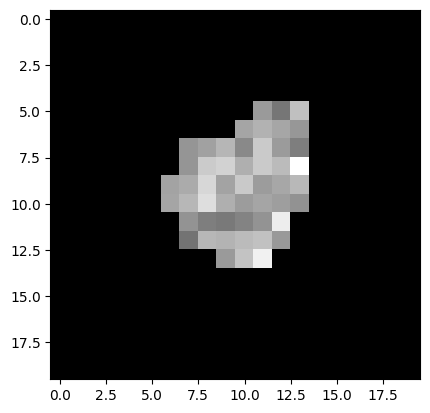

In [123]:
plt.imshow(x_train[0],cmap="gray")
print(y_train[0])

1


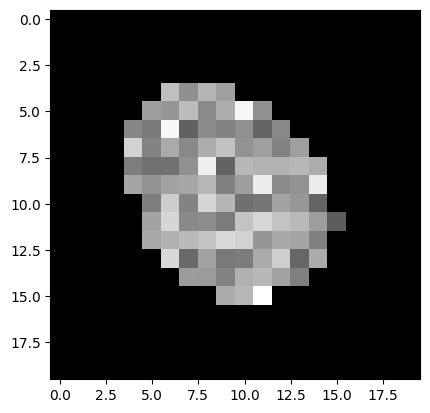

In [124]:
plt.imshow(x_train[1],cmap="gray")
print(y_train[1])

69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


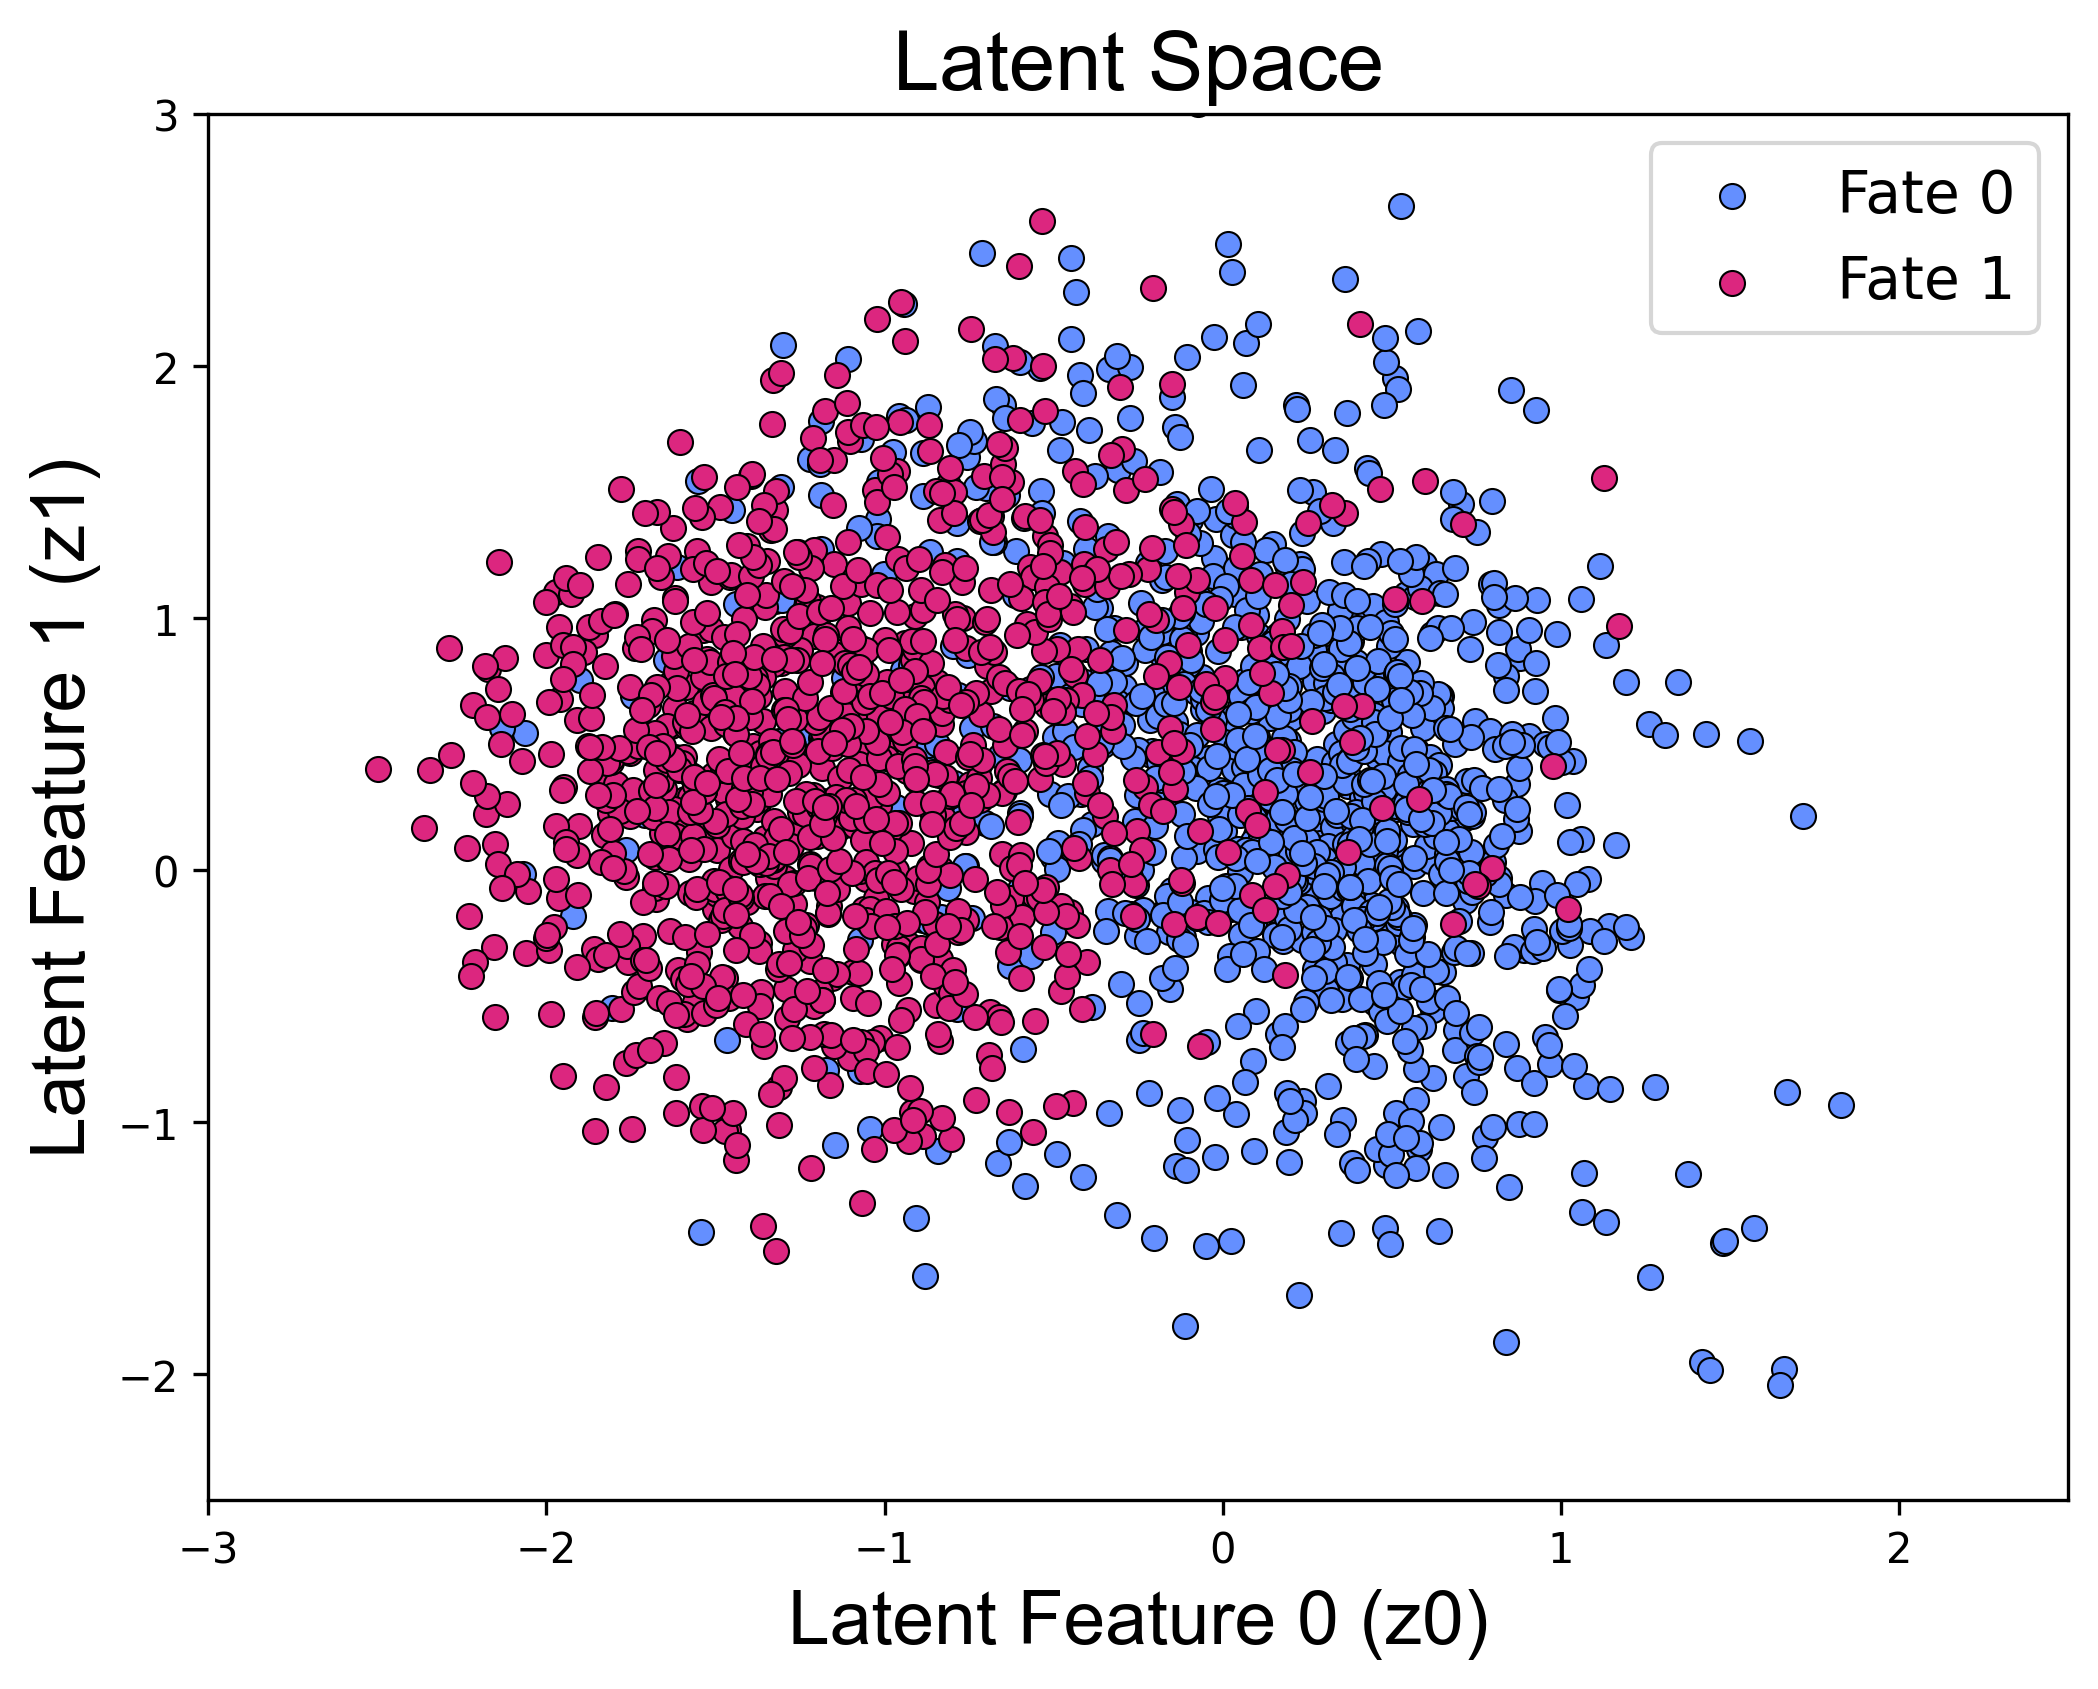

In [ ]:
#### latent space correctly saved

x_train = np.load('../data/images/time_norm_train_images.npy')[:,1,:,:]
y_train = np.load('../data/labels/train_labels_augmented4.npy')
x_test = np.load('../data/images/time_norm_test_images.npy')[:,1,:,:]
y_test = np.load('../data/labels/test_labels.npy')

encoder = Encoder(img_shape=img_shape, latent_dim=config['latent_dim'], num_classes=2, gaussian_noise_std=config['GaussianNoise_std']).model
decoder = Decoder(latent_dim=config['latent_dim'], img_shape=img_shape, gaussian_noise_std=config['GaussianNoise_std']).model
discriminator = Discriminator(latent_dim=config['latent_dim']).model

encoder.load_weights("/Users/inescunha/Downloads/encodertp1.weights.h5")
decoder.load_weights("/Users/inescunha/Downloads/decodertp1.weights.h5")

# Predict the latent representations
latent_2d = encoder.predict(x_train)  # Shape (1380, 2)

# Find extreme points for axis limits
x_min, x_max = latent_2d[:, 0].min() - 0.5, latent_2d[:, 0].max() + 0.5
y_min, y_max = latent_2d[:, 1].min() - 0.5, latent_2d[:, 1].max() + 0.5

# Create the plot
plt.figure(figsize=(8, 6), dpi=300)

# Scatter plot for each class separately with thin gray edges
plt.scatter(latent_2d[y_train == 0][:, 0], latent_2d[y_train == 0][:, 1], 
            color='#648fff', label="Fate 0", alpha=1, edgecolors='k', linewidth=0.5, rasterized=True)  
plt.scatter(latent_2d[y_train == 1][:, 0], latent_2d[y_train == 1][:, 1], 
            color='#dc267f', label="Fate 1", alpha=1, edgecolors='k', linewidth=0.5, rasterized=True)  

# Set axis limits
plt.xlim(-3, 2.5)
plt.ylim(-2.5, 3)

# Increase font size and set Arial font
plt.xlabel("Latent Feature 0 (z0)", fontsize=18, fontname="Arial")
plt.ylabel("Latent Feature 1 (z1)", fontsize=18, fontname="Arial")
plt.title("Latent Space", fontsize=20, fontname="Arial")

# Legend and grid
plt.legend(fontsize=14)
#plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)

#plt.savefig("ls_tp1_rasterised.eps", dpi=600, bbox_inches="tight")
plt.show()


69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


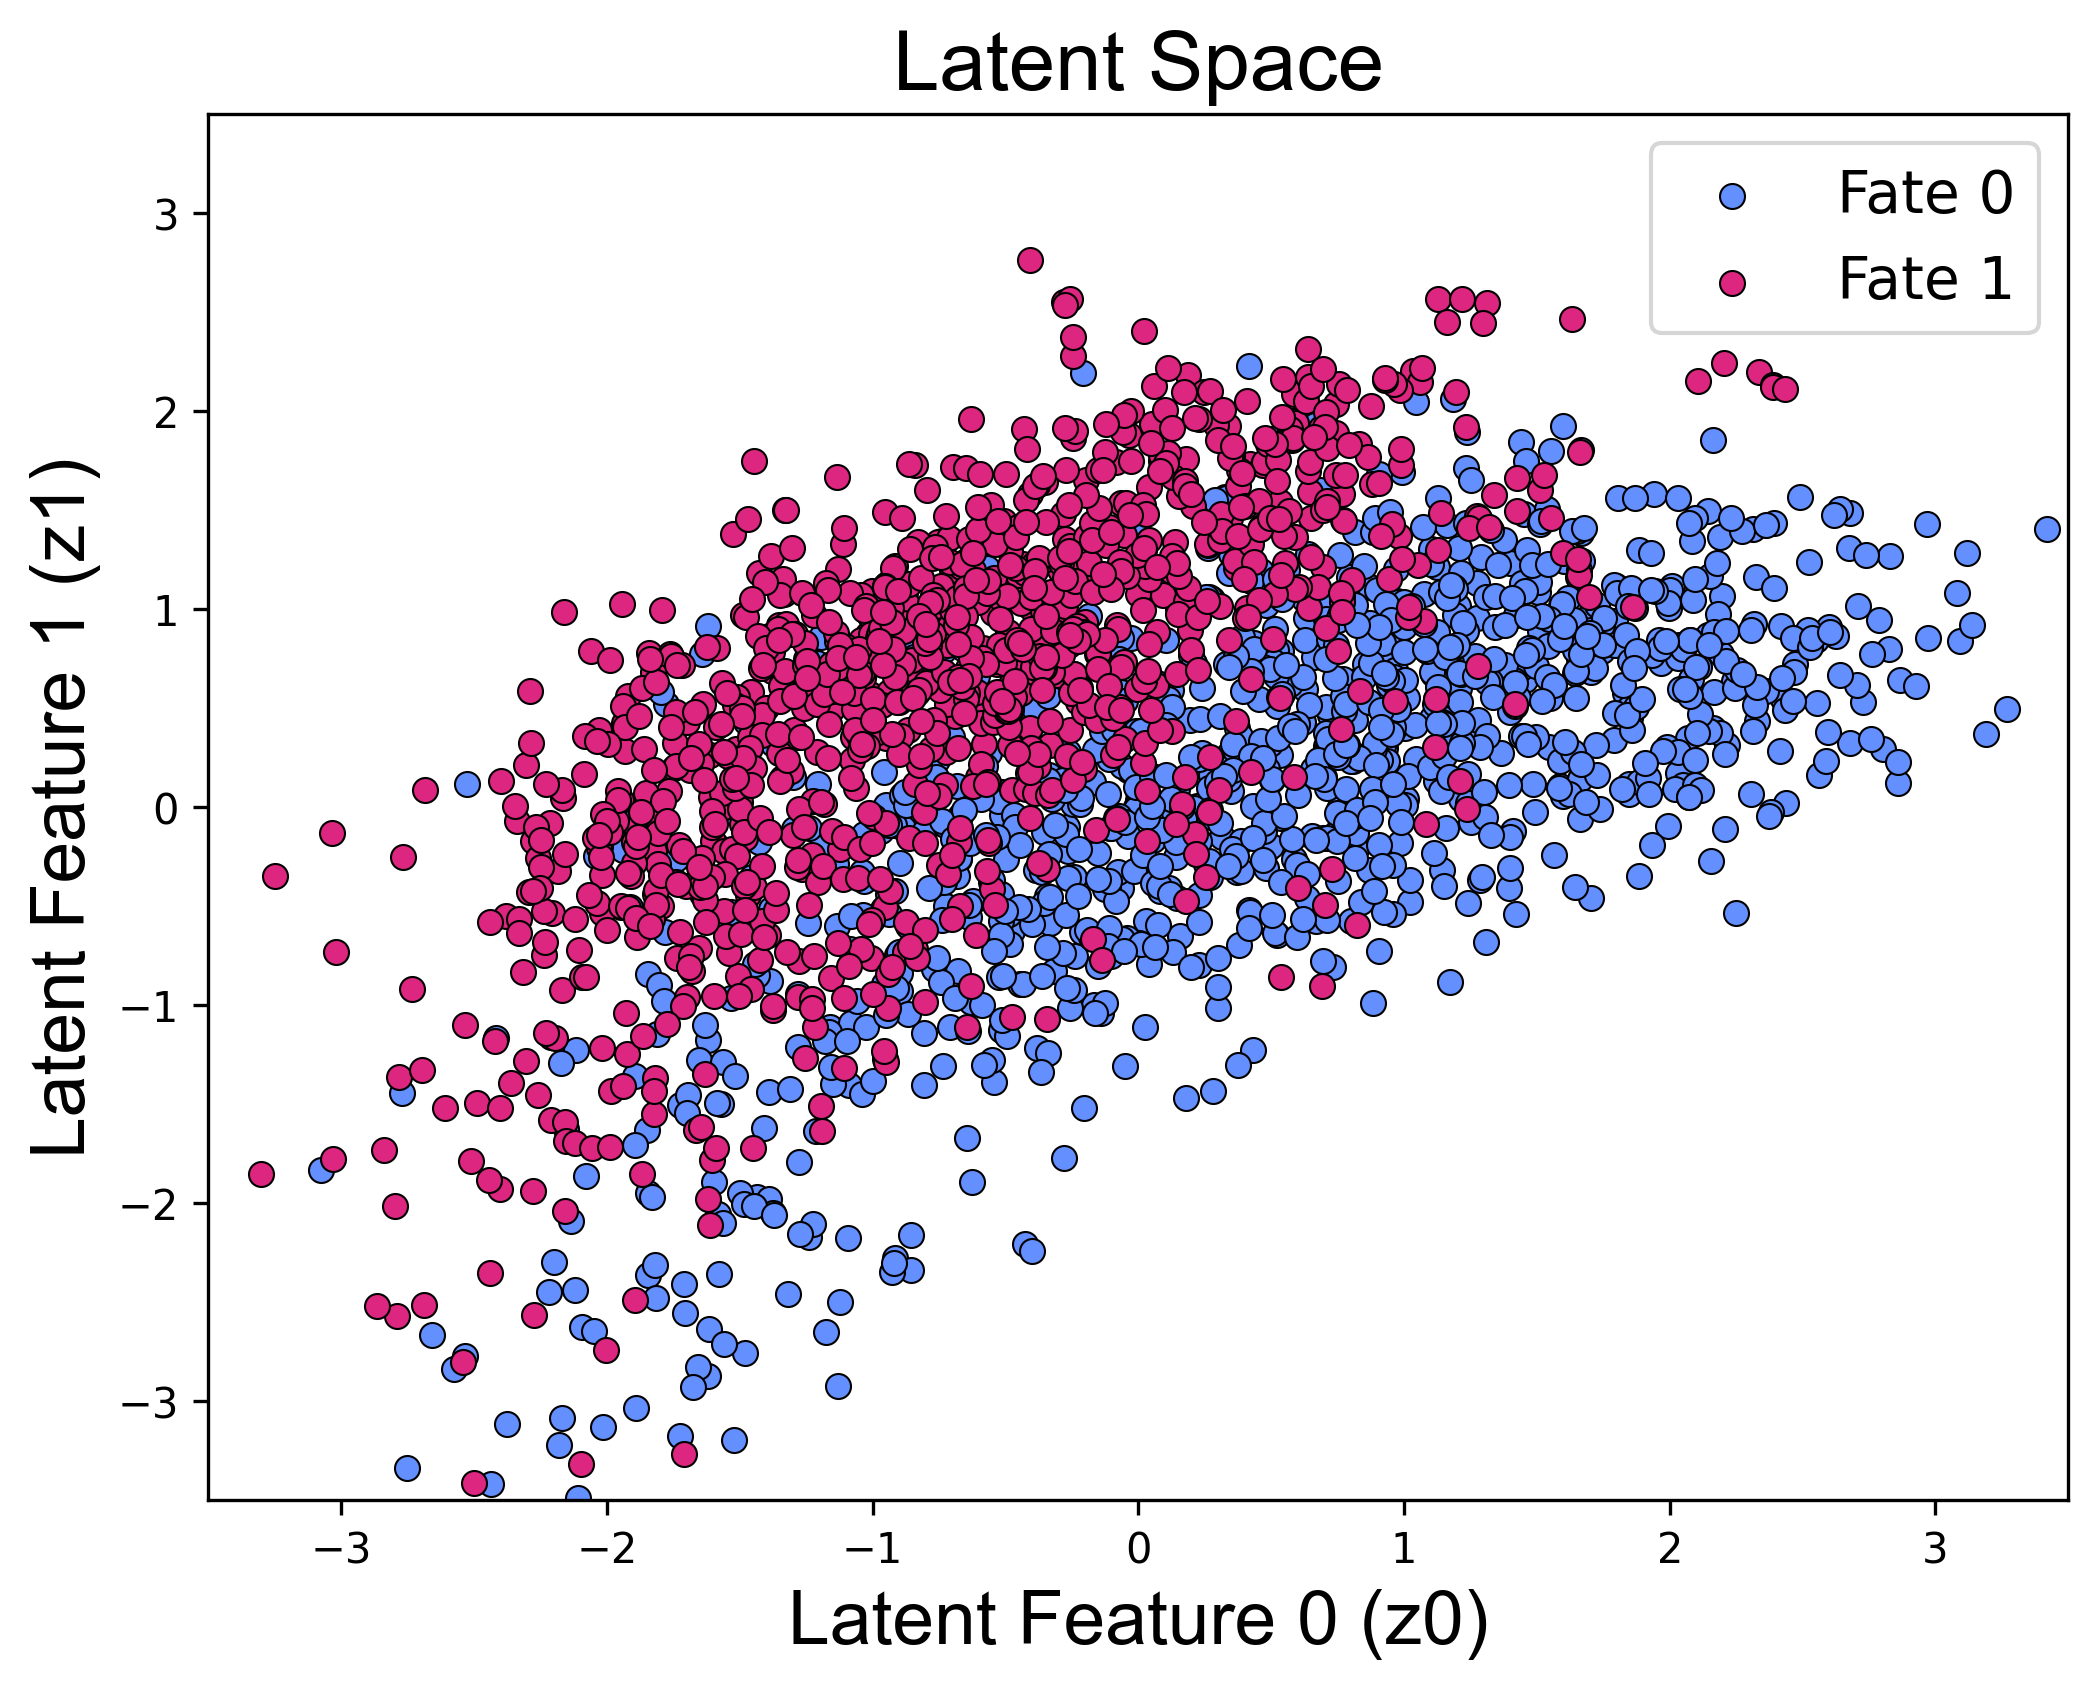

In [ ]:
#### latent space correctly saved

x_train = np.load('../data/images/time_norm_train_images.npy')[:,5,:,:]
y_train = np.load('../data/labels/train_labels_augmented4.npy')
x_test = np.load('../data/images/time_norm_test_images.npy')[:,5,:,:]
y_test = np.load('../data/labels/test_labels.npy')

encoder = Encoder(img_shape=img_shape, latent_dim=config['latent_dim'], num_classes=2, gaussian_noise_std=config['GaussianNoise_std']).model
decoder = Decoder(latent_dim=config['latent_dim'], img_shape=img_shape, gaussian_noise_std=config['GaussianNoise_std']).model
discriminator = Discriminator(latent_dim=config['latent_dim']).model

encoder.load_weights("/Users/inescunha/Downloads/encodertp5.weights.h5")
decoder.load_weights("/Users/inescunha/Downloads/decodertp5.weights.h5")

# Predict the latent representations
latent_2d = encoder.predict(x_train)  # Shape (1380, 2)

# Find extreme points for axis limits
x_min, x_max = latent_2d[:, 0].min() - 0.5, latent_2d[:, 0].max() + 0.5
y_min, y_max = latent_2d[:, 1].min() - 0.5, latent_2d[:, 1].max() + 0.5

# Create the plot
plt.figure(figsize=(8, 6), dpi=300)

# Scatter plot for each class separately with thin gray edges
plt.scatter(latent_2d[y_train == 0][:, 0], latent_2d[y_train == 0][:, 1], 
            color='#648fff', label="Fate 0", alpha=1, edgecolors='k', linewidth=0.5, rasterized=True)  
plt.scatter(latent_2d[y_train == 1][:, 0], latent_2d[y_train == 1][:, 1], 
            color='#dc267f', label="Fate 1", alpha=1, edgecolors='k', linewidth=0.5, rasterized=True)  

# Set axis limits
plt.xlim(-3.5, 3.5)
plt.ylim(-3.5, 3.5)

# Increase font size and set Arial font
plt.xlabel("Latent Feature 0 (z0)", fontsize=18, fontname="Arial")
plt.ylabel("Latent Feature 1 (z1)", fontsize=18, fontname="Arial")
plt.title("Latent Space", fontsize=20, fontname="Arial")

# Legend and grid
plt.legend(fontsize=14)
#plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)

#plt.savefig("ls_tp5_rasterised.eps", dpi=600, bbox_inches="tight")
plt.show()


69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


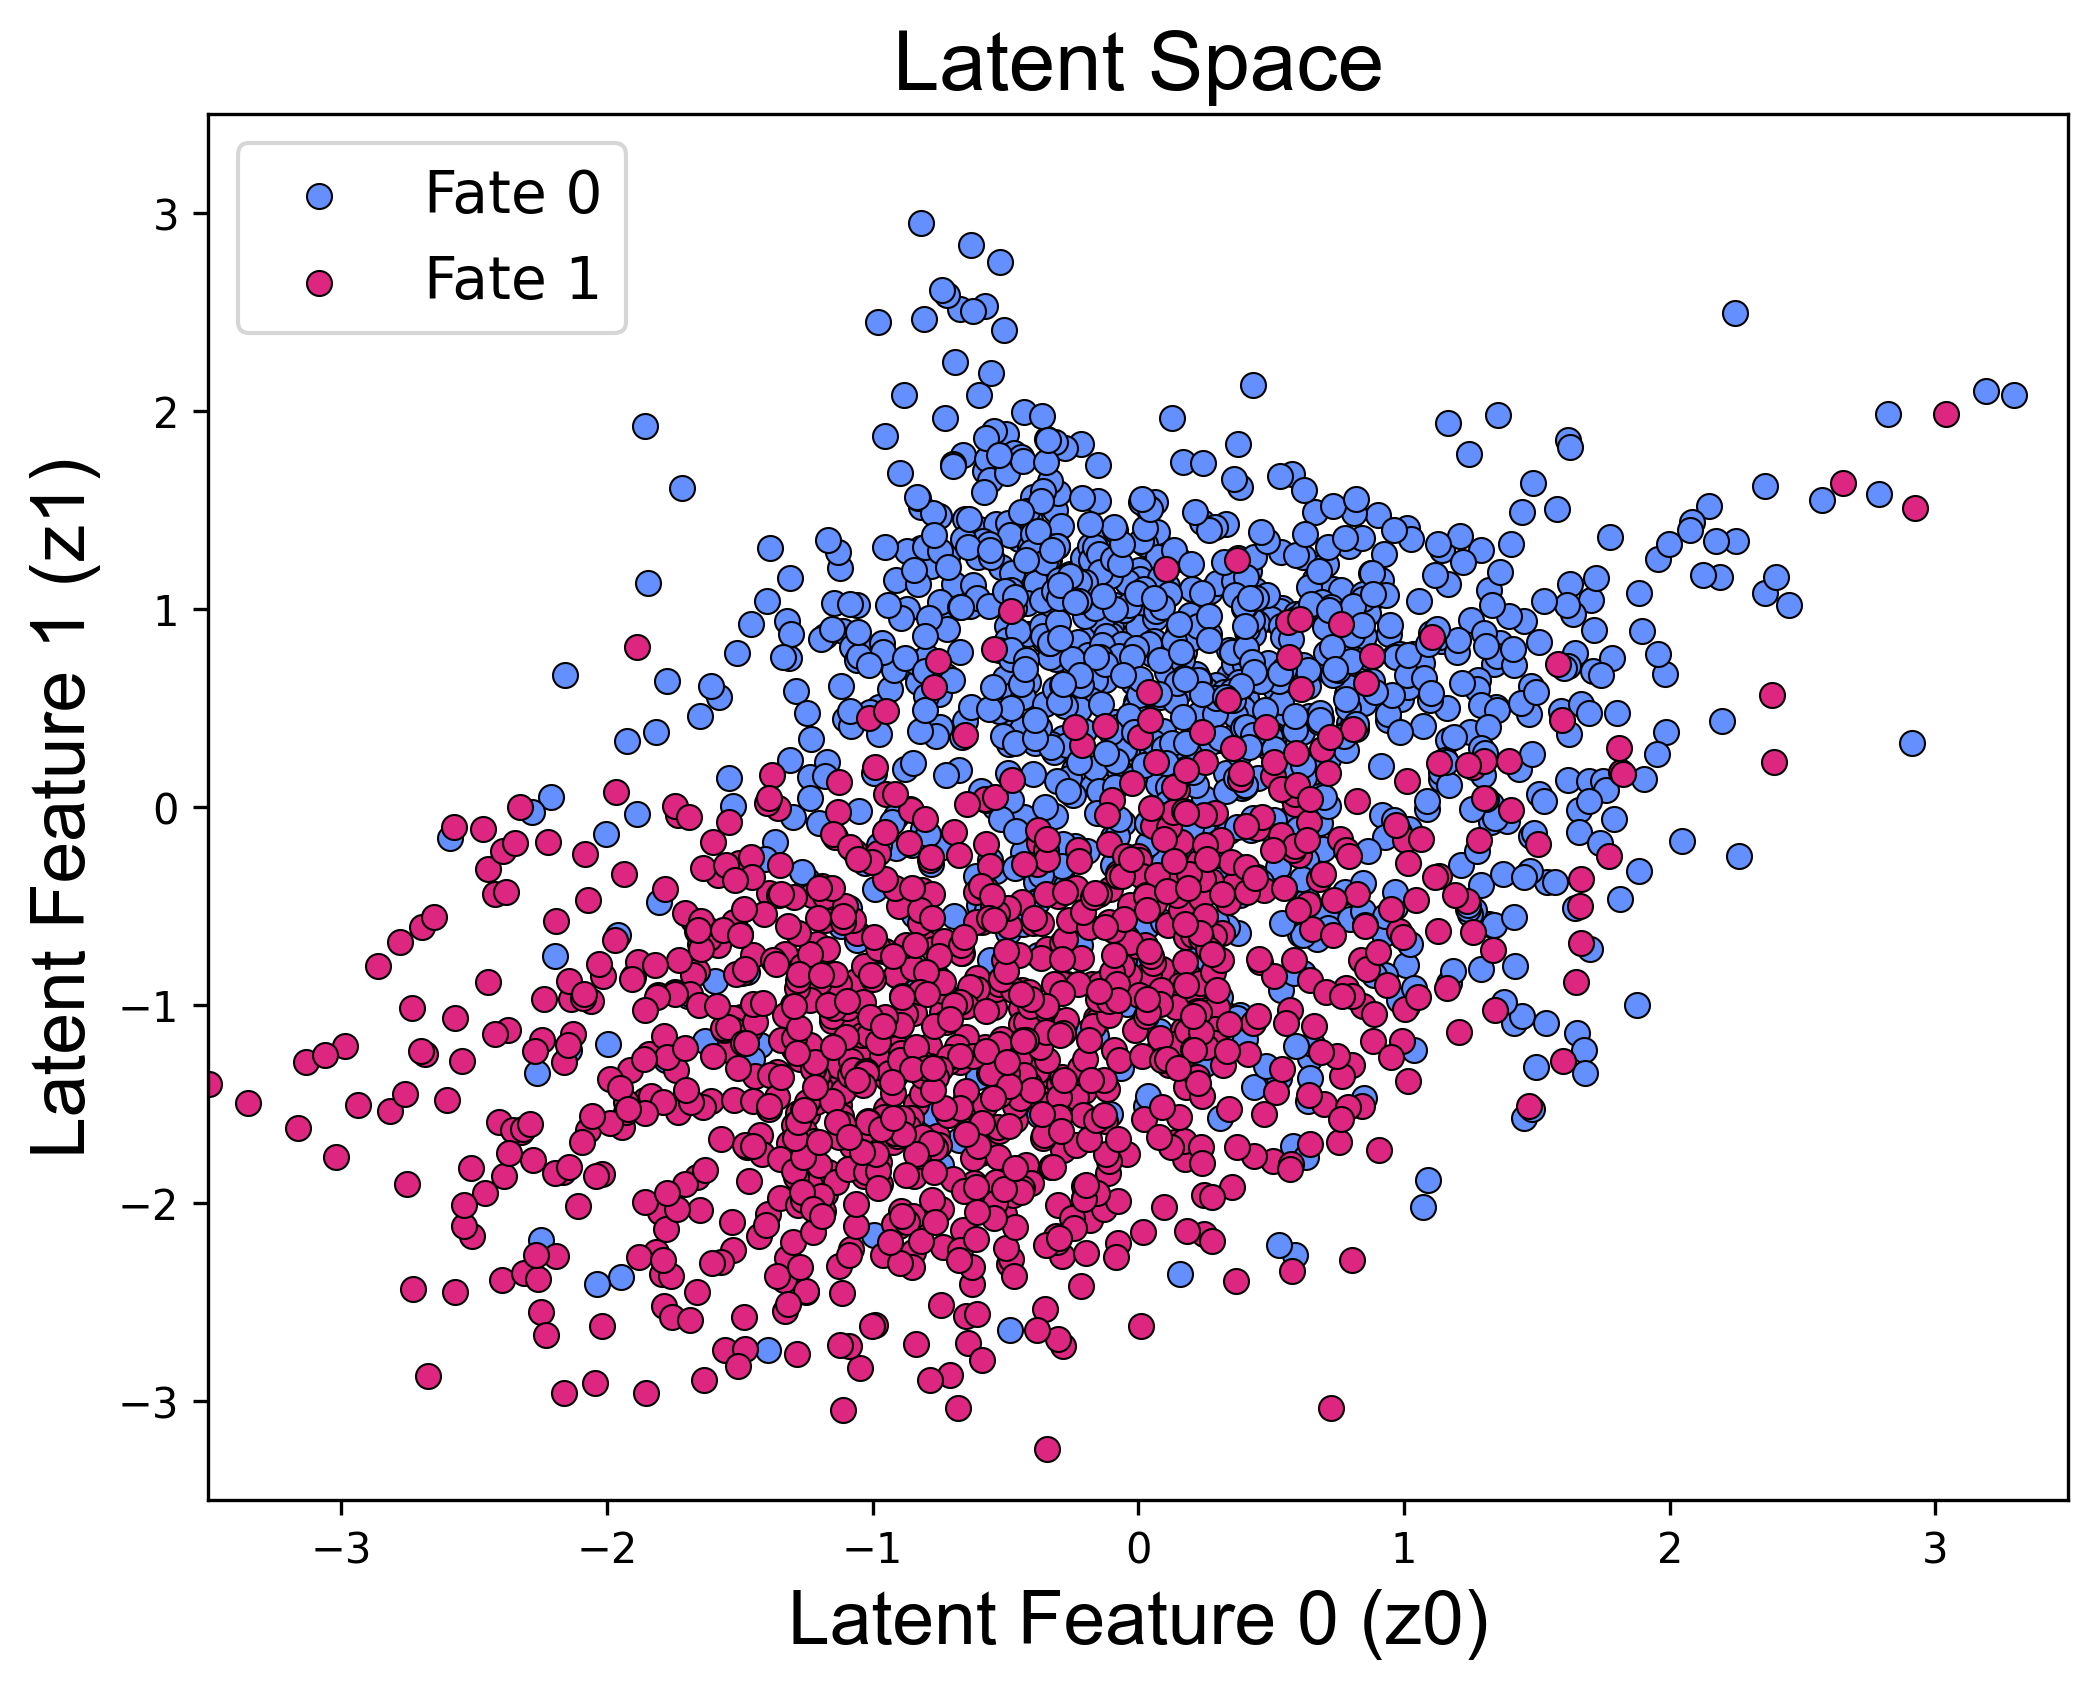

In [ ]:
#### latent space correctly saved

x_train = np.load('../data/images/time_norm_train_images.npy')[:,10,:,:]
y_train = np.load('../data/labels/train_labels_augmented4.npy')
x_test = np.load('../data/images/time_norm_test_images.npy')[:,10,:,:]
y_test = np.load('../data/labels/test_labels.npy')

encoder = Encoder(img_shape=img_shape, latent_dim=config['latent_dim'], num_classes=2, gaussian_noise_std=config['GaussianNoise_std']).model
decoder = Decoder(latent_dim=config['latent_dim'], img_shape=img_shape, gaussian_noise_std=config['GaussianNoise_std']).model
discriminator = Discriminator(latent_dim=config['latent_dim']).model

encoder.load_weights("/Users/inescunha/Downloads/encodertp10.weights.h5")
decoder.load_weights("/Users/inescunha/Downloads/decodertp10.weights.h5")

# Predict the latent representations
latent_2d = encoder.predict(x_train)  # Shape (1380, 2)

# Find extreme points for axis limits
x_min, x_max = latent_2d[:, 0].min() - 0.5, latent_2d[:, 0].max() + 0.5
y_min, y_max = latent_2d[:, 1].min() - 0.5, latent_2d[:, 1].max() + 0.5

# Create the plot
plt.figure(figsize=(8, 6), dpi=300)

# Scatter plot for each class separately with thin gray edges
plt.scatter(latent_2d[y_train == 0][:, 0], latent_2d[y_train == 0][:, 1], 
            color='#648fff', label="Fate 0", alpha=1, edgecolors='k', linewidth=0.5, rasterized=True)  
plt.scatter(latent_2d[y_train == 1][:, 0], latent_2d[y_train == 1][:, 1], 
            color='#dc267f', label="Fate 1", alpha=1, edgecolors='k', linewidth=0.5, rasterized=True)  

# Set axis limits
plt.xlim(-3.5, 3.5)
plt.ylim(-3.5, 3.5)

# Increase font size and set Arial font
plt.xlabel("Latent Feature 0 (z0)", fontsize=18, fontname="Arial")
plt.ylabel("Latent Feature 1 (z1)", fontsize=18, fontname="Arial")
plt.title("Latent Space", fontsize=20, fontname="Arial")

# Legend and grid
plt.legend(fontsize=14)
#plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)

#plt.savefig("ls_tp10_rasterised.eps", dpi=600, bbox_inches="tight")
plt.show()


# Figure 2B - Data Labelling Study

## 20% split 

In [56]:
# non-cumulative

confusion_matrices_split02 = np.zeros((3,2,2))
confusion_matrices_split02[0] = np.load("/Users/inescunha/Documents/GitHub/CellFate/results/data_labelling_study/split_0.2/confusion_matrices_cellfate.npy")[1]
confusion_matrices_split02[1] = np.load("/Users/inescunha/Documents/GitHub/CellFate/results/data_labelling_study/seed43_split_0.2/confusion_matrices_cellfate.npy")[1]
confusion_matrices_split02[2] = np.load("/Users/inescunha/Documents/GitHub/CellFate/results/data_labelling_study/seed44_split_0.2/confusion_matrices_cellfate.npy")[1]

In [80]:
print("Mean",np.mean(confusion_matrices_split02,axis=0))

print("Std",np.std(confusion_matrices_split02,axis=0))

Mean [[0.50750751 0.49249249]
 [0.4047619  0.5952381 ]]
Std [[0.08069086 0.08069086]
 [0.14677176 0.14677176]]


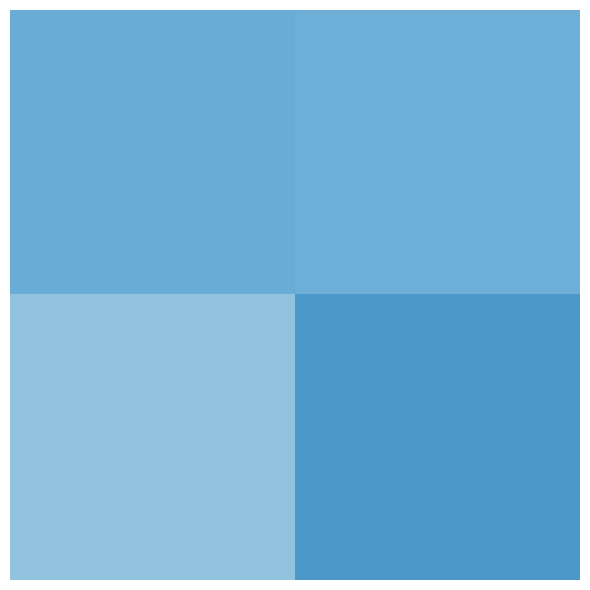

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(np.mean(confusion_matrices_split02, axis=0), interpolation='nearest', cmap=plt.cm.Blues, vmin=0, vmax=1)
plt.axis('off')
plt.tight_layout()
#plt.savefig("mean_confmatrix_split02.pdf", format="pdf", dpi=300, pad_inches=0)
plt.show()

In [62]:
# cumulative

confusion_matrices_cumulative_split02 = np.zeros((3,2,2))
confusion_matrices_cumulative_split02[0] = np.load("/Users/inescunha/Documents/GitHub/CellFate/results/data_labelling_study/cumulative_split_0.2/confusion_matrices_cellfate.npy")[1]
confusion_matrices_cumulative_split02[1] = np.load("/Users/inescunha/Documents/GitHub/CellFate/results/data_labelling_study/cumulative_split_seed43_0.2/confusion_matrices_cellfate.npy")[1]
confusion_matrices_cumulative_split02[2] = np.load("/Users/inescunha/Documents/GitHub/CellFate/results/data_labelling_study/cumulative_split_seed44_0.2/confusion_matrices_cellfate.npy")[1]

In [64]:
print("Mean",np.mean(confusion_matrices_cumulative_split02,axis=0))

print("Std",np.std(confusion_matrices_cumulative_split02,axis=0))

Mean [[0.61561562 0.38438438]
 [0.45238095 0.54761905]]
Std [[0.14514169 0.14514169]
 [0.24281045 0.24281045]]


## 50% split

In [72]:
# non-cumulative

confusion_matrices_split05 = np.zeros((3,2,2))
confusion_matrices_split05[0] = np.load("/Users/inescunha/Documents/GitHub/CellFate/results/data_labelling_study/split_0.5/confusion_matrices_cellfate.npy")[4]
confusion_matrices_split05[1] = np.load("/Users/inescunha/Documents/GitHub/CellFate/results/data_labelling_study/seed43_split_0.5/confusion_matrices_cellfate.npy")[4]
confusion_matrices_split05[2] = np.load("/Users/inescunha/Documents/GitHub/CellFate/results/data_labelling_study/seed44_split_0.5/confusion_matrices_cellfate.npy")[4]

In [82]:
print("Mean",np.mean(confusion_matrices_split05,axis=0))

print("Std",np.std(confusion_matrices_split05,axis=0))

Mean [[0.57957958 0.42042042]
 [0.28571429 0.71428571]]
Std [[0.05990972 0.05990972]
 [0.05050763 0.05050763]]


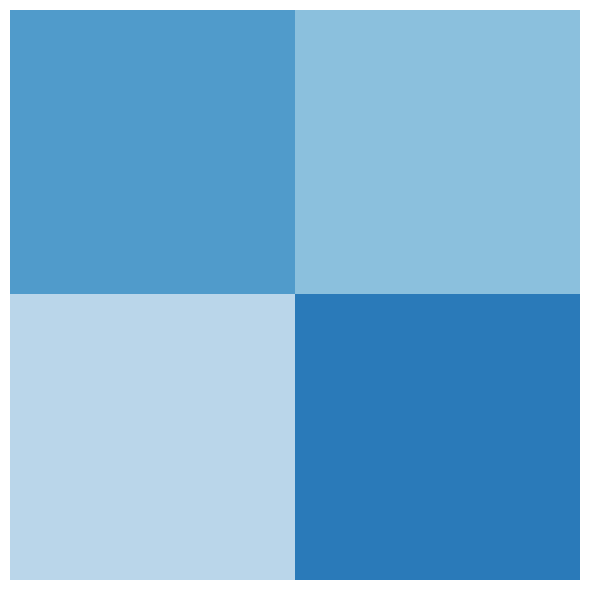

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(np.mean(confusion_matrices_split05, axis=0), interpolation='nearest', cmap=plt.cm.Blues, vmin=0, vmax=1)
plt.axis('off')
plt.tight_layout()
#plt.savefig("mean_confmatrix_split05.pdf", format="pdf", dpi=300, pad_inches=0)
plt.show()

In [78]:
# cumulative

confusion_matrices_cumulative_split05 = np.zeros((3,2,2))
confusion_matrices_cumulative_split05[0] = np.load("/Users/inescunha/Documents/GitHub/CellFate/results/data_labelling_study/cumulative_split_0.5/confusion_matrices_cellfate.npy")[4]
confusion_matrices_cumulative_split05[1] = np.load("/Users/inescunha/Documents/GitHub/CellFate/results/data_labelling_study/cumulative_split_seed43_0.5/confusion_matrices_cellfate.npy")[4]
confusion_matrices_cumulative_split05[2] = np.load("/Users/inescunha/Documents/GitHub/CellFate/results/data_labelling_study/cumulative_split_seed44_0.5/confusion_matrices_cellfate.npy")[4]

In [79]:
print("Mean",np.mean(confusion_matrices_cumulative_split05,axis=0))

print("Std",np.std(confusion_matrices_cumulative_split05,axis=0))

Mean [[0.56156156 0.43843844]
 [0.33333333 0.66666667]]
Std [[0.09197233 0.09197233]
 [0.09373819 0.09373819]]


In [92]:
from src.preprocessing.preprocessing_functions import *

train_images = np.load("../data/images/train_images.npy")
test_images = np.load("../data/images/test_images.npy")
train_labels = np.load("../data/labels/train_labels.npy")
test_labels = np.load("../data/labels/test_labels.npy")
train_tracks = np.load("../data/tracks/train_tracks.npy")
test_tracks = np.load("../data/tracks/test_tracks.npy")

config = {
    'batch_size': 30,
    'epochs': 50,
    'learning_rate': 0.001,
    'seed': 42,
    'latent_dim': 2,
    'GaussianNoise_std': 0.003,
    'lambda_recon': 5, 
    'lambda_adv': 0.05,
    'lambda_clf': 0.05,
    'lambda_cov': 0.1,
}

size = 0.2
np.random.seed(config['seed'])
less_indexes = np.random.choice(np.arange(len(train_labels)), int(size * len(train_labels)), replace=False)

smaller_x_train_images = train_images[less_indexes]
smaller_y_train = train_labels[less_indexes]
smaller_x_train_tracks = train_tracks[less_indexes]

# Augment image data
smaller_train_images_augmented, smaller_train_labels_augmented = augment_dataset(smaller_x_train_images, smaller_y_train, augmentations)

# Stretch intensities of new images (train and test)
stretched_x_train_smaller, stretched_x_test = stretch_intensities_global(smaller_train_images_augmented, test_images)

# Pick only frame zero
x_train = stretched_x_train_smaller[:,0,:,:]
y_train = smaller_train_labels_augmented
x_test = stretched_x_test[:,0,:,:]
y_test = test_labels

img_shape = (x_train.shape[1], x_train.shape[2], 1)
encoder = Encoder(img_shape=img_shape, latent_dim=config['latent_dim'], num_classes=2, gaussian_noise_std=config['GaussianNoise_std']).model
decoder = Decoder(latent_dim=config['latent_dim'], img_shape=img_shape, gaussian_noise_std=config['GaussianNoise_std']).model
discriminator = Discriminator(latent_dim=config['latent_dim']).model

encoder.load_weights("/Users/inescunha/Documents/GitHub/CellFate/results/data_labelling_study/split_0.2/encoder.weights.h5")
decoder.load_weights("/Users/inescunha/Documents/GitHub/CellFate/results/data_labelling_study/split_0.2/decoder.weights.h5")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


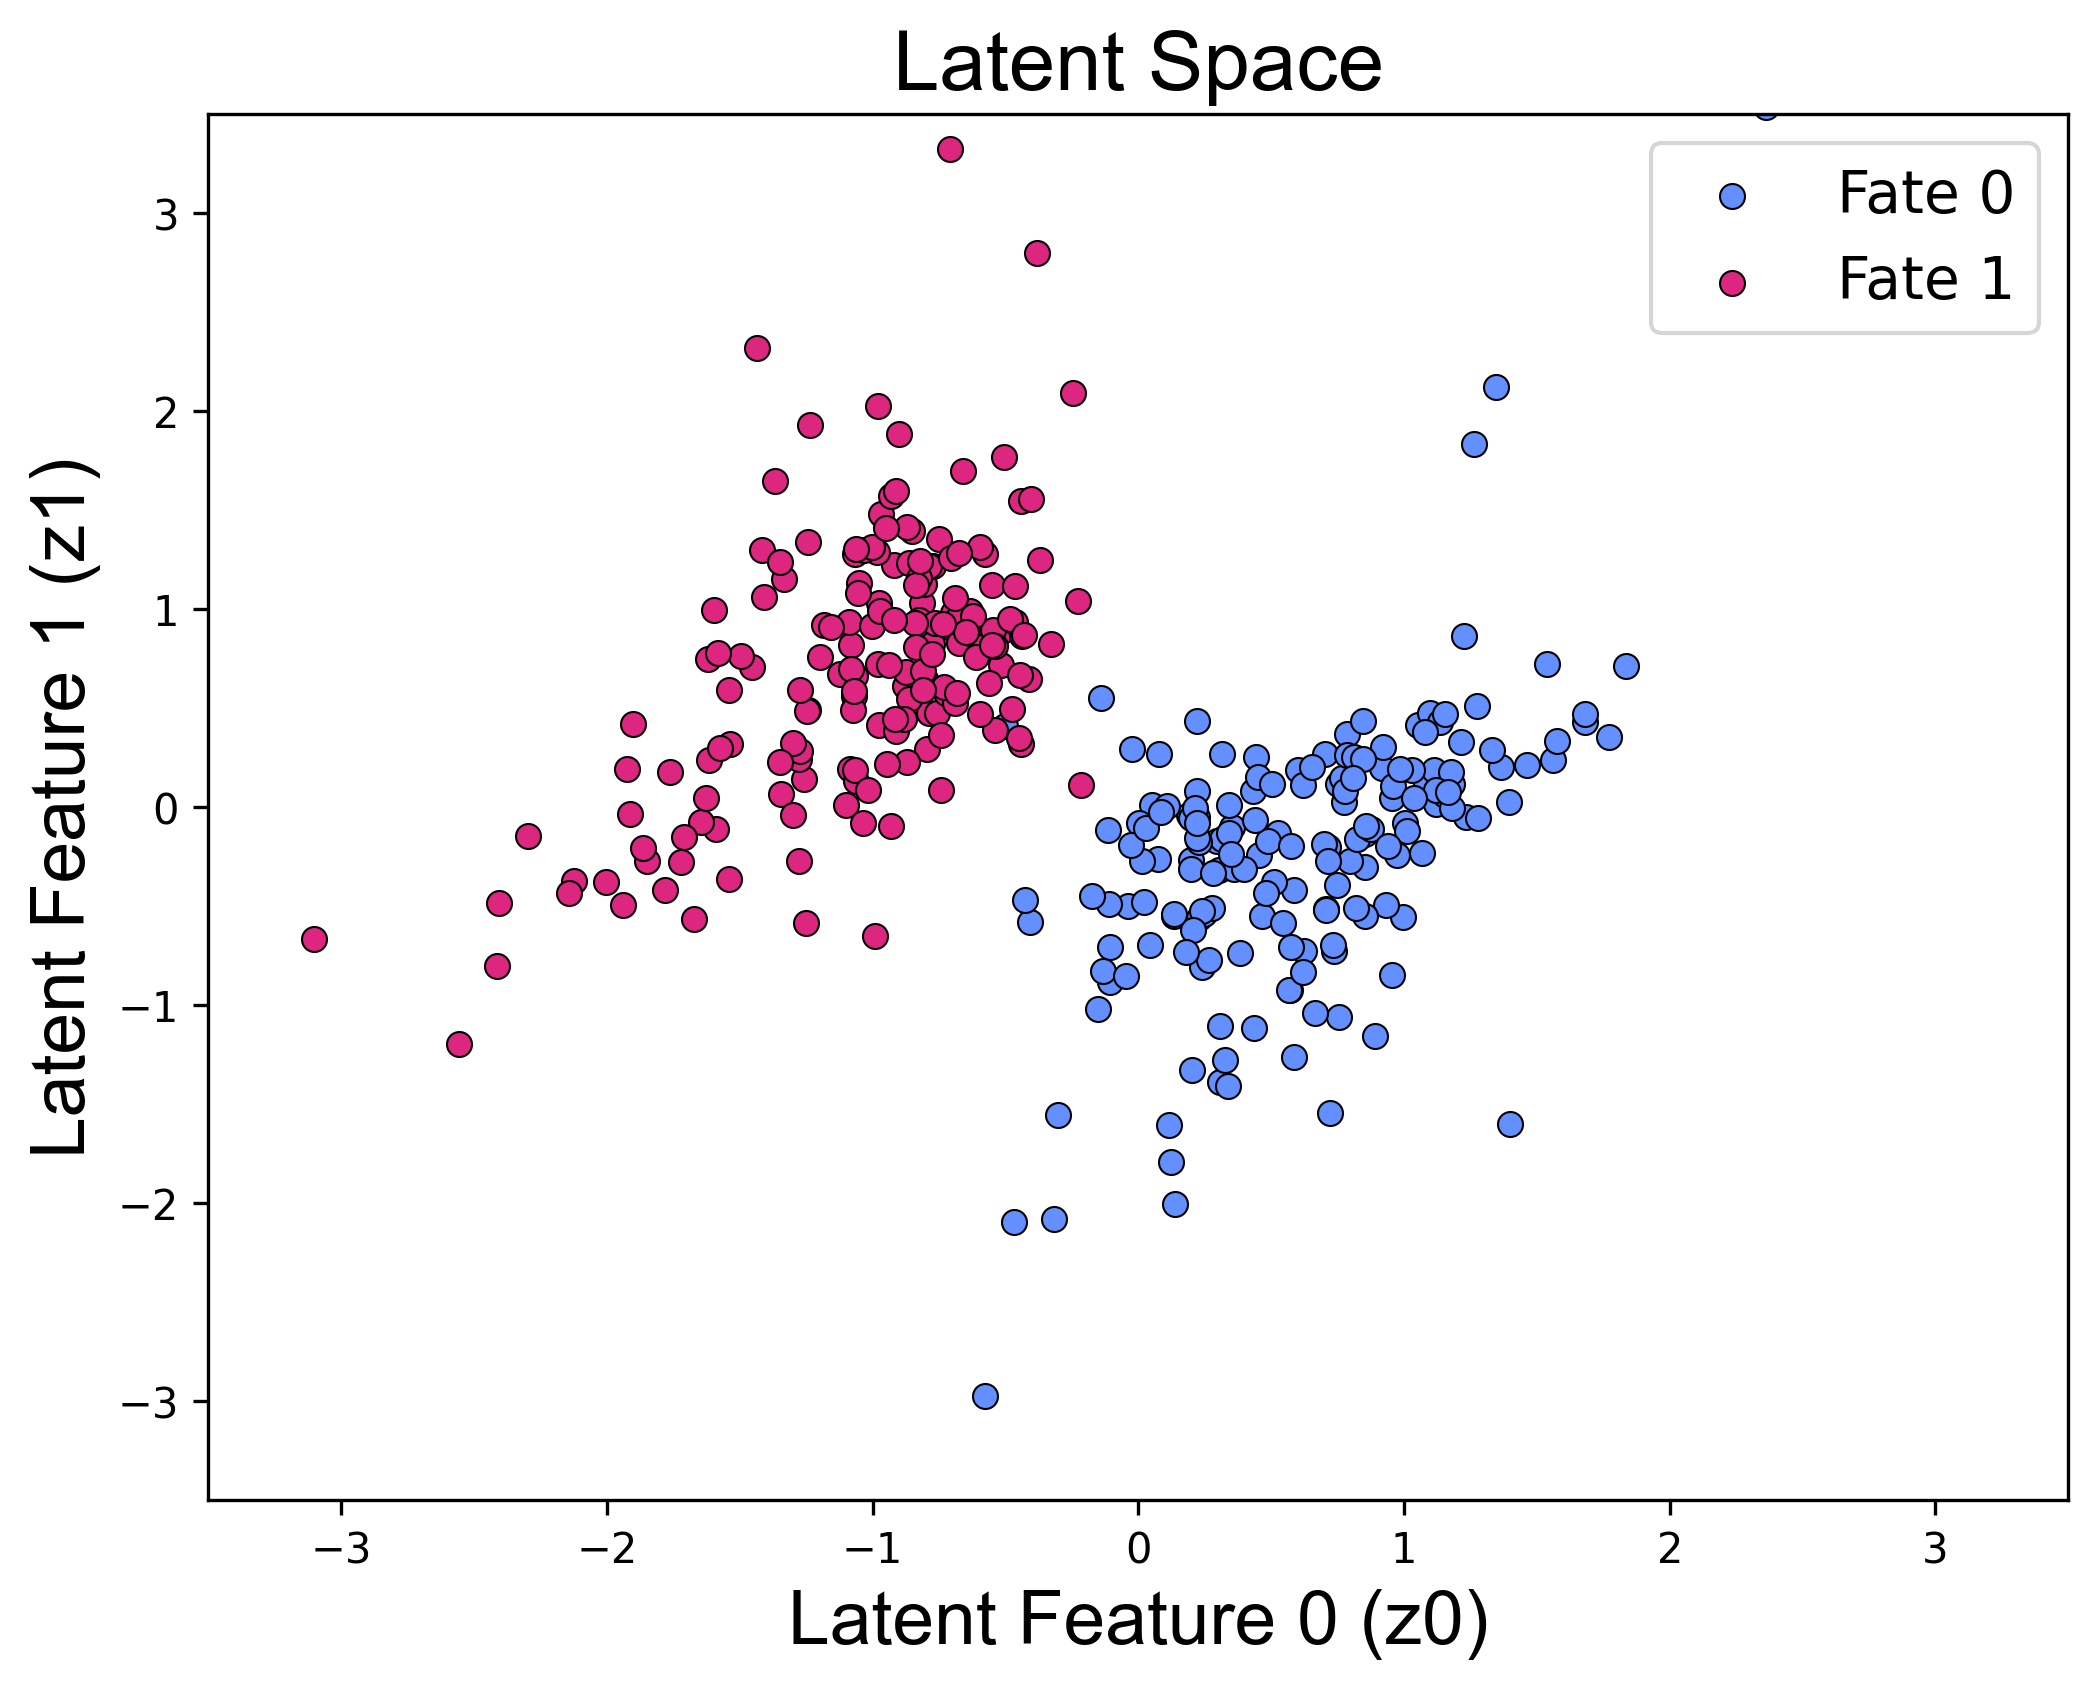

In [ ]:
# Predict the latent representations
latent_2d = encoder.predict(x_train)  # Shape (1380, 2)

# Find extreme points for axis limits
x_min, x_max = latent_2d[:, 0].min() - 0.5, latent_2d[:, 0].max() + 0.5
y_min, y_max = latent_2d[:, 1].min() - 0.5, latent_2d[:, 1].max() + 0.5

# Create the plot
plt.figure(figsize=(8, 6), dpi=300)

# Scatter plot for each class separately with thin gray edges
plt.scatter(latent_2d[y_train == 0][:, 0], latent_2d[y_train == 0][:, 1], 
            color='#648fff', label="Fate 0", alpha=1, edgecolors='k', linewidth=0.5, rasterized=True)  
plt.scatter(latent_2d[y_train == 1][:, 0], latent_2d[y_train == 1][:, 1], 
            color='#dc267f', label="Fate 1", alpha=1, edgecolors='k', linewidth=0.5, rasterized=True)  

# Set axis limits
plt.xlim(-3.5, 3.5)
plt.ylim(-3.5, 3.5)

# Increase font size and set Arial font
plt.xlabel("Latent Feature 0 (z0)", fontsize=18, fontname="Arial")
plt.ylabel("Latent Feature 1 (z1)", fontsize=18, fontname="Arial")
plt.title("Latent Space", fontsize=20, fontname="Arial")

# Legend and grid
plt.legend(fontsize=14)
#plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)

#plt.savefig("ls_split02_rasterised.eps", dpi=600, bbox_inches="tight")
plt.show()
